# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [29]:
# Try loading one file
df_jan = pd.read_parquet('DataFiles/2023-1.parquet')
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [30]:
df_jan.shape

(3041714, 19)

##### <span style="color: blue;">We have 3041714 rows and 19 columns in January 2023 data.</span>

In [31]:
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [32]:
df_jan.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.041714e+06                     3041714                     3041714   
mean   1.727994e+00  2023-01-17 00:25:41.237371  2023-01-17 00:41:23.730543   
min    1.000000e+00         2008-12-31 23:01:42         2009-01-01 14:29:11   
25%    1.000000e+00         2023-01-09 16:26:13  2023-01-09 16:41:19.250000   
50%    2.000000e+00         2023-01-17 08:45:54  2023-01-17 09:01:55.500000   
75%    2.000000e+00  2023-01-24 16:28:13.750000         2023-01-24 16:44:41   
max    2.000000e+00         2023-02-01 00:56:53         2023-02-02 09:28:47   
std    4.449931e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.970028e+06   3.041714e+06  2.970028e+06  3.041714e+06   
mean      1.362847e+00   3.855076e+00  1.500250e+00  1.664277e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.070000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.340000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   2.589281e+05  9.900000e+01  2.650000e+02   
std       8.974244e-01   2.506002e+02  6.501645e+00  6.424514e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  3.041714e+06  3.041714e+06  3.041714e+06  3.041714e+06  3.041714e+06   
mean   1.644445e+02  1.176704e+00  1.867674e+01  1.558292e+00  4.963051e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  8.600000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.280000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.050000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.160100e+03  1.250000e+01  5.316000e+01   
std    6.993147e+01  4.879234e-01  1.740004e+01  1.778291e+00  5.347396e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  3.041714e+06  3.041714e+06           3.041714e+06  3.041714e+06   
mean   3.394887e+00  5.263212e-01           9.983624e-01  2.744160e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.250000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.548000e+01   
50%    2.750000e+00  0.000000e+00           1.000000e+00  2.016000e+01   
75%    4.200000e+00  0.000000e+00           1.000000e+00  2.890000e+01   
max    3.808000e+02  1.969900e+02           1.000000e+00  1.169400e+03   
std    3.824425e+00  2.015350e+00           3.712896e-02  2.163570e+01   

       congestion_surcharge   airport_fee  
count          2.970028e+06  2.970028e+06  
mean           2.309870e+00  1.098142e-01  
min           -2.500000e+00 -1.250000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.250000e+00  
std            6.630708e-01  3.539063e-01

In [33]:
df_jan.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71686
trip_distance                0
RatecodeID               71686
store_and_fwd_flag       71686
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71686
airport_fee              71686
dtype: int64

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [34]:
df_jan['pickup_date'] = df_jan['tpep_pickup_datetime'].dt.date
df_jan['pickup_hour'] = df_jan['tpep_pickup_datetime'].dt.hour

In [35]:
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

  pickup_date  pickup_hour  
0  2023-01-01            0  
1  2023-01-01            0  
2  2023-01-01            0  
3  2023-01-01            0  
4  2023-01-01            0

In [36]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [37]:
df_jan['pickup_date'] = pd.to_datetime(df_jan['pickup_date'])

In [38]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

<span style="color: blue;">Checking most busy hour and day in Jan data.</span>

In [39]:
df_jan.pickup_date.value_counts()

pickup_date
2023-01-26    114013
2023-01-19    113775
2023-01-14    111960
2023-01-21    111051
2023-01-27    110757
2023-01-28    110681
2023-01-12    110571
2023-01-13    109802
2023-01-20    108566
2023-01-25    108366
2023-01-18    105333
2023-01-11    105333
2023-01-07    104114
2023-01-24    103051
2023-01-06    101727
2023-01-05    100269
2023-01-17    100242
2023-01-31     99654
2023-01-10     99158
2023-01-15     96046
2023-01-04     94290
2023-01-23     89039
2023-01-22     88903
2023-01-29     87403
2023-01-03     85011
2023-01-09     84628
2023-01-08     84337
2023-01-30     83069
2023-01-16     79406
2023-01-01     76021
2023-01-02     65090
2022-12-31        25
2023-02-01        10
2022-10-25         7
2022-10-24         4
2008-12-31         2
Name: count, dtype: int64

In [40]:
df_jan.pickup_hour.value_counts()

pickup_hour
18    214294
17    207902
15    194886
16    194267
19    191289
14    190067
13    177379
12    168642
20    164436
21    160194
11    153084
22    146069
10    142658
9     130288
8     116209
23    113398
7      86313
0      84044
1      59165
6      43410
2      41508
3      27011
5      17724
4      17477
Name: count, dtype: int64

In [41]:
sample_jan=pd.DataFrame()

In [42]:
hour_data = df_jan[((df_jan['pickup_date'] == '2023-01-26') & (df_jan['pickup_hour']==18))]

In [43]:
hour_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2404180         2  2023-01-26 18:02:49   2023-01-26 18:56:08              1.0   
2404522         2  2023-01-26 18:10:26   2023-01-26 18:18:03              1.0   
2404523         2  2023-01-26 18:22:39   2023-01-26 19:00:38              1.0   
2461759         2  2023-01-26 18:00:06   2023-01-26 18:04:59              2.0   
2462372         2  2023-01-26 18:03:48   2023-01-26 18:31:16              6.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2404180          16.02         1.0                  N           132   
2404522           1.33         1.0                  N           234   
2404523           7.63         1.0                  N            68   
2461759           0.80         1.0                  N           238   
2462372          10.92         1.0                  N           138   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2404180           256             1         73.0    0.0      0.5       18.94   
2404522            68             1          8.6    0.0      0.5        2.52   
2404523           181             1         40.1    0.0      0.5       10.13   
2461759            43             1          7.2    2.5      0.5        3.42   
2462372           161             1         44.3    7.5      0.5       12.72   

         tolls_amount  improvement_surcharge  total_amount  \
2404180          0.00                    1.0         94.69   
2404522          0.00                    1.0         15.12   
2404523          6.55                    1.0         60.78   
2461759          0.00                    1.0         17.12   
2462372          6.55                    1.0         76.32   

         congestion_surcharge  airport_fee pickup_date  pickup_hour  
2404180                   0.0         1.25  2023-01-26           18  
2404522                   2.5         0.00  2023-01-26           18  
2404523                   2.5         0.00  2023-01-26           18  
2461759                   2.5         0.00  2023-01-26           18  
2462372                   2.5         1.25  2023-01-26           18

In [44]:
sample = hour_data.sample(frac = 0.05, random_state = 42)

In [45]:
sample_jan = pd.concat([sample_jan, sample])

In [46]:
sample_jan.shape

(429, 21)

In [47]:
sample_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2474229         2  2023-01-26 18:58:45   2023-01-26 19:16:04              1.0   
2474103         2  2023-01-26 18:08:21   2023-01-26 18:28:47              2.0   
2476040         2  2023-01-26 18:21:25   2023-01-26 18:34:40              1.0   
2469428         2  2023-01-26 18:21:23   2023-01-26 18:35:57              1.0   
2475034         2  2023-01-26 18:48:45   2023-01-26 19:07:41              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2474229           1.72         1.0                  N           186   
2474103           3.83         1.0                  N           107   
2476040           1.67         1.0                  N           237   
2469428           2.74         1.0                  N           230   
2475034           3.30         1.0                  N           237   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2474229            43             1         16.3    2.5      0.5        4.56   
2474103           142             1         21.2    2.5      0.5        5.54   
2476040           170             1         14.2    2.5      0.5        2.00   
2469428           263             1         16.3    2.5      0.5        4.56   
2475034           238             2         20.5    2.5      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
2474229           0.0                    1.0         27.36   
2474103           0.0                    1.0         33.24   
2476040           0.0                    1.0         22.70   
2469428           0.0                    1.0         27.36   
2475034           0.0                    1.0         27.00   

         congestion_surcharge  airport_fee pickup_date  pickup_hour  
2474229                   2.5          0.0  2023-01-26           18  
2474103                   2.5          0.0  2023-01-26           18  
2476040                   2.5          0.0  2023-01-26           18  
2469428                   2.5          0.0  2023-01-26           18  
2475034                   2.5          0.0  2023-01-26           18

<span style="color: blue;">Data sampling done based on date and hourly basis. So doing this procedure for 1 day's 24 hours and for all 31 days, is lot time cosuming. So we will proceed with using loops to iterate through: read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file.</span>

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [50]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/tejas/Documents/NYC_TAXI_EDA/DataFiles')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_curr = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Adding new columns to itererate through each day and each hour
        df_curr['pickup_date'] = df_curr['tpep_pickup_datetime'].dt.date
        df_curr['pickup_hour'] = df_curr['tpep_pickup_datetime'].dt.hour
        df_curr['pickup_date'] = pd.to_datetime(df_curr['pickup_date'])

        # Since we have other months data as well in every month data file, taking just exact month data
        month = df_curr['pickup_date'].dt.month.value_counts().idxmax()
        # Since we have data for some other years as well in data file, considering only 2023 year
        year = 2023
        # Get first day of the month to iterate through every month from first day to last day
        start_date = datetime.date(year, month, 1)
        # Get last day of the month to iterate through every month from first day to last day
        last_day = calendar.monthrange(year, month)[1]
        end_date = datetime.date(year, month, last_day)
        # Finding date range for that particular month
        date_range = pd.date_range(start=start_date, end=end_date, freq='D')

        # Loop through dates and then loop through every hour of each date
        for date in date_range:

            # Generate 24 hourly timestamps
            hourly_range = pd.date_range(start=date, periods=24, freq='H') 
            
            # Iterate through each hour of the selected date
            for hour in hourly_range:

                hourly_data = df_curr[((df_curr['pickup_date'].dt.date == (hour.date())) & (df_curr['pickup_hour'] == (hour.hour)))]
                # Sample 0.7% of the hourly data randomly
                sample1 = hourly_data.sample(frac = 0.007, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data,sample1])
                
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [51]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('sample_data.csv')
df.to_parquet('sample_data.parquet')

In [52]:
df.shape

(265487, 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [5]:
# Load the new data file
df_nyc_taxi = pd.read_parquet('DataFiles/sample_data.parquet')

In [6]:
# df.head()
df_nyc_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
428               256             2        32.40    6.0      0.5        0.00   
1113              237             1         7.90    1.0      0.5        2.58   
819               141             2        11.40    1.0      0.5        0.00   
3192              142             2         6.50    1.0      0.5        0.00   
2995263           107             0        25.64    0.0      0.5        5.93   

         tolls_amount  improvement_surcharge  total_amount  \
428               0.0                    1.0         41.15   
1113              0.0                    1.0         15.48   
819               0.0                    1.0         16.40   
3192              0.0                    1.0         11.50   
2995263           0.0                    1.0         35.57   

         congestion_surcharge  airport_fee pickup_date  pickup_hour  \
428                       0.0         1.25  2023-01-01            0   
1113                      2.5         0.00  2023-01-01            0   
819                       2.5         0.00  2023-01-01            0   
3192                      2.5         0.00  2023-01-01            0   
2995263                   NaN          NaN  2023-01-01            0   

         Airport_fee  
428              NaN  
1113             NaN  
819              NaN  
3192             NaN  
2995263          NaN

In [7]:
# df.info()
df_nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265487 entries, 428 to 2700137
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  float6

In [8]:
df_nyc_taxi.shape

(265487, 22)

<span style="color: blue;">We have 265487 rows and 22 columns in our sample data.</span>

<span style="color: blue;">Checking null values column wise.</span>

In [9]:
df_nyc_taxi.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            8831
trip_distance                 0
RatecodeID                 8831
store_and_fwd_flag         8831
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge       8831
airport_fee              244705
pickup_date                   0
pickup_hour                   0
Airport_fee               29613
dtype: int64

In [10]:
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  265487.000000                      265487                      265487   
mean        1.733475  2023-07-02 20:30:32.375570  2023-07-02 20:47:54.093198   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000         2023-04-02 16:33:43  2023-04-02 16:55:59.500000   
50%         2.000000         2023-06-27 16:01:27         2023-06-27 16:18:21   
75%         2.000000  2023-10-06 20:06:22.500000         2023-10-06 20:28:48   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447562                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count     256656.00000  265487.000000  256656.000000  265487.000000   
mean           1.36743       3.581805       1.658391     165.172668   
min            0.00000       0.000000       1.000000       1.000000   
25%            1.00000       1.050000       1.000000     132.000000   
50%            1.00000       1.800000       1.000000     162.000000   
75%            1.00000       3.400000       1.000000     234.000000   
max            9.00000   22528.820000      99.000000     265.000000   
std            0.89065      48.595892       7.548418      64.070411   

        DOLocationID   payment_type    fare_amount          extra  \
count  265487.000000  265487.000000  265487.000000  265487.000000   
mean      163.952988       1.164980      19.830154       1.587679   
min         1.000000       0.000000       0.000000      -2.500000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.779730       0.506647      18.204986       1.824932   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  265487.000000  265487.000000  265487.000000          265487.000000   
mean        0.495325       3.548453       0.593724               0.999003   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048416       4.046095       2.178536               0.030623   

        total_amount  congestion_surcharge   airport_fee  \
count  265487.000000         256656.000000  20782.000000   
mean       28.891858              2.307875      0.109349   
min        -4.000000             -2.500000      0.000000   
25%        15.960000              2.500000      0.000000   
50%        21.020000              2.500000      0.000000   
75%        30.800000              2.500000      0.000000   
max       911.000000              2.500000      1.250000   
std        22.769544              0.666104      0.353179   

                         pickup_date    pickup_hour    Airport_fee  
count                         265487  265487.000000  235874.000000  
mean   2023-07-02 05:44:30.625680384      14.265844       0.145987  
min              2023-01-01 00:00:00       0.000000      -1.750000  
25%              2023-04-02 00:00:00      11.000000       0.000000  
50%              2023-06-27 00:00:00      15.000000       0.000000  
75%              2023-10-06 00:00:00      19.000000       0.000000  
max              2023-12-31 00:00:00      23.000000       1.750000  
std                              NaN       5.806733       0.473234

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

##### <span style="color: blue;">Resetting the index.</span>

In [11]:
# Fix the index and drop any columns that are not needed
df_nyc_taxi.reset_index(drop=True, inplace=True)
df_nyc_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

  pickup_date  pickup_hour  Airport_fee  
0  2023-01-01            0          NaN  
1  2023-01-01            0          NaN  
2  2023-01-01            0          NaN  
3  2023-01-01            0          NaN  
4  2023-01-01            0          NaN

In [12]:
df_nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

<span style="color: blue;">At present there are no columns to drop. Later once we combine both Airport Fee columns we can drop one of them.</span>

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

##### <span style="color: blue;">Combine the two airport fee columns</span>

In [13]:
# Combine the two airport fee columns

<span style="color: blue;">Checking when 'airport_fee' is having null value, is there any associated value in 'Airport_fee' or are both columns are null.</span>

In [14]:
print("Total null values in airport_fee column - ", df_nyc_taxi[df_nyc_taxi['airport_fee'].isna()]['airport_fee'].isna().sum())
print("Total null values in Airport_fee column - ", df_nyc_taxi[df_nyc_taxi['airport_fee'].isna()]['Airport_fee'].isna().sum())
print("Airport_fee value counts when airport_fee column is null -", df_nyc_taxi[df_nyc_taxi['airport_fee'].isna()]['Airport_fee'].value_counts())

Total null values in airport_fee column -  244705
Total null values in Airport_fee column -  8831
Airport_fee value counts when airport_fee column is null - Airport_fee
 0.00    215086
 1.75     16911
 1.25      3875
-1.75         2
Name: count, dtype: int64


<span style="color: blue;">So column 'Airport_fee' is having null values.</span>

<span style="color: blue;">for which count of values in 'Airport_fee' 235874 (215086+16911+3875+2) + null value count in 'Airport_fee' column are 8831</span>

<span style="color: blue;">Which is equal to total null values in 'airport_fee' column i.e. 244705</span>

<span style="color: blue;">Which means for null values in 'airport_fee' column there is either value or null value in 'Airport_fee' column. Means both are same columns just there is capital and small letter difference in column name.</span>

<span style="color: blue;"> Combining both the columns to one. </span>

In [15]:
df_nyc_taxi['airport_fee'] = df_nyc_taxi['airport_fee'].fillna(df_nyc_taxi['Airport_fee'])

In [16]:
df_nyc_taxi['airport_fee'].isna().sum()

8831

<span style="color: blue;">Dropping the 'Airport_fee' column.</span>

In [17]:
df_nyc_taxi.drop(['Airport_fee'], axis=1, inplace=True)

In [18]:
df_nyc_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

  pickup_date  pickup_hour  
0  2023-01-01            0  
1  2023-01-01            0  
2  2023-01-01            0  
3  2023-01-01            0  
4  2023-01-01            0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

##### <span style="color: blue;">Fix columns with negative (monetary) values</span>

In [19]:
# check where values of fare amount are negative
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  265487.000000                      265487                      265487   
mean        1.733475  2023-07-02 20:30:32.375570  2023-07-02 20:47:54.093198   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000         2023-04-02 16:33:43  2023-04-02 16:55:59.500000   
50%         2.000000         2023-06-27 16:01:27         2023-06-27 16:18:21   
75%         2.000000  2023-10-06 20:06:22.500000         2023-10-06 20:28:48   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447562                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count     256656.00000  265487.000000  256656.000000  265487.000000   
mean           1.36743       3.581805       1.658391     165.172668   
min            0.00000       0.000000       1.000000       1.000000   
25%            1.00000       1.050000       1.000000     132.000000   
50%            1.00000       1.800000       1.000000     162.000000   
75%            1.00000       3.400000       1.000000     234.000000   
max            9.00000   22528.820000      99.000000     265.000000   
std            0.89065      48.595892       7.548418      64.070411   

        DOLocationID   payment_type    fare_amount          extra  \
count  265487.000000  265487.000000  265487.000000  265487.000000   
mean      163.952988       1.164980      19.830154       1.587679   
min         1.000000       0.000000       0.000000      -2.500000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.779730       0.506647      18.204986       1.824932   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  265487.000000  265487.000000  265487.000000          265487.000000   
mean        0.495325       3.548453       0.593724               0.999003   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048416       4.046095       2.178536               0.030623   

        total_amount  congestion_surcharge    airport_fee  \
count  265487.000000         256656.000000  256656.000000   
mean       28.891858              2.307875       0.143020   
min        -4.000000             -2.500000      -1.750000   
25%        15.960000              2.500000       0.000000   
50%        21.020000              2.500000       0.000000   
75%        30.800000              2.500000       0.000000   
max       911.000000              2.500000       1.750000   
std        22.769544              0.666104       0.464775   

                         pickup_date    pickup_hour  
count                         265487  265487.000000  
mean   2023-07-02 05:44:30.625680384      14.265844  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-27 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.806733

In [20]:
# Find which columns have negative values

<span style="color: blue;">From the stats it is found that some fare data have abnormal values:</span>
* <span style="color: blue;">Fare datas like (extra,mta_tax,improvement_surcharge,total_amount,congestion_surcharge,airport_fee) have negative values where it's supposed to be positive only values.</span>

In [21]:
#Check where fare contains negative values, store to a variable
negativeVal = df_nyc_taxi[df_nyc_taxi['total_amount'] < 0 ]
negativeVal

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47880          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
50486          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
63180          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
90839          2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
118075         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
144439         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
165580         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
173959         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
202000         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
206019         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
227274         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
47880            0.21         2.0                  N           246   
50486            0.48         1.0                  N            75   
63180            0.05         2.0                  N           132   
90839            0.02         1.0                  N           161   
118075           0.00         1.0                  N           231   
144439           3.61         1.0                  N            68   
165580           8.35         1.0                  N           132   
173959           0.00         1.0                  N           193   
202000           1.09         2.0                  N            90   
206019           1.38         2.0                  N           249   
227274           0.01         2.0                  N           237   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
47880            246             2          0.0    0.0     -0.5         0.0   
50486             75             2          0.0    0.0     -0.5         0.0   
63180            132             4          0.0    0.0     -0.5         0.0   
90839            161             2          0.0    0.0     -0.5         0.0   
118075           231             2          0.0    0.0     -0.5         0.0   
144439           232             2          0.0    0.0     -0.5         0.0   
165580           222             2          0.0    0.0     -0.5         0.0   
173959           193             2          0.0    0.0     -0.5         0.0   
202000           170             2          0.0    0.0     -0.5         0.0   
206019           186             2          0.0    0.0     -0.5         0.0   
227274           237             2          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
47880            0.0                   -1.0         -4.00   
50486            0.0                   -1.0         -1.50   
63180            0.0                   -1.0         -3.25   
90839            0.0                   -1.0         -4.00   
118075           0.0                   -1.0         -1.50   
144439           0.0                   -1.0         -4.00   
165580           0.0                   -1.0         -3.25   
173959           0.0                   -1.0         -1.50   
202000           0.0                   -1.0         -4.00   
206019           0.0                   -1.0         -4.00   
227274           0.0                   -1.0         -4.00   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
47880                   -2.5         0.00  2023-11-03           15  
50486                    0.0         0.00  2023-11-06           19  
63180                    0.0        -1.75  2023-11-22           15  
90839                   -2.5         0.00  2023-12-29           17  
118075                   0.0         0.00  2023-03-08           15  
144439                  -2.5         0.00  2023-04-12           19  
165580                   0.0        -1.75

In [22]:
negativeVal.shape

(11, 21)

In [23]:
# Dropping the rows based on index containing negative fare values as it does not make sense fare having negative values
df_nyc_taxi.drop(negativeVal.index, inplace=True)

In [24]:
#Checking negative values in totol amount after dropping negative values
df_nyc_taxi[df_nyc_taxi['total_amount'] < 0 ]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

In [25]:
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  265476.000000                      265476                      265476   
mean        1.733464  2023-07-02 20:28:55.040477  2023-07-02 20:46:16.784587   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000         2023-04-02 16:31:16  2023-04-02 16:54:38.500000   
50%         2.000000         2023-06-27 16:01:24         2023-06-27 16:18:11   
75%         2.000000  2023-10-06 20:03:42.750000  2023-10-06 20:26:57.750000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447568                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    256645.000000  265476.000000  256645.000000  265476.000000   
mean          1.367434       3.581896       1.658400     165.172679   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.890664      48.596894       7.548579      64.070290   

        DOLocationID   payment_type    fare_amount          extra  \
count  265476.000000  265476.000000  265476.000000  265476.000000   
mean      163.951928       1.164938      19.830976       1.587745   
min         1.000000       0.000000       0.000000      -2.500000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.780234       0.506602      18.204915       1.824941   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  265476.000000  265476.000000  265476.000000          265476.000000   
mean        0.495366       3.548600       0.593749               0.999086   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.047991       4.046115       2.178578               0.027788   

        total_amount  congestion_surcharge    airport_fee  \
count  265476.000000         256645.000000  256645.000000   
mean       28.893187              2.308032       0.143040   
min         0.000000              0.000000       0.000000   
25%        15.960000              2.500000       0.000000   
50%        21.045000              2.500000       0.000000   
75%        30.800000              2.500000       0.000000   
max       911.000000              2.500000       1.750000   
std        22.769079              0.665634       0.464754   

                         pickup_date    pickup_hour  
count                         265476  265476.000000  
mean   2023-07-02 05:42:53.520770560      14.265783  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-27 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.806790

##### <span style="color: blue;">Cleared 11 rows containing negative value of total_amount. With this most of negative values in monetary data got fixed, but still we are able to see negative value in extra column.</span>

In [26]:
# fix the negative values for other columns

In [27]:
df_nyc_taxi[df_nyc_taxi['extra'] < 0 ]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
42134         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
42134            0.0         1.0                  N           265   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
42134           265             2          3.0   -2.5      0.0         0.0   

       tolls_amount  improvement_surcharge  total_amount  \
42134           0.0                    1.0           4.0   

       congestion_surcharge  airport_fee pickup_date  pickup_hour  
42134                   0.0          0.0  2023-10-27           14

<span style="color: blue;">There is just one line with negative values in extra column, which is also Anomalies. </span>

<span style="color: blue;">If we can see in this line, pickup and drop time is same. trip distance is 0 and pickup location ID and drop location ID is same. </span>

<span style="color: blue;">So this might be some trip which got cancelled.</span>

<span style="color: blue;">Hence we will delete this row. </span>

In [28]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi['extra'] < 0 ]).index, inplace=True)

In [29]:
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  265475.000000                      265475                      265475   
mean        1.733463  2023-07-02 20:28:17.038678  2023-07-02 20:45:38.786680   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000         2023-04-02 16:30:05         2023-04-02 16:53:35   
50%         2.000000         2023-06-27 16:01:21         2023-06-27 16:18:01   
75%         2.000000  2023-10-06 20:02:45.500000  2023-10-06 20:26:14.500000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447568                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    256644.000000  265475.000000  256644.000000  265475.000000   
mean          1.367435       3.581910       1.658402     165.172302   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.890665      48.596985       7.548593      64.070117   

        DOLocationID   payment_type    fare_amount          extra  \
count  265475.000000  265475.000000  265475.000000  265475.000000   
mean      163.951547       1.164935      19.831039       1.587760   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.780090       0.506600      18.204920       1.824927   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  265475.000000  265475.000000  265475.000000          265475.000000   
mean        0.495368       3.548613       0.593751               0.999086   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.047981       4.046117       2.178581               0.027788   

        total_amount  congestion_surcharge    airport_fee  \
count  265475.000000         256644.000000  256644.000000   
mean       28.893280              2.308041       0.143041   
min         0.000000              0.000000       0.000000   
25%        15.960000              2.500000       0.000000   
50%        21.050000              2.500000       0.000000   
75%        30.800000              2.500000       0.000000   
max       911.000000              2.500000       1.750000   
std        22.769071              0.665620       0.464755   

                         pickup_date    pickup_hour  
count                         265475  265475.000000  
mean   2023-07-02 05:42:15.520105728      14.265784  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-27 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.806800

Did you notice something different in the `RatecodeID` column for above records?

##### <span style="color: blue;">Analyse RatecodeID column</span>

In [30]:
# Analyse RatecodeID column

<span style="color: blue;">RatecodeID should be one of the following value, but in above table it is showing as 99 as maximum.</span>
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride
   
<span style="color: blue;">So lets check the value out of this range.</span>

In [31]:
df_nyc_taxi[((df_nyc_taxi['RatecodeID']<1) | (df_nyc_taxi['RatecodeID']>6))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
231            1  2023-01-01 11:39:40   2023-01-01 11:55:59              1.0   
698            1  2023-01-02 13:09:05   2023-01-02 13:25:32              1.0   
1238           1  2023-01-03 13:07:10   2023-01-03 13:42:25              1.0   
1305           1  2023-01-03 15:30:26   2023-01-03 16:39:39              1.0   
1646           1  2023-01-04 07:35:07   2023-01-04 07:56:45              1.0   
...          ...                  ...                   ...              ...   
263429         1  2023-09-28 14:38:27   2023-09-28 15:40:01              1.0   
264136         1  2023-09-29 09:12:09   2023-09-29 10:23:24              1.0   
264853         1  2023-09-30 09:26:28   2023-09-30 09:37:34              1.0   
264947         1  2023-09-30 12:58:43   2023-09-30 13:17:16              1.0   
265143         1  2023-09-30 16:27:07   2023-09-30 17:09:46              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
231               2.9        99.0                  N            42   
698               6.9        99.0                  N           137   
1238              0.0        99.0                  N            14   
1305             13.0        99.0                  N           141   
1646              3.3        99.0                  N           218   
...               ...         ...                ...           ...   
263429            4.1        99.0                  N            89   
264136            7.1        99.0                  N           113   
264853            1.8        99.0                  N           102   
264947            1.8        99.0                  N             4   
265143            8.5        99.0                  N            62   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
231               47             1         22.5    0.0      0.5         0.0   
698               42             1         31.5    0.0      0.5         0.0   
1238             216             1         46.5    0.0      0.5         0.0   
1305              35             1         55.5    0.0      0.5         0.0   
1646             130             1         20.5    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
263429            39             1         24.5    0.0      0.5         0.0   
264136            74             1         30.5    0.0      0.5         0.0   
264853           160             1         17.5    0.0      0.5         0.0   
264947           158             1         18.5    0.0      0.5         0.0   
265143           216             1         30.5    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
231             0.00                    1.0         24.00   
698             0.00                    1.0         33.00   
1238            0.00                    1.0         48.00   
1305            6.55                    1.0         63.55   
1646            0.00                    1.0         22.00   
...              ...                    ...           ...   
263429          0.00                    1.0         26.00   
264136          0.00                    1.0         32.00   
264853          0.00                    1.0         19.00   
264947          0.00                    1.0         20.00   
265143          0.00                    1.0         32.00   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
231                      0.0          0.0  2023-01-01           11  
698                      0.0          0.0  2023-01-02           13  
1238                     0.0          0.0  2023-01-03           13  
1305                     0.0          0.0  2023-01-03           15  
1646                     0.0          0.0  2023-01-04            7  
...                      ...          ...         ...          ...  
263429                   0.0          0.0

In [32]:
df_nyc_taxi['RatecodeID'].value_counts()

RatecodeID
1.0     242246
2.0      10076
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

In [33]:
df_nyc_taxi['RatecodeID'].isnull().sum()

8831

<span style="color: blue;">Missing or Unknown Data? → Since there are 8831 misssing values, was 99 used as a placeholder?</span>

<span style="color: blue;">If we delete the rows with 99 values in RatecodeID then we may loose more sample data.</span>

<span style="color: blue;">Hence we will consider this RatecodeID=99 as RatecodeID is unknown and change it to standard rate as nothing mentioned specifically.</span>

In [34]:
df_nyc_taxi.RatecodeID = df_nyc_taxi.RatecodeID.replace(99,1)

In [35]:
df_nyc_taxi['RatecodeID'].value_counts()

RatecodeID
1.0    243776
2.0     10076
5.0      1428
3.0       845
4.0       519
Name: count, dtype: int64

In [36]:
# Checking VendorID column

In [37]:
df_nyc_taxi.VendorID.value_counts()

VendorID
2    194396
1     71015
6        64
Name: count, dtype: int64

##### <span style="color: blue;">Analysing VendorID column</span>

<span style="color: blue;">As per Data Dictionary VendorID should be anything from below value but here there is some unknown VendorID = 6.</span>

1. Creative Mobile Technologies, LLC;
2. VeriFone Inc.

<span style="color: blue;">Let's understand these records.</span>

In [38]:
df_nyc_taxi[df_nyc_taxi.VendorID == 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23960          6  2023-10-04 17:10:01   2023-10-04 18:10:31              NaN   
25747          6  2023-10-06 19:10:49   2023-10-06 19:10:33              NaN   
27090          6  2023-10-08 14:10:24   2023-10-08 14:10:34              NaN   
28582          6  2023-10-10 19:10:57   2023-10-10 19:10:36              NaN   
37399          6  2023-10-21 15:10:39   2023-10-21 16:10:25              NaN   
...          ...                  ...                   ...              ...   
248502         6  2023-09-05 18:09:44   2023-09-05 19:09:33              NaN   
249718         6  2023-09-07 10:09:14   2023-09-07 11:09:34              NaN   
253782         6  2023-09-12 11:09:28   2023-09-12 12:09:15              NaN   
258191         6  2023-09-17 20:09:14   2023-09-17 21:09:11              NaN   
261814         6  2023-09-26 14:09:34   2023-09-26 15:09:55              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
23960            7.36         NaN               None           265   
25747           14.26         NaN               None           265   
27090            5.19         NaN               None           265   
28582            3.88         NaN               None           265   
37399           15.37         NaN               None           265   
...               ...         ...                ...           ...   
248502           8.48         NaN               None           265   
249718           8.56         NaN               None           265   
253782          10.49         NaN               None           265   
258191          13.72         NaN               None           265   
261814           2.83         NaN               None           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
23960             95             0        25.85    0.0      0.5         0.0   
25747            220             0        66.89    0.0      0.5         0.0   
27090             10             0        11.44    0.0      0.5         0.0   
28582            261             0        27.20    0.0      0.5         0.0   
37399            244             0        56.37    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
248502            69             0        59.20    0.0      0.5         0.0   
249718            86             0        40.20    0.0      0.5         0.0   
253782           148             0        51.30    0.0      0.5         0.0   
258191           241             0        56.45    0.0      0.5         0.0   
261814           143             0        38.20    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
23960            0.0                    0.3         26.65   
25747            0.0                    0.3         67.69   
27090            0.0                    0.3         12.24   
28582            0.0                    0.3         28.00   
37399            0.0                    0.3         57.17   
...              ...                    ...           ...   
248502           0.0                    0.3         60.00   
249718           0.0                    0.3         41.00   
253782           0.0                    0.3         52.10   
258191           0.0                    0.3         57.25   
261814           0.0                    0.3         39.00   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
23960                    NaN          NaN  2023-10-04           17  
25747                    NaN          NaN  2023-10-06           19  
27090                    NaN          NaN  2023-10-08           14  
28582                    NaN          NaN  2023-10-10           19  
37399                    NaN          NaN  2023-10-21           15  
...                      ...          ...         ...          ...  
248502                   NaN          NaN

<span style="color: blue;">In above records if we check PULocationID is 265. Let's check whether all rows are having PULocationID as 265?</span>

In [39]:
df_nyc_taxi[((df_nyc_taxi.VendorID == 6) & (df_nyc_taxi.PULocationID == 265))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23960          6  2023-10-04 17:10:01   2023-10-04 18:10:31              NaN   
25747          6  2023-10-06 19:10:49   2023-10-06 19:10:33              NaN   
27090          6  2023-10-08 14:10:24   2023-10-08 14:10:34              NaN   
28582          6  2023-10-10 19:10:57   2023-10-10 19:10:36              NaN   
37399          6  2023-10-21 15:10:39   2023-10-21 16:10:25              NaN   
...          ...                  ...                   ...              ...   
248502         6  2023-09-05 18:09:44   2023-09-05 19:09:33              NaN   
249718         6  2023-09-07 10:09:14   2023-09-07 11:09:34              NaN   
253782         6  2023-09-12 11:09:28   2023-09-12 12:09:15              NaN   
258191         6  2023-09-17 20:09:14   2023-09-17 21:09:11              NaN   
261814         6  2023-09-26 14:09:34   2023-09-26 15:09:55              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
23960            7.36         NaN               None           265   
25747           14.26         NaN               None           265   
27090            5.19         NaN               None           265   
28582            3.88         NaN               None           265   
37399           15.37         NaN               None           265   
...               ...         ...                ...           ...   
248502           8.48         NaN               None           265   
249718           8.56         NaN               None           265   
253782          10.49         NaN               None           265   
258191          13.72         NaN               None           265   
261814           2.83         NaN               None           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
23960             95             0        25.85    0.0      0.5         0.0   
25747            220             0        66.89    0.0      0.5         0.0   
27090             10             0        11.44    0.0      0.5         0.0   
28582            261             0        27.20    0.0      0.5         0.0   
37399            244             0        56.37    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
248502            69             0        59.20    0.0      0.5         0.0   
249718            86             0        40.20    0.0      0.5         0.0   
253782           148             0        51.30    0.0      0.5         0.0   
258191           241             0        56.45    0.0      0.5         0.0   
261814           143             0        38.20    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
23960            0.0                    0.3         26.65   
25747            0.0                    0.3         67.69   
27090            0.0                    0.3         12.24   
28582            0.0                    0.3         28.00   
37399            0.0                    0.3         57.17   
...              ...                    ...           ...   
248502           0.0                    0.3         60.00   
249718           0.0                    0.3         41.00   
253782           0.0                    0.3         52.10   
258191           0.0                    0.3         57.25   
261814           0.0                    0.3         39.00   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
23960                    NaN          NaN  2023-10-04           17  
25747                    NaN          NaN  2023-10-06           19  
27090                    NaN          NaN  2023-10-08           14  
28582                    NaN          NaN  2023-10-10           19  
37399                    NaN          NaN  2023-10-21           15  
...                      ...          ...         ...          ...  
248502                   NaN          NaN

<span style="color: blue;">Hence we observed that for this VendorID = 6 all the Pickup locations ID are 265.</span>

<span style="color: blue;">This looks like some other Vendor's data got added in our data for pickup location 265.</span>

<span style="color: blue;">Which is irrelevant  for our analysis, hence we will drop these rows.</span>

In [40]:
df_nyc_taxi.drop((df_nyc_taxi[((df_nyc_taxi.VendorID == 6) & (df_nyc_taxi.PULocationID == 265))]).index, inplace=True)

In [41]:
df_nyc_taxi[df_nyc_taxi.VendorID == 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

<span style="color: blue;">Now there are no rows with VendorID = 6.</span>

##### <span style="color: blue;">Analysing Invalid or cancelled trips</span>

In [42]:
# Checking Invalid or cancelled trips

In [43]:
# Checking null values for pick up time and drop time to decide any invalid trips
df_nyc_taxi[df_nyc_taxi['tpep_pickup_datetime'].isna() | df_nyc_taxi['tpep_dropoff_datetime'].isna()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

<span style="color: blue;">Since there are no null values for pickup time or drop time there are no invalid trip.</span>

<span style="color: blue;">Now we will check another parameter i.e. pickup time >= drop time to check invalid trips.</span>

In [44]:
df_nyc_taxi[df_nyc_taxi['tpep_pickup_datetime'] >= df_nyc_taxi['tpep_dropoff_datetime']]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1526           1  2023-01-03 21:58:32   2023-01-03 21:58:32              2.0   
7984           1  2023-01-13 11:31:22   2023-01-13 11:31:22              1.0   
8987           2  2023-01-14 16:38:56   2023-01-14 16:38:56              6.0   
12057          1  2023-01-19 07:40:51   2023-01-19 07:40:51              1.0   
17141          1  2023-01-26 08:54:55   2023-01-26 08:54:55              1.0   
...          ...                  ...                   ...              ...   
254952         1  2023-09-13 18:29:47   2023-09-13 18:29:47              1.0   
255383         1  2023-09-14 10:08:44   2023-09-14 10:08:44              0.0   
255920         1  2023-09-14 20:40:12   2023-09-14 20:40:12              1.0   
262291         1  2023-09-27 06:51:16   2023-09-27 06:51:16              1.0   
264772         1  2023-09-30 02:15:14   2023-09-30 02:15:14              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1526              0.0         1.0                  Y           230   
7984              0.0         1.0                  N           236   
8987              0.0         5.0                  N           264   
12057             0.0         1.0                  N           132   
17141             7.8         1.0                  N           244   
...               ...         ...                ...           ...   
254952            0.0         1.0                  Y           142   
255383            0.0         1.0                  N           264   
255920            0.0         1.0                  N           234   
262291            0.0         1.0                  Y            90   
264772            0.0         1.0                  N           148   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1526             264             2         10.0   3.00      0.5        0.00   
7984             264             2          3.0   2.50      0.5        0.00   
8987             264             1         86.0   0.00      0.0        9.00   
12057            264             2         66.0   1.25      0.5        0.00   
17141            244             1         37.3   2.50      0.5        8.25   
...              ...           ...          ...    ...      ...         ...   
254952           264             2          3.0   5.00      0.5        0.00   
255383           264             1        200.0   0.00      0.0        0.00   
255920           264             2          3.0   3.50      0.5        0.00   
262291           264             2          5.1   2.50      0.5        0.00   
264772           264             2          3.0   3.50      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
1526             0.0                    1.0         14.50   
7984             0.0                    1.0          7.00   
8987             0.0                    0.0         95.00   
12057            0.0                    1.0         68.75   
17141            0.0                    1.0         49.55   
...              ...                    ...           ...   
254952           0.0                    1.0          9.50   
255383           0.0                    0.0        200.00   
255920           0.0                    1.0          8.00   
262291           0.0                    1.0          9.10   
264772           0.0                    1.0          8.00   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
1526                     2.5         0.00  2023-01-03           21  
7984                     2.5         0.00  2023-01-13           11  
8987                     0.0         0.00  2023-01-14           16  
12057                    0.0         1.25  2023-01-19            7  
17141                    2.5         0.00  2023-01-26            8  
...                      ...          ...         ...          ...  
254952                   2.5         0.00

<span style="color: blue;">Since Pickup time is greater than or equal to Drop time, it does not make any sense for the trip or there might be some error when logging in the pickup and drop time. Else it might be the chance that the taxi was booked and then later cancelled.</span>

<span style="color: blue;">Hence we will drop these rows.</span>

In [45]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi['tpep_pickup_datetime'] >= df_nyc_taxi['tpep_dropoff_datetime']]).index, inplace=True)

In [46]:
df_nyc_taxi[df_nyc_taxi['tpep_pickup_datetime'] >= df_nyc_taxi['tpep_dropoff_datetime']]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

<span style="color: blue;">Now there are no invalid or cancelled trips.</span>

In [47]:
df_nyc_taxi.shape

(265294, 21)

<span style="color: blue;">Now lets check the trips where trip_distance <= 0</span>

In [48]:
df_nyc_taxi[df_nyc_taxi.trip_distance <= 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
52             2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   
71             1  2023-01-01 01:25:41   2023-01-01 01:25:45              0.0   
116            2  2023-01-01 03:18:36   2023-01-01 03:18:42              1.0   
138            2  2023-01-01 03:48:51   2023-01-01 03:48:56              2.0   
146            1  2023-01-01 04:31:48   2023-01-01 04:32:10              2.0   
...          ...                  ...                   ...              ...   
265406         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
265425         1  2023-09-30 22:25:15   2023-09-30 22:25:19              1.0   
265449         2  2023-09-30 23:34:29   2023-09-30 23:49:06              1.0   
265464         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
265481         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
52                0.0         5.0                  N           265   
71                0.0         1.0                  N           148   
116               0.0         1.0                  N           113   
138               0.0         5.0                  N           265   
146               0.0         5.0                  N            14   
...               ...         ...                ...           ...   
265406            0.0         NaN               None            48   
265425            0.0         1.0                  N           152   
265449            0.0         1.0                  N           264   
265464            0.0         NaN               None           161   
265481            0.0         NaN               None           249   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
52               265             1        50.00    0.0      0.0       10.20   
71               148             1         3.00    3.5      0.5       52.00   
116              113             2         3.00    1.0      0.5        0.00   
138              265             1        55.00    0.0      0.0        0.09   
146               14             1        50.00    0.0      0.0        0.00   
...              ...           ...          ...    ...      ...         ...   
265406           249             0        21.88    0.0      0.5        0.00   
265425           152             1        34.50    0.0      0.5        0.00   
265449           264             1        12.80    1.0      0.5        4.59   
265464            87             0        31.01    0.0      0.5        0.00   
265481           231             0        20.65    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
52               0.0                    1.0         61.20   
71               0.0                    1.0         60.00   
116              0.0                    1.0          8.00   
138              0.0                    1.0         56.09   
146              0.0                    1.0         51.00   
...              ...                    ...           ...   
265406           0.0                    1.0         25.88   
265425           0.0                    1.0         36.00   
265449           0.0                    1.0         19.89   
265464           0.0                    1.0         35.01   
265481           0.0                    1.0         24.65   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
52                       0.0          0.0  2023-01-01            1  
71                       2.5          0.0  2023-01-01            1  
116                      2.5          0.0  2023-01-01            3  
138                      0.0          0.0  2023-01-01            3  
146                      0.0          0.0  2023-01-01            4  
...                      ...          ...         ...          ...  
265406                   NaN          NaN

<span style="color: blue;">There are 5167 rows with trip distance as 0 or less.</span>

<span style="color: blue;">It does not make any sense with that trip where trip distance is 0 or less. Also if we observe pickup and drop time for these trips then we can see that there is difference of just some seconds. </span>

<span style="color: blue;">There is no sense in keeping data with trip distance <= 0.</span>

In [49]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi.trip_distance <= 0]).index, inplace=True)

In [50]:
df_nyc_taxi[df_nyc_taxi.trip_distance <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

<span style="color: blue;">Now there are no records with trip_distance <= 0.</span>

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




##### <span style="color: blue;">Proportion of missing values in each column</span>

In [51]:
# Find the proportion of missing values in each column
NYCtaxi = []
for i in df_nyc_taxi.columns:
    NYCtaxi.append([i, df_nyc_taxi[i].dtypes,
                      df_nyc_taxi[i].isna().sum(),
                      round((((df_nyc_taxi[i].isna().sum())/(len(df_nyc_taxi)))*100),2), 
                    ])
pd.DataFrame(NYCtaxi, columns = ['Column', 'dataType', 'null', 'nullPercentage'])

Column        dataType  null  nullPercentage
0                VendorID           int64     0            0.00
1    tpep_pickup_datetime  datetime64[us]     0            0.00
2   tpep_dropoff_datetime  datetime64[us]     0            0.00
3         passenger_count         float64  6681            2.57
4           trip_distance         float64     0            0.00
5              RatecodeID         float64  6681            2.57
6      store_and_fwd_flag          object  6681            2.57
7            PULocationID           int64     0            0.00
8            DOLocationID           int64     0            0.00
9            payment_type           int64     0            0.00
10            fare_amount         float64     0            0.00
11                  extra         float64     0            0.00
12                mta_tax         float64     0            0.00
13             tip_amount         float64     0            0.00
14           tolls_amount         float64     0            0.00
15  improvement_surcharge         float64     0            0.00
16           total_amount         float64     0            0.00
17   congestion_surcharge         float64  6681            2.57
18            airport_fee         float64  6681            2.57
19            pickup_date  datetime64[ns]     0            0.00
20            pickup_hour           int32     0            0.00

<span style="color: blue;">So below columns has null values.</span>
* passenger_count
* RatecodeID
* store_and_fwd_flag
* congestion_surcharge
* airport_fee

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

##### <span style="color: blue;">Handling missing values in passenger_count</span>

In [52]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

In [53]:
df_nyc_taxi[df_nyc_taxi.passenger_count.isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              NaN   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              NaN   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              NaN   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              NaN   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
40               4.97         NaN               None            50   
41               5.73         NaN               None           186   
56               2.98         NaN               None           137   
...               ...         ...                ...           ...   
265137           2.46         NaN               None           170   
265154           1.97         NaN               None           137   
265290           1.47         NaN               None           143   
265292           1.10         NaN               None           114   
265445           3.01         NaN               None           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265137            50             0        23.95    0.0      0.5        0.00   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
40              0.00                    1.0         37.94   
41              0.00                    1.0         37.58   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265137          0.00                    1.0         27.95   
265154          0.00                    1.0         25.84   
265290          0.00                    1.0         23.32   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        NaN          NaN  2023-01-01            0  
15                       NaN          NaN  2023-01-01            0  
40                       NaN          NaN  2023-01-01            1  
41                       NaN          NaN  2023-01-01            1  
56                       NaN          NaN  2023-01-01            1  
...                      ...          ...         ...          ...  
265137                   NaN          NaN

<span style="color: blue;">There are 6681 rows with null values.</span>

<span style="color: blue;">Let's check which is the best method to impute null values in passenger_count column. Checking mode, median.</span>

In [54]:
df_nyc_taxi.passenger_count.mode()

0    1.0
Name: passenger_count, dtype: float64

In [55]:
df_nyc_taxi.passenger_count.median()

1.0

<span style="color: blue;">Both mode and median is giving same value as 1, assuming where there is no data for passenger_count atleast 1 passanger travelled.</span>

In [56]:
df_nyc_taxi['passenger_count'] = df_nyc_taxi['passenger_count'].fillna(df_nyc_taxi['passenger_count'].mode()[0])

In [57]:
df_nyc_taxi.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID               6681
store_and_fwd_flag       6681
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6681
airport_fee              6681
pickup_date                 0
pickup_hour                 0
dtype: int64

In [58]:
df_nyc_taxi.passenger_count.value_counts()

passenger_count
1.0    197620
2.0     38281
3.0      9522
4.0      5230
0.0      3961
5.0      3289
6.0      2222
9.0         1
8.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

<span style="color: blue;">Let's check the rows with passenger_counts as 0.</span>

In [59]:
df_nyc_taxi[df_nyc_taxi.passenger_count == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
109            1  2023-01-01 02:20:58   2023-01-01 02:31:32              0.0   
122            1  2023-01-01 03:11:25   2023-01-01 03:20:21              0.0   
189            1  2023-01-01 09:31:46   2023-01-01 09:42:22              0.0   
207            1  2023-01-01 10:02:01   2023-01-01 10:18:31              0.0   
255            1  2023-01-01 12:34:44   2023-01-01 12:54:41              0.0   
...          ...                  ...                   ...              ...   
265247         1  2023-09-30 18:10:41   2023-09-30 18:26:47              0.0   
265261         1  2023-09-30 19:07:02   2023-09-30 19:13:38              0.0   
265312         1  2023-09-30 20:12:49   2023-09-30 20:20:22              0.0   
265343         1  2023-09-30 20:57:05   2023-09-30 21:31:44              0.0   
265468         1  2023-09-30 23:04:02   2023-09-30 23:05:11              0.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
109               1.5         1.0                  Y           158   
122               1.8         1.0                  N           141   
189               1.9         1.0                  N            43   
207               4.0         1.0                  N           164   
255               5.1         1.0                  N           261   
...               ...         ...                ...           ...   
265247            2.6         1.0                  N           246   
265261            1.4         1.0                  N           239   
265312            1.3         1.0                  N           163   
265343            3.7         1.0                  N           107   
265468            0.2         1.0                  N            50   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
109              264             1         12.1    3.5      0.5        2.00   
122              239             1         10.7    3.5      0.5        1.00   
189               74             1         11.4    0.0      0.5        2.55   
207               13             2         20.5    2.5      0.5        0.00   
255              230             2         24.0    2.5      0.5        0.00   
...              ...           ...          ...    ...      ...         ...   
265247           142             2         17.0    2.5      0.5        0.00   
265261           142             1          9.3    2.5      0.5        2.65   
265312           236             1          9.3    3.5      0.5        1.70   
265343           256             1         26.1    3.5      0.5        0.00   
265468            50             1          3.7    3.5      0.5        1.00   

        tolls_amount  improvement_surcharge  total_amount  \
109              0.0                    1.0         19.10   
122              0.0                    1.0         16.70   
189              0.0                    1.0         15.45   
207              0.0                    1.0         24.50   
255              0.0                    1.0         28.00   
...              ...                    ...           ...   
265247           0.0                    1.0         21.00   
265261           0.0                    1.0         15.95   
265312           0.0                    1.0         16.00   
265343           0.0                    1.0         31.10   
265468           0.0                    1.0          9.70   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
109                      2.5          0.0  2023-01-01            2  
122                      2.5          0.0  2023-01-01            3  
189                      0.0          0.0  2023-01-01            9  
207                      2.5          0.0  2023-01-01           10  
255                      2.5          0.0  2023-01-01           12  
...                      ...          ...         ...          ...  
265247                   2.5          0.0

<span style="color: blue;">From above table it looks like these are valid trips having pickup time, drop time, trip distance, pickup location, drop location, fare amount, total amount etc. It likely represents an error or an invalid entry because a ride should have at least one passenger.  Hence we cannot drop these rows and replace these values with 1.  </span>

In [60]:
df_nyc_taxi.passenger_count = df_nyc_taxi.passenger_count.replace(0,1)

In [61]:
df_nyc_taxi[df_nyc_taxi.passenger_count == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

In [62]:
df_nyc_taxi.passenger_count.value_counts()

passenger_count
1.0    201581
2.0     38281
3.0      9522
4.0      5230
5.0      3289
6.0      2222
9.0         1
8.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

##### <span style="color: blue;">Handle missing values in RatecodeID</span>

In [63]:
# Fix missing values in 'RatecodeID'

In [64]:
df_nyc_taxi[df_nyc_taxi.RatecodeID.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              1.0   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
40               4.97         NaN               None            50   
41               5.73         NaN               None           186   
56               2.98         NaN               None           137   
...               ...         ...                ...           ...   
265137           2.46         NaN               None           170   
265154           1.97         NaN               None           137   
265290           1.47         NaN               None           143   
265292           1.10         NaN               None           114   
265445           3.01         NaN               None           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265137            50             0        23.95    0.0      0.5        0.00   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
40              0.00                    1.0         37.94   
41              0.00                    1.0         37.58   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265137          0.00                    1.0         27.95   
265154          0.00                    1.0         25.84   
265290          0.00                    1.0         23.32   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        NaN          NaN  2023-01-01            0  
15                       NaN          NaN  2023-01-01            0  
40                       NaN          NaN  2023-01-01            1  
41                       NaN          NaN  2023-01-01            1  
56                       NaN          NaN  2023-01-01            1  
...                      ...          ...         ...          ...  
265137                   NaN          NaN

<span style="color: blue;">RatecodeID should be one of the following value.</span>
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

<span style="color: blue;">We will check which is the most common RatecodeID.</span>

In [65]:
df_nyc_taxi.RatecodeID.mode()

0    1.0
Name: RatecodeID, dtype: float64

<span style="color: blue;">Assuming whereever there is no data for RatecodeID, the rate will be as per Standard charges.</span>

In [66]:
df_nyc_taxi['RatecodeID'] = df_nyc_taxi['RatecodeID'].fillna(df_nyc_taxi['RatecodeID'].mode()[0])

In [67]:
df_nyc_taxi.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       6681
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6681
airport_fee              6681
pickup_date                 0
pickup_hour                 0
dtype: int64

##### <span style="color: blue;">Handling missing values in store_and_fwd_flag</span>

<span style="color: blue;">There are 6681 missing values in store_and_fwd_flag column.</span>

<span style="color: blue;">Assuming the missing values are from the bug within 'store_and_fwd_flag' feature, which supposed to notify the system when no signal are available to update the data, all missing values will be assumed to be device problem (data are stored when no signal available, then forward later)</span>

In [68]:
#Missing values in store_and_fwd_flag based on VendorID
df_nyc_taxi[df_nyc_taxi['store_and_fwd_flag'].isna()]['VendorID'].value_counts(normalize=True)

VendorID
2    0.787307
1    0.212693
Name: proportion, dtype: float64

<span style="color: blue;">79% of the missing values are obtained from vendor 2, which indicates that the metering devices are **less reliable**.</span>

<span style="color: blue;">All missing values will be assumed to be device problem (data are stored when no signal available, then forward later).</span>

<span style="color: blue;">Hence replacing these values with Y= store and forward trip </span>

In [69]:
df_nyc_taxi['store_and_fwd_flag'] = df_nyc_taxi['store_and_fwd_flag'].fillna('Y')

In [70]:
df_nyc_taxi.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6681
airport_fee              6681
pickup_date                 0
pickup_hour                 0
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

##### <span style="color: blue;">Handle null values in congestion_surcharge</span>

In [71]:
# handle null values in congestion_surcharge

In [72]:
df_nyc_taxi[df_nyc_taxi.congestion_surcharge.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              1.0   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         1.0                  Y            66   
15              10.77         1.0                  Y           151   
40               4.97         1.0                  Y            50   
41               5.73         1.0                  Y           186   
56               2.98         1.0                  Y           137   
...               ...         ...                ...           ...   
265137           2.46         1.0                  Y           170   
265154           1.97         1.0                  Y           137   
265290           1.47         1.0                  Y           143   
265292           1.10         1.0                  Y           114   
265445           3.01         1.0                  Y           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265137            50             0        23.95    0.0      0.5        0.00   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
40              0.00                    1.0         37.94   
41              0.00                    1.0         37.58   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265137          0.00                    1.0         27.95   
265154          0.00                    1.0         25.84   
265290          0.00                    1.0         23.32   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        NaN          NaN  2023-01-01            0  
15                       NaN          NaN  2023-01-01            0  
40                       NaN          NaN  2023-01-01            1  
41                       NaN          NaN  2023-01-01            1  
56                       NaN          NaN  2023-01-01            1  
...                      ...          ...         ...          ...  
265137                   NaN          NaN

<span style="color: blue;">The New York State (NYS) Congestion Surcharge is a fee applied to certain for-hire vehicle trips in Manhattan to reduce traffic congestion. </span>

<span style="color: blue;">Congestion Surcharge Rates for Yellow Taxi is $2.50 per trip.</span>

<span style="color: blue;">So the Location IDs for Manhattan are (230,231,186,140,151,263,236,143,42,41). Trips starting from or ending in Manhattan will have to pay Congestion Surcharge. </span>

In [73]:
df_nyc_taxi[((df_nyc_taxi.congestion_surcharge.isnull()) & ((df_nyc_taxi.PULocationID.isin([230,231,186,140,151,263,236,143,42,41])) | (df_nyc_taxi.DOLocationID.isin([230,231,186,140,151,263,236,143,42,41]))))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
84             1  2023-01-01 02:51:58   2023-01-01 03:00:53              1.0   
97             2  2023-01-01 02:10:40   2023-01-01 02:39:28              1.0   
135            2  2023-01-01 03:33:56   2023-01-01 04:08:08              1.0   
...          ...                  ...                   ...              ...   
264938         2  2023-09-30 12:29:23   2023-09-30 12:53:32              1.0   
265096         2  2023-09-30 15:42:42   2023-09-30 16:03:23              1.0   
265104         2  2023-09-30 16:00:20   2023-09-30 16:20:37              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
15              10.77         1.0                  Y           151   
41               5.73         1.0                  Y           186   
84               2.10         1.0                  Y           162   
97              12.96         1.0                  Y           106   
135              8.82         1.0                  Y            61   
...               ...         ...                ...           ...   
264938           3.69         1.0                  Y           229   
265096           3.39         1.0                  Y            45   
265104           4.65         1.0                  Y           140   
265154           1.97         1.0                  Y           137   
265290           1.47         1.0                  Y           143   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
15               106             0        45.38    0.0      0.5       11.19   
41               255             0        27.32    0.0      0.5        6.26   
84               236             0        11.40    1.0      0.5        1.64   
97                42             0        50.06    0.0      0.5       10.81   
135              140             0        44.44    0.0      0.5        9.69   
...              ...           ...          ...    ...      ...         ...   
264938           151             0        21.94    0.0      0.5        0.00   
265096           186             0        12.12    0.0      0.5        0.00   
265104            68             0        26.87    0.0      0.5        6.17   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   

        tolls_amount  improvement_surcharge  total_amount  \
15              6.55                    1.0         67.12   
41              0.00                    1.0         37.58   
84              0.00                    1.0         18.04   
97              0.00                    1.0         64.87   
135             0.00                    1.0         58.13   
...              ...                    ...           ...   
264938          0.00                    1.0         25.94   
265096          0.00                    1.0         16.12   
265104          0.00                    1.0         37.04   
265154          0.00                    1.0         25.84   
265290          0.00                    1.0         23.32   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
15                       NaN          NaN  2023-01-01            0  
41                       NaN          NaN  2023-01-01            1  
84                       NaN          NaN  2023-01-01            2  
97                       NaN          NaN  2023-01-01            2  
135                      NaN          NaN  2023-01-01            3  
...                      ...          ...         ...          ...  
264938                   NaN          NaN

<span style="color: blue;">Adding congestion surcharge and modifying Total Amount where values are null and trips starting from or ending to Manhattan  (230,231,186,140,151,263,236,143,42,41).</span>

In [74]:
# Changing total_amount where we added the congestion_surcharge
df_nyc_taxi['total_amount'] = df_nyc_taxi.apply(
    lambda x: x['total_amount'] + 2.5 if (pd.isnull(x['congestion_surcharge']) and 
                      (x['PULocationID'] in [230,231,186,140,151,263,236,143,42,41] or 
                       x['DOLocationID'] in [230,231,186,140,151,263,236,143,42,41])) 
    else x['total_amount'], 
    axis=1
)

In [75]:
df_nyc_taxi['congestion_surcharge'] = df_nyc_taxi.apply(
    lambda x: 2.5 if (pd.isnull(x['congestion_surcharge']) and 
                      (x['PULocationID'] in [230,231,186,140,151,263,236,143,42,41] or 
                       x['DOLocationID'] in [230,231,186,140,151,263,236,143,42,41])) 
    else x['congestion_surcharge'], 
    axis=1
)

<span style="color: blue;">Now dealing with pending Null values for congestion_surcharge, making it as 0 charges.</span>

In [76]:
df_nyc_taxi['congestion_surcharge'] = df_nyc_taxi['congestion_surcharge'].fillna(0)

In [77]:
df_nyc_taxi.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee              6681
pickup_date                 0
pickup_hour                 0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [78]:
# Handle any remaining missing values

##### <span style="color: blue;">There are missing values in airport fee column.</span>

In [79]:
df_nyc_taxi[df_nyc_taxi.airport_fee.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              1.0   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         1.0                  Y            66   
15              10.77         1.0                  Y           151   
40               4.97         1.0                  Y            50   
41               5.73         1.0                  Y           186   
56               2.98         1.0                  Y           137   
...               ...         ...                ...           ...   
265137           2.46         1.0                  Y           170   
265154           1.97         1.0                  Y           137   
265290           1.47         1.0                  Y           143   
265292           1.10         1.0                  Y           114   
265445           3.01         1.0                  Y           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265137            50             0        23.95    0.0      0.5        0.00   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         69.62   
40              0.00                    1.0         37.94   
41              0.00                    1.0         40.08   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265137          0.00                    1.0         27.95   
265154          0.00                    1.0         28.34   
265290          0.00                    1.0         25.82   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        0.0          NaN  2023-01-01            0  
15                       2.5          NaN  2023-01-01            0  
40                       0.0          NaN  2023-01-01            1  
41                       2.5          NaN  2023-01-01            1  
56                       0.0          NaN  2023-01-01            1  
...                      ...          ...         ...          ...  
265137                   0.0          NaN

<span style="color: blue;">1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports.</span>

<span style="color: blue;">Location ID for LaGuardia and John F. Kennedy Airports are 138, 132 respectively.</span>

<span style="color: blue;">Finding the rows where Airport fee is null and pickup location is either LaGuardia or John F. Kennedy Airports.</span>

In [80]:
df_nyc_taxi[((df_nyc_taxi.airport_fee.isnull()) & (df_nyc_taxi.PULocationID.isin([132,138])))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
804            1  2023-01-02 16:34:59   2023-01-02 17:19:29              1.0   
4224           1  2023-01-07 19:07:08   2023-01-07 19:27:07              1.0   
12967          1  2023-01-20 11:36:36   2023-01-20 12:09:18              1.0   
13369          1  2023-01-20 19:21:00   2023-01-20 19:39:03              1.0   
13436          1  2023-01-20 21:40:41   2023-01-20 22:26:02              1.0   
...          ...                  ...                   ...              ...   
255985         1  2023-09-14 22:06:41   2023-09-14 23:00:42              1.0   
261312         1  2023-09-25 18:12:52   2023-09-25 19:04:16              1.0   
262830         1  2023-09-27 18:33:56   2023-09-27 19:03:15              1.0   
263216         1  2023-09-28 09:10:44   2023-09-28 10:12:44              1.0   
265061         1  2023-09-30 15:31:05   2023-09-30 16:16:28              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
804              18.0         1.0                  Y           132   
4224              8.1         1.0                  Y           138   
12967            10.3         1.0                  Y           138   
13369             8.8         1.0                  Y           138   
13436            19.2         1.0                  Y           132   
...               ...         ...                ...           ...   
255985           26.2         1.0                  Y           132   
261312           28.0         1.0                  Y           132   
262830            8.9         1.0                  Y           138   
263216            9.2         1.0                  Y           138   
265061           18.2         1.0                  Y           132   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
804              224             0         70.0   6.25      0.5        8.68   
4224             262             0         33.8   6.25      0.5       10.12   
12967            246             0         46.4   6.25      0.5       12.64   
13369            263             0         34.5   8.75      0.5       10.76   
13436             87             0         70.0   1.25      0.5       11.29   
...              ...           ...          ...    ...      ...         ...   
255985           265             0        112.2   1.00      0.5       24.33   
261312            13             0         70.0   6.75      0.5        8.77   
262830            90             0         39.4   9.25      0.5       11.91   
263216           264             0         56.2   6.75      0.5       14.78   
265061            66             0         70.2   1.75      0.5       11.02   

        tolls_amount  improvement_surcharge  total_amount  \
804             6.55                    1.0         95.48   
4224            6.55                    1.0         60.72   
12967           6.55                    1.0         75.84   
13369           6.55                    1.0         67.06   
13436           0.00                    1.0         86.54   
...              ...                    ...           ...   
255985          6.94                    1.0        145.97   
261312          6.94                    1.0         96.46   
262830          6.94                    1.0         71.50   
263216          6.94                    1.0         88.67   
265061          0.00                    1.0         84.47   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
804                      0.0          NaN  2023-01-02           16  
4224                     0.0          NaN  2023-01-07           19  
12967                    0.0          NaN  2023-01-20           11  
13369                    2.5          NaN  2023-01-20           19  
13436                    0.0          NaN  2023-01-20           21  
...                      ...          ...         ...          ...  
255985                   0.0          NaN

<span style="color: blue;">We found 63 such rows. So adding airport fee and modifying total amount where values are null and pick up location is either LaGuardia or John F. Kennedy Airports.</span>

In [81]:
# Changing total_amount where we need to add airport fee
df_nyc_taxi['total_amount'] = df_nyc_taxi.apply(
    lambda x: x['total_amount'] + 1.25 if (pd.isnull(x['airport_fee'])) and 
                      (x['PULocationID'] in [132,138]) 
    else x['total_amount'], 
    axis=1
)

In [82]:
df_nyc_taxi['airport_fee'] = df_nyc_taxi.apply(
    lambda x: 1.25 if (pd.isnull(x['airport_fee'])) and 
                      (x['PULocationID'] in [132,138])  
    else x['airport_fee'], 
    axis=1
)

In [83]:
df_nyc_taxi[df_nyc_taxi.airport_fee.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              1.0   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         1.0                  Y            66   
15              10.77         1.0                  Y           151   
40               4.97         1.0                  Y            50   
41               5.73         1.0                  Y           186   
56               2.98         1.0                  Y           137   
...               ...         ...                ...           ...   
265137           2.46         1.0                  Y           170   
265154           1.97         1.0                  Y           137   
265290           1.47         1.0                  Y           143   
265292           1.10         1.0                  Y           114   
265445           3.01         1.0                  Y           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265137            50             0        23.95    0.0      0.5        0.00   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         69.62   
40              0.00                    1.0         37.94   
41              0.00                    1.0         40.08   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265137          0.00                    1.0         27.95   
265154          0.00                    1.0         28.34   
265290          0.00                    1.0         25.82   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        0.0          NaN  2023-01-01            0  
15                       2.5          NaN  2023-01-01            0  
40                       0.0          NaN  2023-01-01            1  
41                       2.5          NaN  2023-01-01            1  
56                       0.0          NaN  2023-01-01            1  
...                      ...          ...         ...          ...  
265137                   0.0          NaN

<span style="color: blue;">Now dealing with pending Null values for airport_fee, making it as 0.</span>

In [84]:
df_nyc_taxi['airport_fee'] = df_nyc_taxi['airport_fee'].fillna(0)

In [85]:
df_nyc_taxi.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_date              0
pickup_hour              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [86]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  260127.000000                      260127                      260127   
mean        1.739300  2023-07-02 04:41:44.441153  2023-07-02 04:59:12.366932   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000  2023-04-02 01:50:21.500000         2023-04-02 02:01:02   
50%         2.000000         2023-06-26 12:04:15         2023-06-26 12:25:09   
75%         2.000000         2023-10-06 06:26:21         2023-10-06 06:43:44   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.439017                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    260127.000000  260127.000000  260127.000000  260127.000000   
mean          1.374033       3.652884       1.059898     165.204581   
min           1.000000       0.010000       1.000000       1.000000   
25%           1.000000       1.100000       1.000000     132.000000   
50%           1.000000       1.810000       1.000000     162.000000   
75%           1.000000       3.470000       1.000000     234.000000   
max           9.000000   22528.820000       5.000000     265.000000   
std           0.866557      49.091144       0.323815      63.927432   

        DOLocationID   payment_type    fare_amount          extra  \
count  260127.000000  260127.000000  260127.000000  260127.000000   
mean      163.959035       1.168698      19.685503       1.608739   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     455.200000      14.250000   
std        69.730107       0.488089      17.694139       1.828036   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  260127.000000  260127.000000  260127.000000          260127.000000   
mean        0.496818       3.579428       0.596069               0.999652   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.480000       0.000000               1.000000   
max         0.800000     150.290000      50.000000               1.000000   
std         0.039857       3.999976       2.165896               0.016031   

        total_amount  congestion_surcharge    airport_fee  \
count  260127.000000         260127.000000  260127.000000   
mean       28.831536              2.283846       0.139565   
min         0.000000              0.000000       0.000000   
25%        16.000000              2.500000       0.000000   
50%        21.200000              2.500000       0.000000   
75%        30.720000              2.500000       0.000000   
max       488.700000              2.500000       1.750000   
std        22.362741              0.702613       0.459473   

                         pickup_date    pickup_hour  
count                         260127  260127.000000  
mean   2023-07-01 13:54:40.559111424      14.282958  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-26 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.789906

<span style="color: blue;">There are some out of place values in below columns:</span>
- Passenger count shows maximum amount as 9 which is not possible for Taxi. For Taxi maximum passenger capacity is 6.
- Minimum trip distance is showing as 0.01 which is not possible for any trip.
- Maximum trip distance is showing as 22528 miles which is lot more distance for Taxi to cover.
- Minimum of payment type is showing as 0, there is no such payment type.
- Minimum of fare amount is showing as 0.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

##### <span style="color: blue;">Checking passenger count > 6</span>

In [87]:
# remove passenger_count > 6

In [88]:
df_nyc_taxi[df_nyc_taxi.passenger_count > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
105786         2  2023-02-19 17:19:13   2023-02-19 17:57:24              9.0   
258567         2  2023-09-18 13:07:26   2023-09-18 14:05:27              8.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
105786          16.79         5.0                  N           186   
258567          31.71         5.0                  N            48   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
105786             1             1         90.0    0.0      0.0        18.0   
258567           219             1         88.9    0.0      0.5        10.0   

        tolls_amount  improvement_surcharge  total_amount  \
105786         14.75                    1.0        123.75   
258567         11.19                    1.0        114.09   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
105786                   0.0          0.0  2023-02-19           17  
258567                   2.5          0.0  2023-09-18           13

<span style="color: blue;">There are just 2 rows with passanger count is more than 6, deleting 2 rows won't impact anything to analysis. Hence we will drop them.</span>

In [89]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi.passenger_count > 6]).index, inplace=True)

In [90]:
df_nyc_taxi[df_nyc_taxi.passenger_count > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

##### <span style="color: blue;">Minimum trip distance is showing as 0.01 and fare amount more than 100. Checking these rows</span>

In [91]:
df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount > 100)) ]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
73652          2  2023-12-06 22:06:34   2023-12-06 22:07:27              4.0   
82030          2  2023-12-16 04:32:18   2023-12-16 04:33:05              1.0   
86734          2  2023-12-21 23:15:01   2023-12-21 23:15:11              1.0   
146171         2  2023-04-14 20:29:05   2023-04-14 20:29:11              1.0   
150780         2  2023-04-20 19:06:20   2023-04-20 19:06:22              1.0   
168612         2  2023-05-13 06:36:35   2023-05-13 06:36:42              3.0   
191404         2  2023-06-11 11:38:07   2023-06-11 11:40:04              1.0   
202493         2  2023-06-25 22:17:20   2023-06-25 22:18:07              1.0   
226231         2  2023-08-01 01:33:20   2023-08-01 01:33:29              4.0   
234505         2  2023-08-13 18:07:44   2023-08-13 18:08:46              4.0   
259076         2  2023-09-19 09:27:53   2023-09-19 09:28:23              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
73652            0.04         5.0                  N           164   
82030            0.01         5.0                  N            87   
86734            0.05         5.0                  N           265   
146171           0.06         5.0                  N           264   
150780           0.02         5.0                  N           216   
168612           0.01         5.0                  N             1   
191404           0.01         5.0                  N             1   
202493           0.01         5.0                  N           255   
226231           0.01         5.0                  N           265   
234505           0.07         5.0                  N            48   
259076           0.03         5.0                  N           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
73652            164             1       170.00    0.0      0.0        0.00   
82030             87             1       110.00    0.0      0.5       25.35   
86734            265             1       108.00    0.0      0.0       21.80   
146171           264             2       120.00    0.0      0.0        0.00   
150780           132             1       250.00    0.0      0.0       10.10   
168612             1             1       140.00    0.0      0.0       28.20   
191404             1             1       143.15    0.0      0.0       36.04   
202493           255             1       150.00    0.0      0.0        0.00   
226231           265             1       171.00    0.0      0.0        0.00   
234505            48             1       110.00    0.0      0.0        0.00   
259076           265             1       154.00    0.0      0.0       45.91   

        tolls_amount  improvement_surcharge  total_amount  \
73652           0.00                    1.0        173.50   
82030          12.75                    1.0        152.10   
86734           0.00                    1.0        130.80   
146171          0.00                    1.0        121.00   
150780          0.00                    1.0        261.10   
168612          0.00                    1.0        169.20   
191404          0.00                    1.0        180.19   
202493          0.00                    1.0        151.00   
226231          0.00                    1.0        172.00   
234505          0.00                    1.0        113.50   
259076         28.63                    1.0        229.54   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
73652                    2.5          0.0  2023-12-06           22  
82030                    2.5          0.0  2023-12-16            4  
86734                    0.0          0.0  2023-12-21           23  
146171                   0.0          0.0  2023-04-14           20  
150780                   0.0          0.0  2023-04-20           19  
168612                   0.0          0.0  2023-05-13            6  
191404                   0.0          0.0

<span style="color: blue;">There are 11 rows where trip distance is almost 0 and fare amount is above 100.</span>

<span style="color: blue;">Logically this is not possible. Hence drop these rows.</span>

In [92]:
df_nyc_taxi.drop((df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount > 100))]).index, inplace=True)

In [93]:
df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount > 100)) ]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

##### <span style="color: blue;">Checking trip distance is nearly 0 and fare amount is 0 as well</span>

In [94]:
df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount == 0))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
49708          2  2023-11-05 18:13:44   2023-11-05 18:14:10              1.0   
50996          2  2023-11-07 15:34:50   2023-11-07 15:35:29              1.0   
205241         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
49708            0.02         1.0                  N           143   
50996            0.02         1.0                  N           170   
205241           0.02         1.0                  N           141   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
49708            143             4          0.0    0.0      0.5         0.0   
50996            170             2          0.0    0.0      0.5         0.0   
205241           141             2          0.0    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
49708            0.0                    1.0           4.0   
50996            0.0                    1.0           4.0   
205241           0.0                    1.0           4.0   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
49708                    2.5          0.0  2023-11-05           18  
50996                    2.5          0.0  2023-11-07           15  
205241                   2.5          0.0  2023-06-29           19

<span style="color: blue;">Checking trip distance is nearly 0 and fare amount is 0 as well, but the pickup and dropoff zones are different </span>

In [95]:
df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount == 0) & (df_nyc_taxi.PULocationID != df_nyc_taxi.DOLocationID))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

<span style="color: blue;">There are no such rows. But Even the above 3 rows where trip_distance is almost 0 and fare amount is 0 as well. Hence we will drop them.</span>

In [96]:
df_nyc_taxi.drop((df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount == 0))]).index, inplace=True)

In [97]:
df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.fare_amount == 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

##### <span style="color: blue;">Checking extreme outliers for trip distance.</span>

In [98]:
df_nyc_taxi.nlargest(5, 'trip_distance')

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
192730         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
103942         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
105960         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
83711          2  2023-12-18 10:52:49   2023-12-18 13:40:43              1.0   
241762         2  2023-08-25 14:29:44   2023-08-25 14:54:07              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
192730       22528.82         1.0                  Y           116   
103942        8645.77         1.0                  Y           238   
105960        6284.45         1.0                  Y           186   
83711          187.35         5.0                  N           246   
241762         104.30         1.0                  N            43   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
192730           239             0        17.42    0.0      0.5        0.37   
103942           230             0        13.34    0.0      0.5        4.34   
105960           236             0        16.00    0.0      0.5        0.00   
83711            265             1       180.00    0.0      0.0        0.15   
241762           170             1        23.30    0.0      0.5        2.73   

        tolls_amount  improvement_surcharge  total_amount  \
192730          0.00                    1.0         21.79   
103942          0.00                    1.0         24.18   
105960          0.00                    1.0         22.50   
83711          12.75                    1.0        193.90   
241762          0.00                    1.0         30.03   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
192730                   0.0          0.0  2023-06-13            9  
103942                   2.5          0.0  2023-02-17            7  
105960                   2.5          0.0  2023-02-19           22  
83711                    0.0          0.0  2023-12-18           10  
241762                   2.5          0.0  2023-08-25           14

<span style="color: blue;">Trip distance above 6000 miles which are extreme outliers. Hence removing those rows.</span>

In [99]:
df_nyc_taxi[df_nyc_taxi.trip_distance > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
103942         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
105960         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
192730         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
103942        8645.77         1.0                  Y           238   
105960        6284.45         1.0                  Y           186   
192730       22528.82         1.0                  Y           116   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
103942           230             0        13.34    0.0      0.5        4.34   
105960           236             0        16.00    0.0      0.5        0.00   
192730           239             0        17.42    0.0      0.5        0.37   

        tolls_amount  improvement_surcharge  total_amount  \
103942           0.0                    1.0         24.18   
105960           0.0                    1.0         22.50   
192730           0.0                    1.0         21.79   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
103942                   2.5          0.0  2023-02-17            7  
105960                   2.5          0.0  2023-02-19           22  
192730                   0.0          0.0  2023-06-13            9

<span style="color: blue;">From above rows we can see that total amount is less than 25 for this much long distance. Which is some error in data.</span>

In [100]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi.trip_distance > 250]).index, inplace=True)

In [101]:
df_nyc_taxi[df_nyc_taxi.trip_distance > 250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

##### <span style="color: blue;">Checking payment type =0</span>

In [102]:
df_nyc_taxi[df_nyc_taxi.payment_type == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              1.0   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         1.0                  Y            66   
15              10.77         1.0                  Y           151   
40               4.97         1.0                  Y            50   
41               5.73         1.0                  Y           186   
56               2.98         1.0                  Y           137   
...               ...         ...                ...           ...   
265137           2.46         1.0                  Y           170   
265154           1.97         1.0                  Y           137   
265290           1.47         1.0                  Y           143   
265292           1.10         1.0                  Y           114   
265445           3.01         1.0                  Y           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265137            50             0        23.95    0.0      0.5        0.00   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         69.62   
40              0.00                    1.0         37.94   
41              0.00                    1.0         40.08   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265137          0.00                    1.0         27.95   
265154          0.00                    1.0         28.34   
265290          0.00                    1.0         25.82   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        0.0          0.0  2023-01-01            0  
15                       2.5          0.0  2023-01-01            0  
40                       0.0          0.0  2023-01-01            1  
41                       2.5          0.0  2023-01-01            1  
56                       0.0          0.0  2023-01-01            1  
...                      ...          ...         ...          ...  
265137                   0.0          0.0

<span style="color: blue;">Lets check payment_type column. It should have value from one of the below.</span>

1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip

In [103]:
df_nyc_taxi.payment_type.value_counts()

payment_type
1    207223
2     43566
0      6678
4      1710
3       931
Name: count, dtype: int64

<span style="color: blue;">There are 6678 rows with payment_type as 0</span>

<span style="color: blue;">We can check payment type for some records based on Tip amount field as This field is automatically populated for credit card tips. Cash tips are not included. So whereever we have payment type as 0 and if there is some tip amount present for it, then we can replace that payment type as Credit card.</span>

In [104]:
df_nyc_taxi[((df_nyc_taxi.payment_type == 0) & (df_nyc_taxi.tip_amount > 0))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
265113         2  2023-09-30 16:07:46   2023-09-30 16:45:51              1.0   
265154         2  2023-09-30 17:46:08   2023-09-30 18:13:08              1.0   
265290         2  2023-09-30 19:35:48   2023-09-30 19:57:48              1.0   
265292         1  2023-09-30 19:02:22   2023-09-30 19:14:06              1.0   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         1.0                  Y            66   
15              10.77         1.0                  Y           151   
40               4.97         1.0                  Y            50   
41               5.73         1.0                  Y           186   
56               2.98         1.0                  Y           137   
...               ...         ...                ...           ...   
265113          17.39         1.0                  Y           107   
265154           1.97         1.0                  Y           137   
265290           1.47         1.0                  Y           143   
265292           1.10         1.0                  Y           114   
265445           3.01         1.0                  Y           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                107             0        25.64    0.0      0.5        5.93   
15               106             0        45.38    0.0      0.5       11.19   
40               226             0        27.62    0.0      0.5        6.32   
41               255             0        27.32    0.0      0.5        6.26   
56                48             0        27.54    0.0      0.5        3.15   
...              ...           ...          ...    ...      ...         ...   
265113           132             0        58.15    0.0      0.5       17.27   
265154           230             0        17.53    0.0      0.5        4.31   
265290           230             0        15.43    0.0      0.5        3.89   
265292            90             0        10.00    0.0      0.5        2.80   
265445           262             0        22.25    0.0      0.5        5.25   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         69.62   
40              0.00                    1.0         37.94   
41              0.00                    1.0         40.08   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265113          6.94                    1.0         86.36   
265154          0.00                    1.0         28.34   
265290          0.00                    1.0         25.82   
265292          0.00                    1.0         16.80   
265445          0.00                    1.0         31.50   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
4                        0.0          0.0  2023-01-01            0  
15                       2.5          0.0  2023-01-01            0  
40                       0.0          0.0  2023-01-01            1  
41                       2.5          0.0  2023-01-01            1  
56                       0.0          0.0  2023-01-01            1  
...                      ...          ...         ...          ...  
265113                   0.0          0.0

<span style="color: blue;">So out of 6678 rows where payment type is 0, 5120 rows having records for tip amount > 0.</span>

<span style="color: blue;">And tip amount is automatically populated for credit card tips only.</span>

In [105]:
df_nyc_taxi['payment_type'] = df_nyc_taxi.apply(
    lambda x: 1 if x['payment_type'] == 0 and 
        x['tip_amount'] > 0
    else x['payment_type'], 
    axis=1
)

In [106]:
df_nyc_taxi[((df_nyc_taxi.payment_type == 0) & (df_nyc_taxi.tip_amount > 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

In [107]:
df_nyc_taxi[df_nyc_taxi.payment_type == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
168            2  2023-01-01 06:54:00   2023-01-01 07:11:00              1.0   
217            2  2023-01-01 11:13:00   2023-01-01 11:31:00              1.0   
3010           2  2023-01-06 07:37:28   2023-01-06 07:42:28              1.0   
3426           2  2023-01-06 18:16:39   2023-01-06 18:36:57              1.0   
4799           2  2023-01-08 17:22:05   2023-01-08 17:33:20              1.0   
...          ...                  ...                   ...              ...   
264538         2  2023-09-29 19:20:31   2023-09-29 19:37:17              1.0   
264938         2  2023-09-30 12:29:23   2023-09-30 12:53:32              1.0   
265019         2  2023-09-30 14:40:35   2023-09-30 15:16:32              1.0   
265096         2  2023-09-30 15:42:42   2023-09-30 16:03:23              1.0   
265137         2  2023-09-30 16:40:00   2023-09-30 17:07:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
168             10.81         1.0                  Y           233   
217              3.77         1.0                  Y           236   
3010             0.90         1.0                  Y           239   
3426             3.80         1.0                  Y           143   
4799             1.78         1.0                  Y           181   
...               ...         ...                ...           ...   
264538           2.92         1.0                  Y           162   
264938           3.69         1.0                  Y           229   
265019           6.88         1.0                  Y           114   
265096           3.39         1.0                  Y            45   
265137           2.46         1.0                  Y           170   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
168              138             0        38.54    0.0      0.5         0.0   
217               69             0        31.85    0.0      0.5         0.0   
3010             143             0        12.02    0.0      0.5         0.0   
3426              41             0        23.35    0.0      0.5         0.0   
4799              25             0        13.45    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
264538           236             0        17.50    0.0      0.5         0.0   
264938           151             0        21.94    0.0      0.5         0.0   
265019           225             0        43.16    0.0      0.5         0.0   
265096           186             0        12.12    0.0      0.5         0.0   
265137            50             0        23.95    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
168             6.55                    1.0         49.09   
217             0.00                    1.0         38.35   
3010            0.00                    1.0         18.52   
3426            0.00                    1.0         29.85   
4799            0.00                    1.0         14.95   
...              ...                    ...           ...   
264538          0.00                    1.0         24.00   
264938          0.00                    1.0         28.44   
265019          0.00                    1.0         47.16   
265096          0.00                    1.0         18.62   
265137          0.00                    1.0         27.95   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
168                      0.0          0.0  2023-01-01            6  
217                      2.5          0.0  2023-01-01           11  
3010                     2.5          0.0  2023-01-06            7  
3426                     2.5          0.0  2023-01-06           18  
4799                     0.0          0.0  2023-01-08           17  
...                      ...          ...         ...          ...  
264538                   2.5          0.0

<span style="color: blue;">Still we have 1558 rows with payment type as 0. Replacing these payment type as 5 = Unknown</span>

In [108]:
df_nyc_taxi.payment_type = df_nyc_taxi.payment_type.replace(0,5)

In [109]:
df_nyc_taxi[df_nyc_taxi.payment_type == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

In [110]:
df_nyc_taxi.payment_type.value_counts()

payment_type
1    212343
2     43566
4      1710
5      1558
3       931
Name: count, dtype: int64

In [111]:
# Continue with outlier handling

<span style="color: blue;">Checking fare amount column as minimum of fare amount is showing as 0</span>

In [112]:
df_nyc_taxi[df_nyc_taxi.fare_amount < 1]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6676           1  2023-01-11 16:47:59   2023-01-11 18:09:08              1.0   
7315           1  2023-01-12 14:53:10   2023-01-12 15:31:42              2.0   
8685           1  2023-01-14 08:34:15   2023-01-14 08:38:05              1.0   
10931          1  2023-01-17 15:23:25   2023-01-17 15:46:25              1.0   
17082          1  2023-01-26 05:34:56   2023-01-26 05:42:40              1.0   
...          ...                  ...                   ...              ...   
252897         1  2023-09-11 08:55:41   2023-09-11 08:57:14              1.0   
254470         2  2023-09-13 08:41:37   2023-09-13 08:53:16              1.0   
260855         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
263041         2  2023-09-27 22:09:01   2023-09-27 22:20:06              1.0   
264988         1  2023-09-30 13:22:42   2023-09-30 13:33:41              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6676            53.20         5.0                  N           132   
7315            14.00         5.0                  N            45   
8685             0.40         5.0                  N            48   
10931            1.80         1.0                  Y           162   
17082            1.20         5.0                  N            48   
...               ...         ...                ...           ...   
252897           0.40         1.0                  N           264   
254470           1.04         1.0                  N           234   
260855          24.18         4.0                  N           138   
263041           4.28         1.0                  Y           209   
264988           2.00         5.0                  N           142   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
6676             265             3         0.00    0.0      0.0         0.0   
7315               1             3         0.01    0.0      0.0         0.0   
8685              50             2         0.01    0.0      0.0         0.0   
10931            236             5         0.00    0.0      0.0         0.0   
17082            163             2         0.01    0.0      0.0         0.0   
...              ...           ...          ...    ...      ...         ...   
252897           264             3         0.00    0.0      0.0         0.0   
254470           164             2         0.00    0.0      0.5         0.0   
260855           265             2         0.00    0.0      0.5         0.0   
263041           170             5         0.06    0.0      0.5         0.0   
264988            48             3         0.00    0.0      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
6676            21.3                    1.0         22.30   
7315             0.0                    1.0          1.01   
8685             0.0                    1.0          1.01   
10931            0.0                    0.0          2.50   
17082            0.0                    1.0          1.01   
...              ...                    ...           ...   
252897           0.0                    0.0          0.00   
254470           0.0                    1.0          4.00   
260855           0.0                    1.0          3.25   
263041           0.0                    1.0          4.06   
264988           0.0                    1.0          1.00   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
6676                     0.0         0.00  2023-01-11           16  
7315                     0.0         0.00  2023-01-12           14  
8685                     0.0         0.00  2023-01-14            8  
10931                    2.5         0.00  2023-01-17           15  
17082                    0.0         0.00  2023-01-26            5  
...                      ...          ...         ...          ...  
252897                   0.0         0.00

<span style="color: blue;">There are 61 rows where fare amount is 0 or almost 0. Fare amount can't be 0, hence we will delete them.</span>

In [113]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi.fare_amount < 1]).index, inplace=True)

In [114]:
df_nyc_taxi[df_nyc_taxi.fare_amount < 1]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

In [115]:
# Do any columns need standardising?
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  260047.000000                      260047                      260047   
mean        1.739359  2023-07-02 04:42:12.476137  2023-07-02 04:59:40.388380   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000  2023-04-02 01:48:18.500000  2023-04-02 01:59:23.500000   
50%         2.000000         2023-06-26 12:05:43         2023-06-26 12:25:23   
75%         2.000000         2023-10-06 06:39:59         2023-10-06 06:55:37   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.438985                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    260047.000000  260047.000000  260047.000000  260047.000000   
mean          1.374017       3.508269       1.059278     165.206890   
min           1.000000       0.010000       1.000000       1.000000   
25%           1.000000       1.100000       1.000000     132.000000   
50%           1.000000       1.810000       1.000000     162.000000   
75%           1.000000       3.470000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.866362       4.538261       0.320051      63.923323   

        DOLocationID   payment_type    fare_amount          extra  \
count  260047.000000  260047.000000  260047.000000  260047.000000   
mean      163.955270       1.217934      19.684412       1.609178   
min         1.000000       1.000000       1.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       5.000000     455.200000      14.250000   
std        69.725894       0.536767      17.671658       1.828077   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  260047.000000  260047.000000  260047.000000          260047.000000   
mean        0.496910       3.578848       0.595507               0.999687   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.480000       0.000000               1.000000   
max         0.800000     150.290000      50.000000               1.000000   
std         0.039288       3.989805       2.162801               0.014916   

        total_amount  congestion_surcharge    airport_fee  \
count  260047.000000         260047.000000  260047.000000   
mean       28.830084              2.284327       0.139574   
min         2.590000              0.000000       0.000000   
25%        16.000000              2.500000       0.000000   
50%        21.200000              2.500000       0.000000   
75%        30.720000              2.500000       0.000000   
max       488.700000              2.500000       1.750000   
std        22.340204              0.701904       0.459484   

                         pickup_date    pickup_hour  
count                         260047  260047.000000  
mean   2023-07-01 13:55:07.594395904      14.283222  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-26 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.789919

<span style="color: blue;">There are some columns like VendorID, passenger_count, RatecodeID, PULocationID, DOLocationID, payment_type should be of integer type and not float. So changing these columns from float to integer.</span>

In [116]:
df_nyc_taxi['VendorID'] = df_nyc_taxi['VendorID'].astype('int64')
df_nyc_taxi['passenger_count'] = df_nyc_taxi['passenger_count'].astype('int64')
df_nyc_taxi['RatecodeID'] = df_nyc_taxi['RatecodeID'].astype('int64')
df_nyc_taxi['PULocationID'] = df_nyc_taxi['PULocationID'].astype('int64')
df_nyc_taxi['DOLocationID'] = df_nyc_taxi['DOLocationID'].astype('int64')
df_nyc_taxi['payment_type'] = df_nyc_taxi['payment_type'].astype('int64')

In [117]:
df_nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260047 entries, 0 to 265486
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               260047 non-null  int64         
 1   tpep_pickup_datetime   260047 non-null  datetime64[us]
 2   tpep_dropoff_datetime  260047 non-null  datetime64[us]
 3   passenger_count        260047 non-null  int64         
 4   trip_distance          260047 non-null  float64       
 5   RatecodeID             260047 non-null  int64         
 6   store_and_fwd_flag     260047 non-null  object        
 7   PULocationID           260047 non-null  int64         
 8   DOLocationID           260047 non-null  int64         
 9   payment_type           260047 non-null  int64         
 10  fare_amount            260047 non-null  float64       
 11  extra                  260047 non-null  float64       
 12  mta_tax                260047 non-null  float64  

<span style="color: blue;">Checking all other columns for outliers.</span>

In [118]:
df_nyc_taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour'],
      dtype='object')

In [119]:
#create a list of numerical columns
numerical_columns = ['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee',]

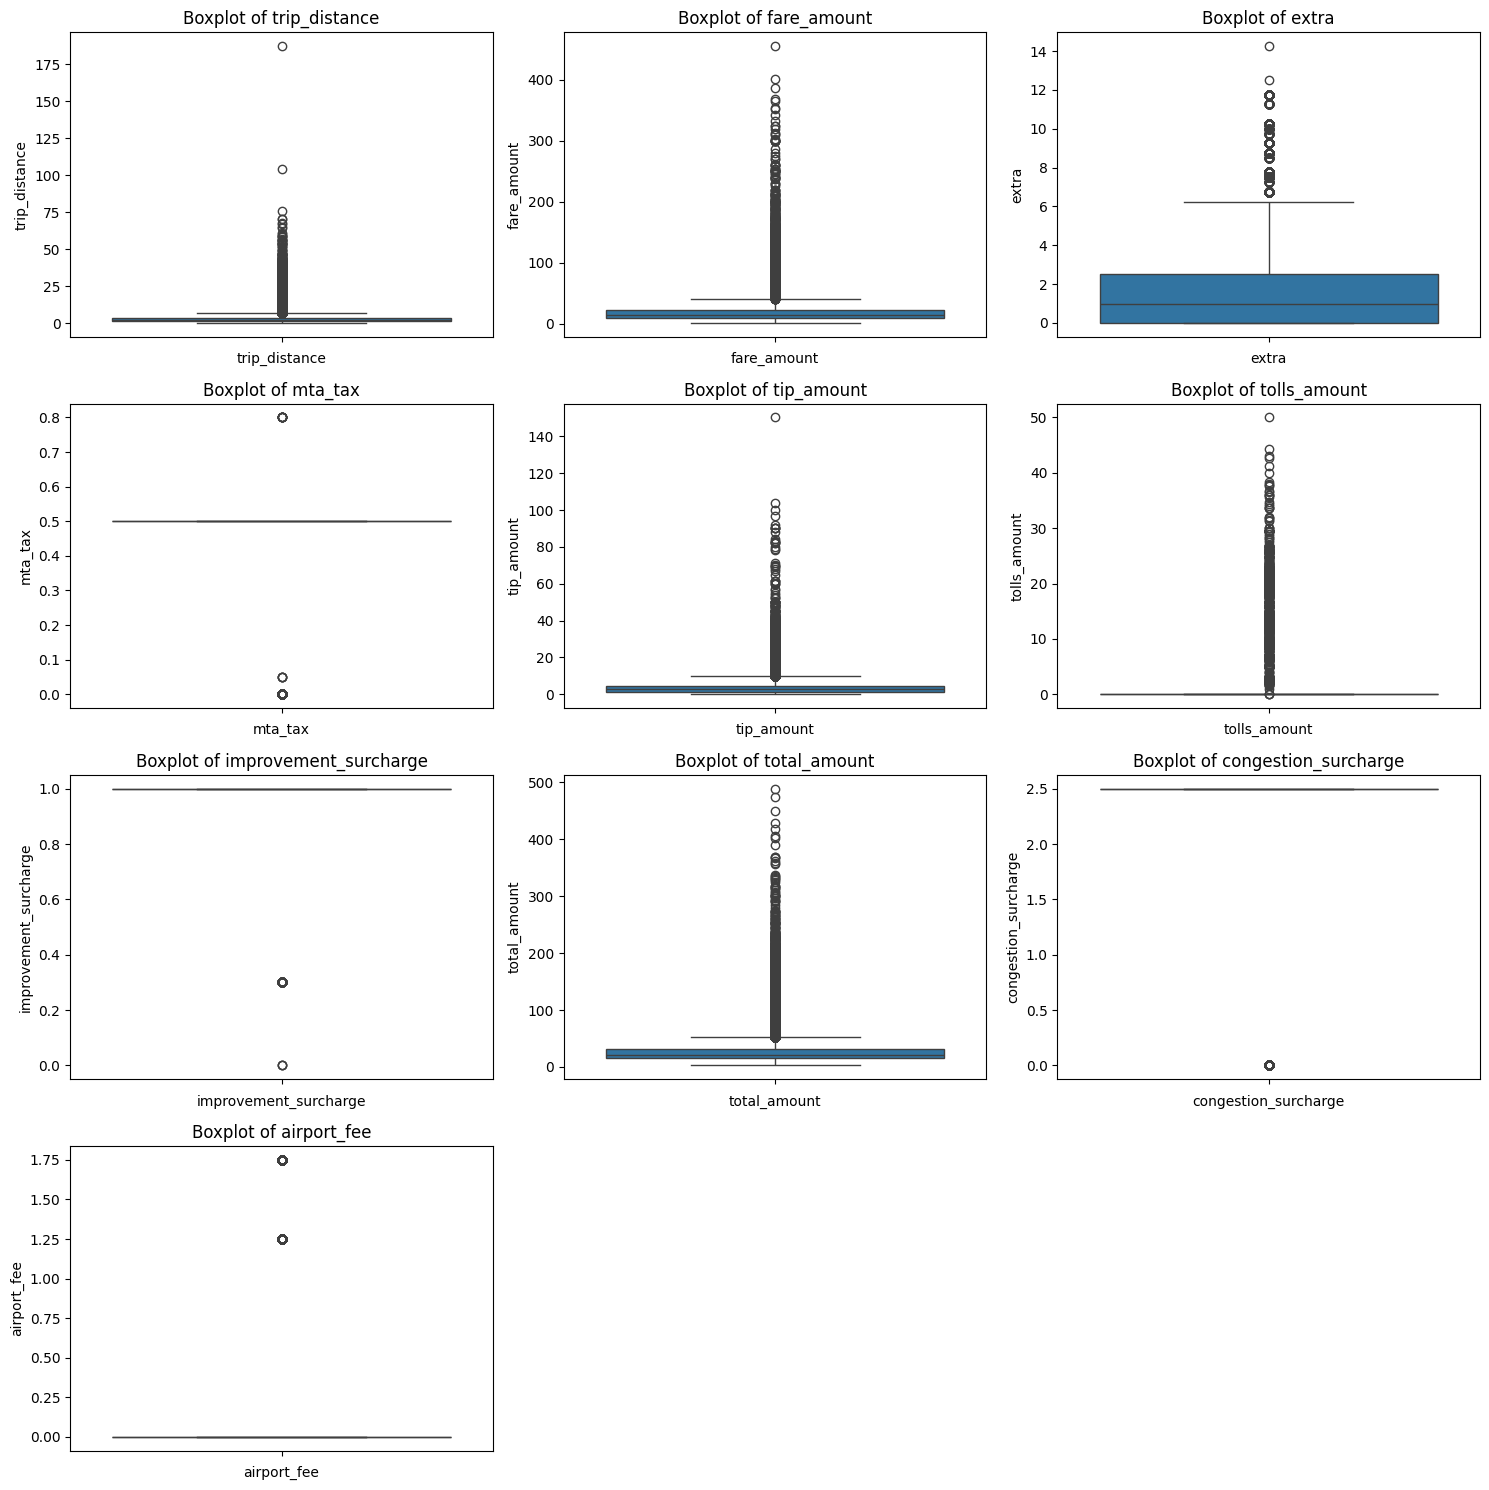

In [120]:
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_nyc_taxi[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

#### <span style="color: blue;">Check for trip distance</span>

<Axes: >

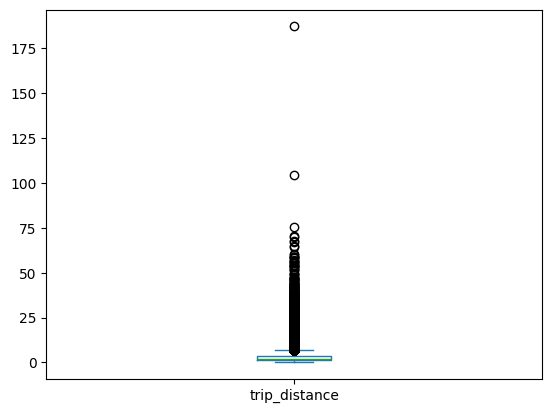

In [121]:
df_nyc_taxi['trip_distance'].plot(kind='box')

<span style="color: blue;">From this we can see there is one extreme outlier above 175 miles. Lets check for it.</span>

In [122]:
df_nyc_taxi[df_nyc_taxi['trip_distance'] > 175]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
83711         2  2023-12-18 10:52:49   2023-12-18 13:40:43                1   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
83711         187.35           5                  N           246   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
83711           265             1        180.0    0.0      0.0        0.15   

       tolls_amount  improvement_surcharge  total_amount  \
83711         12.75                    1.0         193.9   

       congestion_surcharge  airport_fee pickup_date  pickup_hour  
83711                   0.0          0.0  2023-12-18           10

<span style="color: blue;">On Further verification the time difference between pickup and drop is approximately 3 hours to travel 187 miles. So looks like this is valid entry.</span>

#### <span style="color: blue;">Check for fare amount</span>

<Axes: >

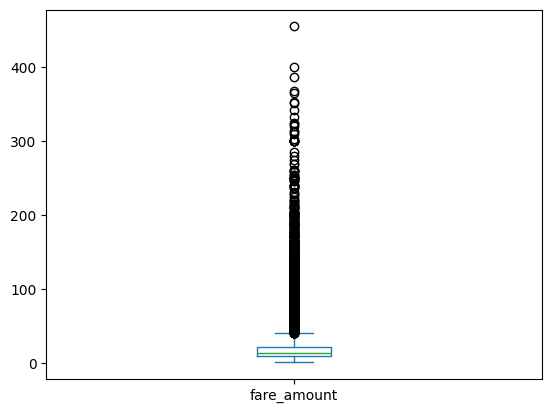

In [123]:
df_nyc_taxi['fare_amount'].plot(kind='box')

<span style="color: blue;">From this we can see there is one outlier above 450. Lets check for it.</span>

In [124]:
df_nyc_taxi[df_nyc_taxi['fare_amount'] > 400]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
87009          2  2023-12-22 13:20:04   2023-12-22 15:48:03                1   
105099         2  2023-02-18 17:22:37   2023-02-18 18:46:42                1   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
87009           53.32           4                  N           163   
105099          70.71           4                  N           186   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
87009            132             2        400.6    0.0      0.5         0.0   
105099           265             4        455.2    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
87009           25.5                    1.0         427.6   
105099          29.5                    1.0         488.7   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
87009                    0.0          0.0  2023-12-22           13  
105099                   2.5          0.0  2023-02-18           17

<span style="color: blue;">From above it looks like this is valid Fare amount by seeing trip distance and pickup and drop time. And extreme outliers of fare amount 0 or less which we already removed.</span>

##### <span style="color: blue;">For extra amount the outlier point is near to 15, which is fair. </span>

##### <span style="color: blue;">For mta tax also the values lies between 0 to 0.8, so this is also ok. </span>

#### <span style="color: blue;">Checking tip amount as it is showing one extreme outlier above 140</span>

<Axes: >

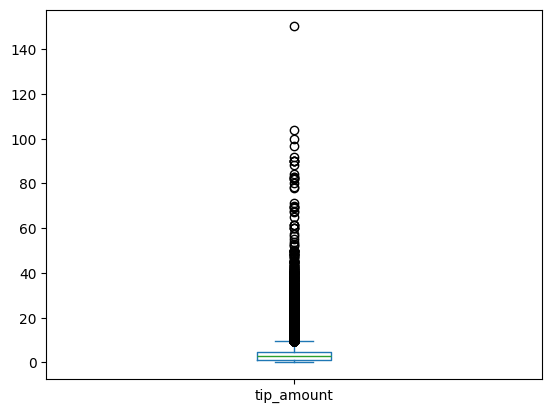

In [125]:
df_nyc_taxi['tip_amount'].plot(kind='box')

In [126]:
df_nyc_taxi[df_nyc_taxi['tip_amount'] > 140]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
188226         1  2023-06-07 13:58:40   2023-06-07 14:05:58                1   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
188226            1.5           1                  N            13   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
188226            87             1         10.0    2.5      0.5      150.29   

        tolls_amount  improvement_surcharge  total_amount  \
188226           0.0                    1.0        164.29   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  
188226                   2.5          0.0  2023-06-07           13

<span style="color: blue;">For fare amount of 10 giving tip amount as 150 is something fishy. Hence we will get rid of this row.</span>

In [127]:
df_nyc_taxi.drop((df_nyc_taxi[df_nyc_taxi['tip_amount'] > 140]).index, inplace=True)

In [128]:
df_nyc_taxi[df_nyc_taxi['tip_amount'] > 140]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

##### <span style="color: blue;">For tolls amount the values lies between 0 to 50, so this is also ok. </span>

##### <span style="color: blue;">For improvement_surcharge the values lies between 0 to 1, so this is also ok. </span>

#### <span style="color: blue;">Checking total amount</span>

<Axes: >

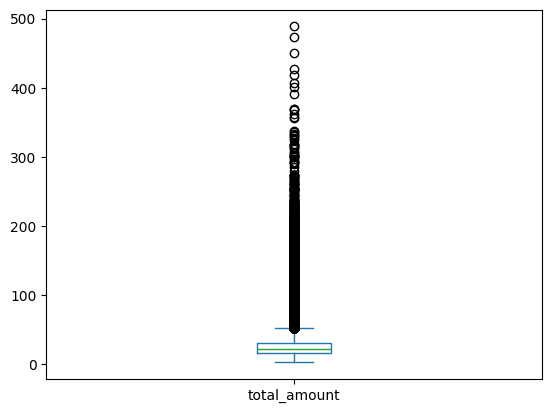

In [129]:
df_nyc_taxi['total_amount'].plot(kind='box')

<span style="color: blue;">Let's check total amount above 350 for any abnormality.</span>

In [130]:
df_nyc_taxi[df_nyc_taxi['total_amount'] > 350]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29394          2  2023-10-11 19:50:29   2023-10-11 21:11:21                1   
75215          2  2023-12-08 17:40:34   2023-12-08 19:18:35                1   
79884          1  2023-12-13 23:03:21   2023-12-14 00:39:24                1   
81501          2  2023-12-15 17:16:37   2023-12-15 19:07:23                4   
87009          2  2023-12-22 13:20:04   2023-12-22 15:48:03                1   
105099         2  2023-02-18 17:22:37   2023-02-18 18:46:42                1   
133593         2  2023-03-29 00:01:01   2023-03-29 01:20:04                1   
136709         2  2023-04-01 22:59:58   2023-04-02 00:22:56                1   
142658         2  2023-04-10 10:09:04   2023-04-10 11:01:40                2   
144643         2  2023-04-12 23:15:01   2023-04-13 02:11:52                1   
164882         2  2023-05-08 18:29:33   2023-05-08 18:35:19                2   
236352         2  2023-08-16 18:16:57   2023-08-16 19:56:37                1   
240257         2  2023-08-23 08:23:01   2023-08-23 09:36:09                1   
253651         2  2023-09-12 08:41:45   2023-09-12 21:06:13                1   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
29394           65.05           4                  N           132   
75215           54.45           4                  N           162   
79884           56.50           5                  N           211   
81501           56.20           4                  N           132   
87009           53.32           4                  N           163   
105099          70.71           4                  N           186   
133593          51.54           4                  N           246   
136709          67.51           5                  N           132   
142658          41.72           5                  N            48   
144643          58.36           4                  N           163   
164882           3.00           5                  N           265   
236352          58.64           4                  N           132   
240257          49.52           5                  N           132   
253651          48.45           5                  N           264   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
29394            265             1        353.0    2.5      0.0       78.64   
75215            265             1        332.7    2.5      0.5      103.84   
79884            265             1        250.0    0.0      0.0       71.10   
81501            265             2        351.6    2.5      0.5        0.00   
87009            132             2        400.6    0.0      0.5        0.00   
105099           265             4        455.2    0.0      0.5        0.00   
133593           265             1        365.6    1.0      0.5        7.00   
136709           265             1        300.0    0.0      0.0       61.51   
142658           265             1        342.0    0.0      0.0       69.70   
144643           265             2        386.6    1.0      0.0        0.00   
164882           265             1        300.0    0.0      0.0       60.20   
236352           265             1        311.7    2.5      0.0       67.73   
240257           265             1        280.0    0.0      0.0       84.30   
253651           133             4        368.0    0.0      0.0        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
29394          36.69                    1.0        473.58   
75215           6.94                    1.0        449.98   
79884          33.57                    1.0        355.67   
81501           0.00                    1.0        357.35   
87009          25.50                    1.0        427.60   
105099         29.50                    1.0        488.70   
133593         12.75                    1.0        390.35   
136709          6.55                    1.0        369.06   
142658          3.00 

<span style="color: blue;">We got 14 rows above, from which almost all rows are ok as trip distance is more than 50 except one row where trip distance is just 3 miles and fare amount is 300 and total amount is 361 which is more for just 3 miles. So we will drop that row.</span>

In [131]:
df_nyc_taxi.drop(164882, inplace=True)

In [132]:
df_nyc_taxi[df_nyc_taxi['total_amount'] > 350]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29394          2  2023-10-11 19:50:29   2023-10-11 21:11:21                1   
75215          2  2023-12-08 17:40:34   2023-12-08 19:18:35                1   
79884          1  2023-12-13 23:03:21   2023-12-14 00:39:24                1   
81501          2  2023-12-15 17:16:37   2023-12-15 19:07:23                4   
87009          2  2023-12-22 13:20:04   2023-12-22 15:48:03                1   
105099         2  2023-02-18 17:22:37   2023-02-18 18:46:42                1   
133593         2  2023-03-29 00:01:01   2023-03-29 01:20:04                1   
136709         2  2023-04-01 22:59:58   2023-04-02 00:22:56                1   
142658         2  2023-04-10 10:09:04   2023-04-10 11:01:40                2   
144643         2  2023-04-12 23:15:01   2023-04-13 02:11:52                1   
236352         2  2023-08-16 18:16:57   2023-08-16 19:56:37                1   
240257         2  2023-08-23 08:23:01   2023-08-23 09:36:09                1   
253651         2  2023-09-12 08:41:45   2023-09-12 21:06:13                1   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
29394           65.05           4                  N           132   
75215           54.45           4                  N           162   
79884           56.50           5                  N           211   
81501           56.20           4                  N           132   
87009           53.32           4                  N           163   
105099          70.71           4                  N           186   
133593          51.54           4                  N           246   
136709          67.51           5                  N           132   
142658          41.72           5                  N            48   
144643          58.36           4                  N           163   
236352          58.64           4                  N           132   
240257          49.52           5                  N           132   
253651          48.45           5                  N           264   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
29394            265             1        353.0    2.5      0.0       78.64   
75215            265             1        332.7    2.5      0.5      103.84   
79884            265             1        250.0    0.0      0.0       71.10   
81501            265             2        351.6    2.5      0.5        0.00   
87009            132             2        400.6    0.0      0.5        0.00   
105099           265             4        455.2    0.0      0.5        0.00   
133593           265             1        365.6    1.0      0.5        7.00   
136709           265             1        300.0    0.0      0.0       61.51   
142658           265             1        342.0    0.0      0.0       69.70   
144643           265             2        386.6    1.0      0.0        0.00   
236352           265             1        311.7    2.5      0.0       67.73   
240257           265             1        280.0    0.0      0.0       84.30   
253651           133             4        368.0    0.0      0.0        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
29394          36.69                    1.0        473.58   
75215           6.94                    1.0        449.98   
79884          33.57                    1.0        355.67   
81501           0.00                    1.0        357.35   
87009          25.50                    1.0        427.60   
105099         29.50                    1.0        488.70   
133593         12.75                    1.0        390.35   
136709          6.55                    1.0        369.06   
142658          3.00                    1.0        418.20   
144643         12.75                    1.0        401.35   
236352         21.69                    1.0        406.37   
240257          0.00                    1.0        367.05   
253651

##### <span style="color: blue;">For congestion_surcharge the values lies between 0 to 2.5, so this is also ok. </span>

##### <span style="color: blue;">For airport_fee the values are either 1.25 or 1.75, but as per data dictionary it is mentioned that 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports. So 1.75 is invalid airport_fee.</span>

In [133]:
df_nyc_taxi.airport_fee.value_counts()

airport_fee
0.00    237682
1.75     16684
1.25      5679
Name: count, dtype: int64

<span style="color: blue;">Let's check the pickup location as LaGuardia and John F. Kennedy Airport i.e. 138 or 132. </span>

In [134]:
df_nyc_taxi[df_nyc_taxi['PULocationID'].isin([138,132])]['airport_fee'].value_counts()

airport_fee
1.75    15953
1.25     5363
0.00      965
Name: count, dtype: int64

In [135]:
df_nyc_taxi.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  260045.000000                      260045                      260045   
mean        1.739360  2023-07-02 04:42:38.736868  2023-07-02 05:00:06.654155   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000         2023-04-02 01:47:05         2023-04-02 01:59:23   
50%         2.000000         2023-06-26 12:07:18         2023-06-26 12:25:41   
75%         2.000000         2023-10-06 06:41:14         2023-10-06 06:56:04   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.438984                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    260045.000000  260045.000000  260045.000000  260045.000000   
mean          1.374016       3.508279       1.059263     165.207091   
min           1.000000       0.010000       1.000000       1.000000   
25%           1.000000       1.100000       1.000000     132.000000   
50%           1.000000       1.810000       1.000000     162.000000   
75%           1.000000       3.470000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.866365       4.538277       0.319959      63.922572   

        DOLocationID   payment_type    fare_amount          extra  \
count  260045.000000  260045.000000  260045.000000  260045.000000   
mean      163.955177       1.217935      19.683371       1.609181   
min         1.000000       1.000000       1.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       5.000000     455.200000      14.250000   
std        69.725717       0.536768      17.663164       1.828081   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  260045.000000  260045.000000  260045.000000          260045.000000   
mean        0.496912       3.578066       0.595511               0.999687   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.480000       0.000000               1.000000   
max         0.800000     103.840000      50.000000               1.000000   
std         0.039276       3.977884       2.162808               0.014916   

        total_amount  congestion_surcharge    airport_fee  \
count  260045.000000         260045.000000  260045.000000   
mean       28.828285              2.284335       0.139575   
min         2.590000              0.000000       0.000000   
25%        16.000000              2.500000       0.000000   
50%        21.200000              2.500000       0.000000   
75%        30.720000              2.500000       0.000000   
max       488.700000              2.500000       1.750000   
std        22.329200              0.701892       0.459485   

                         pickup_date    pickup_hour  
count                         260045  260045.000000  
mean   2023-07-01 13:55:33.895287296      14.283213  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-26 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.789936

<span style="color: blue;">There are more entries of 1.75 than 1.25 and when checked online references the actual airport fee when pick up is LaGuardia and John F. Kennedy Airport is 1.75. So just keeping these rows as it is.</span>

> ## <span style="color: blue;"><u>Recap of Data Cleaning</u></span>
> 1. Index has been reset for the DataFrame.
2. Airport Fee has been combined from 2 columns to single column and dropped the second column.
3. Dropped the negative entries in total_amount column, which cleared 11 rows.
4. Dropped 1 row as it was having negative value in extra charges column.
5. Identified RatecodeID as 99 which is out of given category, so we will consider this data as unknown data and replace it with RatecodeID 1 = Standard rate.
6. Checked for VendorID column and found that there is some additional vendor data apart from mentioned in Data dictionary. So, we have deleted 64 rows correspond to this unknown vendor.
7. Checked for invalid trips where pickup time >= drop time and dropped 117 rows.
8. Checked for trip distance <= 0 and dropped 5167 rows for which trip distance was 0.
9. Assuming where there is no data for passenger_count atleast 1 passanger travelled. Hence replaced the null values in passenger_count column with 1.
10. Also there cannot be trip without any passenger. Hence replaced the value 0 for passenger count to 1.
11. Replaced null values for RatecodeID with 1, assuming that the trips will have standard charges.
12. All missing values in store_and_fwd_flag will be assumed to be device problem (data are stored when no signal available, then forward later) and hence replaced these values with 'Y'.
13. For the congestion surcharge = Null, Adding congestion surcharge = 2.5 and modifying Total Amount where pickup location or drop location is Manhattan  (230,231,186,140,151,263,236,143,42,41) else replacing null values 0 as there is no congestion surcharge.
14. For the airport fee = Null, Adding airport fee = 1.25 and modifying Total Amount where pickup location is LaGuardia or John F. Kennedy Airports (138,132) else replacing null values 0 as there is no airport fee.
15. Deleted 2 rows for the passenger count > 6.
16. Removed 11 rows where trip distance is almost 0 and fare amount is above 100.
17. Dropped 3 rows where trip distance i almost 0 and fare amount is also 0.
18. Dropped 3 rows where Trip distance above 6000 miles which are extream outliers.
19. Set payment type as 1 = Credit card for 5120 rows, where there is an entry for tip amount.
20. Replaced payment type as 5 = Unknown for 1558 rows, where payment type was 0.
21. Dropped 61 rows, where fare amount is either 0 or almost 0.
22. Changed columns like VendorID, passenger_count, RatecodeID, PULocationID, DOLocationID, payment_type from float to integer.
23. Deleted 1 row as outlier in tip amount, as for fare amount of 10 giving tip amount as 150 is something fishy.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [136]:
df_nyc_taxi.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: <span style="color: blue;">Categorical</span>
* `tpep_pickup_datetime`: <span style="color: blue;">Categorical</span>
* `tpep_dropoff_datetime`: <span style="color: blue;">Categorical</span>
* `passenger_count`: <span style="color: blue;">Categorical</span>
* `trip_distance`: <span style="color: blue;">Numerical</span>
* `RatecodeID`: <span style="color: blue;">Categorical</span>
* `PULocationID`: <span style="color: blue;">Categorical</span>
* `DOLocationID`: <span style="color: blue;">Categorical</span>
* `payment_type`: <span style="color: blue;">Categorical</span>
* `pickup_hour`: <span style="color: blue;">Categorical</span>
* `trip_duration`: <span style="color: blue;">Categorical</span>


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: <span style="color: blue;">Numerical</span>
* `extra`: <span style="color: blue;">Numerical</span>
* `mta_tax`: <span style="color: blue;">Numerical</span>
* `tip_amount`: <span style="color: blue;">Numerical</span>
* `tolls_amount`: <span style="color: blue;">Numerical</span>
* `improvement_surcharge`: <span style="color: blue;">Numerical</span>
* `total_amount`: <span style="color: blue;">Numerical</span>
* `congestion_surcharge`: <span style="color: blue;">Numerical</span>
* `airport_fee`: <span style="color: blue;">Numerical</span>

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

#### <span style="color: blue;">Hourly trends in taxi pickups</span>

In [137]:
# Find and show the hourly trends in taxi pickups

<Axes: xlabel='pickup_hour', ylabel='count'>

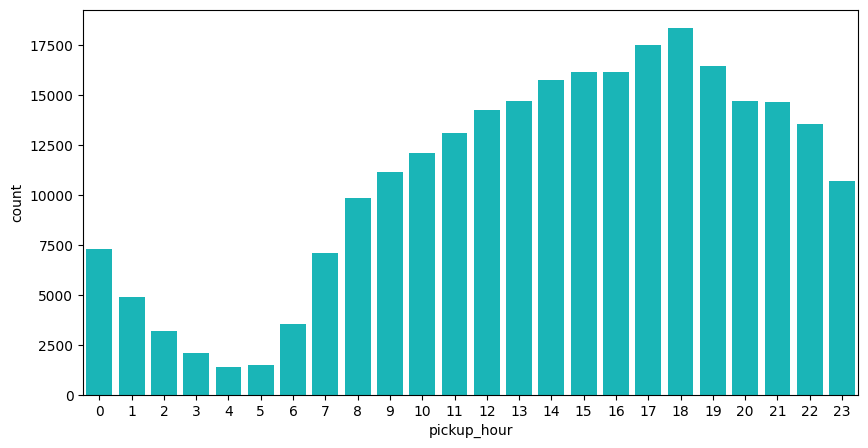

In [138]:
#Plot bar plot of trip count over hour
plt.figure(figsize=(10,5))
sns.countplot(data=df_nyc_taxi, x='pickup_hour', palette=['#00CED1'])

<span style="color: blue;">The number of trips are peaked between **5 PM - 7 PM**, it could be assumed that people are using taxi for commuting from office to home.</span>

 > <span style="color: blue;">It can be the base of recommendation for taxi companies to **dispatch higher number of taxis during peak hours (5PM - 7PM)**.</span>

#### <span style="color: blue;">Periodically trends in taxi pickup</span>

In [139]:
#Defining function to count period of the day 
def f(x):
    if (x > 4) and (x <= 7):
        return 'Early Morning'
    elif (x > 7) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 15):
        return'Noon'
    elif (x > 15) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [140]:
#Adding Periods Columns
df_nyc_taxi['pickup_periods'] = df_nyc_taxi['pickup_hour'].apply(f)

<Axes: xlabel='pickup_periods', ylabel='count'>

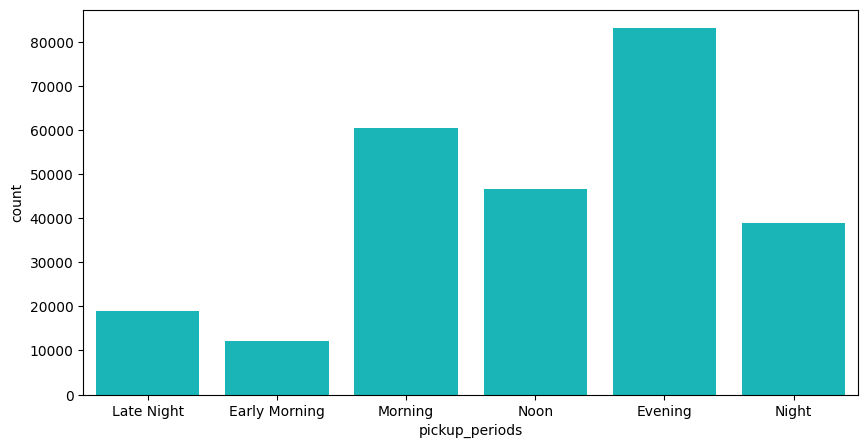

In [141]:
#Plot bar plot of trip count over hour
plt.figure(figsize=(10,5))
sns.countplot(data=df_nyc_taxi, x='pickup_periods', palette=['#00CED1'])

> <span style="color: blue;">The number of trips are more for **evening and morning**, it is clear that people are using taxi for **commuting from home to office and vice-versa**. Taxi companies must **dispatch higher number of taxies for Evening and Morning**. </span>

#### <span style="color: blue;">Daily trends in taxi pickups (days of the week)</span>

In [142]:
# Find and show the daily trends in taxi pickups (days of the week)

In [143]:
#Adding Day Name Columns
df_nyc_taxi['pickup_day']=df_nyc_taxi['tpep_pickup_datetime'].dt.day_name()
df_nyc_taxi['dropoff_day']=df_nyc_taxi['tpep_dropoff_datetime'].dt.day_name()

In [144]:
df_nyc_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74           1                  N           138           256   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4          19.24           1                  Y            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

  pickup_date  pickup_hour pickup_periods pickup_day dropoff_day  
0  2023-01-01            0     Late Night     Sunday      Sunday  
1  2023-01-01            0     Late Night     Sunday      Sunday  
2  2023-01-01            0     Late Night     Sunday      Sunday  
3  2023-01-01            0     Late Night     Sunday      Sunday  
4  2023-01-01            0     Late Night     Sunday      Sunday

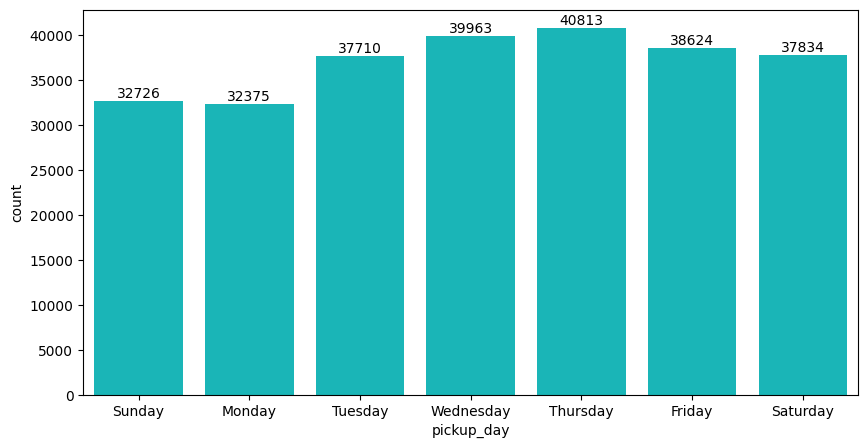

In [145]:
#Plot bar plot of trip count over day_name
plt.figure(figsize=(10,5))
pickup_day_barplot = sns.countplot(data=df_nyc_taxi, x='pickup_day', palette=['#00CED1'])
#Adding value labels on each bar
for i in pickup_day_barplot.containers:
    pickup_day_barplot.bar_label(i,)

<span style="color: blue;">Taxi trips are **peaked on Thursday** and distributed almost **evenly on other weekdays except Monday**, and also lower on **Monday and Sunday**.</span>

> <span style="color: blue;">It's understandable that people are **comuting less on Monday and Sunday** and primarily use taxi for commuting to/from offices.</span>

#### <span style="color: blue;">Monthly trends in pickups</span>

In [146]:
# Show the monthly trends in pickups

In [147]:
df_nyc_taxi['pickup_month']=df_nyc_taxi['tpep_pickup_datetime'].dt.month
df_nyc_taxi['dropoff_month']=df_nyc_taxi['tpep_dropoff_datetime'].dt.month

In [148]:
df_nyc_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74           1                  N           138           256   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4          19.24           1                  Y            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

  pickup_date  pickup_hour pickup_periods pickup_day dropoff_day  \
0  2023-01-01            0     Late Night     Sunday      Sunday   
1  2023-01-01            0     Late Night     Sunday      Sunday   
2  2023-01-01            0     Late Night     Sunday      Sunday   
3  2023-01-01            0     Late Night     Sunday      Sunday   
4  2023-01-01            0     Late Night     Sunday      Sunday   

   pickup_month  dropoff_month  
0             1              1  
1             1              1  
2             1              1  
3             1              1  
4             1              1

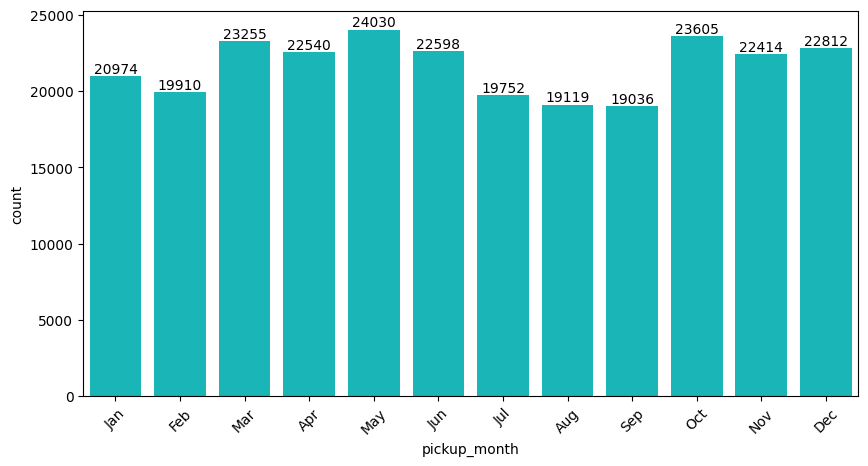

In [149]:
#Plot bar plot of trip count over month
plt.figure(figsize=(10,5))
pickup_month_barplot = sns.countplot(data=df_nyc_taxi, x='pickup_month', palette=['#00CED1'])
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
#Adding value labels on each bar
for i in pickup_month_barplot.containers:
    pickup_month_barplot.bar_label(i,)

> <span style="color: blue;">From the number of trips over month, we can see that the total trips are **fluctuating monthly**. But still we can see that **more demand is there in month of May followed by October**.</span>

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [150]:
# Analyse the above parameters

In [151]:
df_nyc_taxi[['fare_amount','tip_amount','total_amount','trip_distance']].describe()

fare_amount     tip_amount   total_amount  trip_distance
count  260045.000000  260045.000000  260045.000000  260045.000000
mean       19.683371       3.578066      28.828285       3.508279
std        17.663164       3.977884      22.329200       4.538277
min         1.000000       0.000000       2.590000       0.010000
25%         9.300000       1.000000      16.000000       1.100000
50%        13.500000       2.860000      21.200000       1.810000
75%        21.900000       4.480000      30.720000       3.470000
max       455.200000     103.840000     488.700000     187.350000

<span style="color: blue;">There are no negative values as we have removed them in Data Cleaning part only, but there are 0 in tip amount which is fair but there are some values where trip distance is below 0.1 as well. </span>

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

<span style="color: blue;">Yes, it will be better to create copy of Dataframe without 0 values. but we need to check few condition for it.</span>

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [152]:
# Create a df with non zero entries for the selected parameters.

In [153]:
df_nyc_taxi[df_nyc_taxi.trip_distance < 0.1]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
74             2  2023-01-01 01:03:52   2023-01-01 01:05:27                1   
166            2  2023-01-01 06:41:10   2023-01-01 06:41:24                1   
288            2  2023-01-01 13:19:39   2023-01-01 13:19:52                1   
478            2  2023-01-01 20:53:47   2023-01-01 20:54:05                3   
687            2  2023-01-02 13:53:14   2023-01-02 14:10:03                1   
...          ...                  ...                   ...              ...   
262615         2  2023-09-27 14:25:32   2023-09-27 14:25:57                1   
263344         2  2023-09-28 12:18:03   2023-09-28 12:18:43                1   
264223         2  2023-09-29 12:36:53   2023-09-29 12:37:21                1   
264763         2  2023-09-30 02:40:14   2023-09-30 02:40:25                1   
264802         2  2023-09-30 06:16:03   2023-09-30 06:16:48                2   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
74               0.02           1                  N           142   
166              0.03           3                  N           256   
288              0.01           3                  N           230   
478              0.01           1                  N           132   
687              0.08           1                  N           234   
...               ...         ...                ...           ...   
262615           0.02           2                  N            90   
263344           0.02           1                  N           237   
264223           0.01           1                  N           132   
264763           0.01           1                  N           132   
264802           0.03           1                  N           132   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
74               142             2          3.7    1.0      0.5         0.0   
166              256             4         23.0    0.0      0.0         0.0   
288              230             2         23.0    0.0      0.0         0.0   
478              132             2          3.0    1.0      0.5         0.0   
687              234             2          3.0    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
262615            90             2         70.0    0.0      0.5         0.0   
263344           237             2          3.0    0.0      0.5         0.0   
264223           132             2          3.0    0.0      0.5         0.0   
264763           132             3          3.0    1.0      0.5         0.0   
264802           132             4          3.0    1.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
74               0.0                    1.0          8.70   
166              0.0                    1.0         24.00   
288              0.0                    1.0         24.00   
478              0.0                    1.0          6.75   
687              0.0                    1.0          7.00   
...              ...                    ...           ...   
262615           0.0                    1.0         74.00   
263344           0.0                    1.0          7.00   
264223           0.0                    1.0          6.25   
264763           0.0                    1.0          7.25   
264802           0.0                    1.0          7.25   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  \
74                       2.5         0.00  2023-01-01            1   
166                      0.0         0.00  2023-01-01            6   
288                      0.0         0.00  2023-01-01           13   
478                      0.0         1.25  2023-01-01           20   
687                      2.5         0.00  2023-01-02           13   
...                      ...          ...         ...          ...   
262615                   2.5      

In [154]:
#Checking pickup and drop location different
df_nyc_taxi[((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.PULocationID != df_nyc_taxi.DOLocationID))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3784           2  2023-01-07 08:39:05   2023-01-07 08:39:09                2   
4570           2  2023-01-08 10:19:56   2023-01-08 10:20:23                1   
6718           2  2023-01-11 17:29:14   2023-01-11 17:33:50                1   
8210           2  2023-01-13 16:05:53   2023-01-13 16:07:07                1   
10923          2  2023-01-17 15:51:53   2023-01-17 15:52:45                1   
...          ...                  ...                   ...              ...   
249873         2  2023-09-07 14:19:46   2023-09-07 14:20:13                2   
250116         2  2023-09-07 18:28:02   2023-09-07 18:30:40                1   
250989         2  2023-09-08 18:44:12   2023-09-08 18:46:12                6   
252656         2  2023-09-10 19:34:58   2023-09-10 19:35:01                1   
260386         2  2023-09-20 22:44:34   2023-09-20 23:24:46                1   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3784             0.04           2                  N            70   
4570             0.06           1                  N           162   
6718             0.01           2                  N           107   
8210             0.06           5                  N           132   
10923            0.01           1                  N           100   
...               ...         ...                ...           ...   
249873           0.03           5                  N           145   
250116           0.08           1                  N            90   
250989           0.08           1                  N            33   
252656           0.05           5                  N           132   
260386           0.01           5                  N           249   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3784             138             1        70.00    0.0      0.5       14.30   
4570             170             1         3.00    0.0      0.5        0.00   
6718             234             4        70.00    5.0      0.5        0.00   
8210             264             1        70.00    0.0      0.5       14.30   
10923             48             2         3.00    0.0      0.5        0.00   
...              ...           ...          ...    ...      ...         ...   
249873           230             1        84.00    0.0      0.0       17.00   
250116           234             1         4.40    2.5      0.5        1.09   
250989            65             2         3.70    2.5      0.5        0.00   
252656           264             1        87.50    0.0      0.5       17.80   
260386           140             2        25.18    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
3784             0.0                    1.0         85.80   
4570             0.0                    1.0          7.00   
6718             0.0                    1.0         79.00   
8210             0.0                    1.0         85.80   
10923            0.0                    1.0          7.00   
...              ...                    ...           ...   
249873           0.0                    1.0        102.00   
250116           0.0                    1.0         11.99   
250989           0.0                    1.0          7.70   
252656           0.0                    1.0        106.80   
260386           0.0                    1.0         29.18   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  \
3784                     0.0          0.0  2023-01-07            8   
4570                     2.5          0.0  2023-01-08           10   
6718                     2.5          0.0  2023-01-11           17   
8210                     0.0          0.0  2023-01-13           16   
10923                    2.5          0.0  2023-01-17           15   
...                      ...          ...         ...          ...   
249873                   0.0      

<span style="color: blue;">There are 141 rows where distance is less than 0.1 and pickup location and drop location is not same. So it is not possible to travel from one location to another location with such a small trip distance. Hence we will create another dataframe by dropping them.</span>

In [155]:
df_nyc_taxi_new = df_nyc_taxi[~((df_nyc_taxi.trip_distance < 0.1) & (df_nyc_taxi.PULocationID != df_nyc_taxi.DOLocationID))]

In [156]:
df_nyc_taxi_new.reset_index(drop=True, inplace=True)

In [157]:
df_nyc_taxi_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74           1                  N           138           256   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4          19.24           1                  Y            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

  pickup_date  pickup_hour pickup_periods pickup_day dropoff_day  \
0  2023-01-01            0     Late Night     Sunday      Sunday   
1  2023-01-01            0     Late Night     Sunday      Sunday   
2  2023-01-01            0     Late Night     Sunday      Sunday   
3  2023-01-01            0     Late Night     Sunday      Sunday   
4  2023-01-01            0     Late Night     Sunday      Sunday   

   pickup_month  dropoff_month  
0             1              1  
1             1              1  
2             1              1  
3             1              1  
4             1              1

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

#### <span style="color: blue;">Monthly revenue trend</span>

In [158]:
# Group data by month and analyse monthly revenue

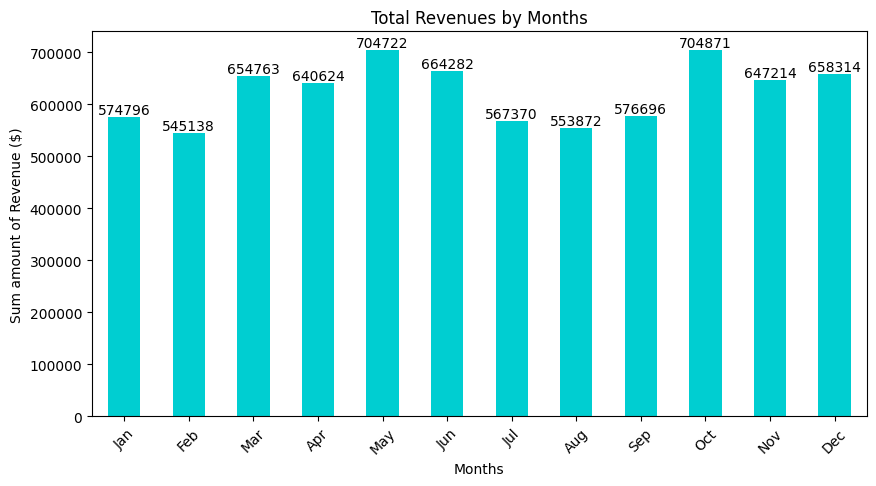

In [159]:
#Total revenues over Months
plt.figure(figsize=(10,5))
monthly_revenue_barplot =  df_nyc_taxi_new.groupby(df_nyc_taxi_new['pickup_month'])['total_amount'].sum().plot(kind='bar', color=['#00CED1'])
plt.xlabel("Months")
plt.ylabel("Sum amount of Revenue ($)")
plt.title("Total Revenues by Months")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
for i in monthly_revenue_barplot.containers:
    monthly_revenue_barplot.bar_label(i,)

plt.show()

> <span style="color: blue;">From the Monthly revenue trend, we can see that the **total revenue is fluctuating monthly**. But still we can see that **more revenue is generated in October month followed by May** when there are more number of trips.</span>

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

#### <span style="color: blue;">Quarterly revenue proportion</span>

In [160]:
# Calculate proportion of each quarter

In [161]:
#Adding Quarter Column
df_nyc_taxi_new['pickup_quarter'] = df_nyc_taxi_new['pickup_date'].dt.quarter

In [162]:
df_nyc_taxi_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74           1                  N           138           256   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4          19.24           1                  Y            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

  pickup_date  pickup_hour pickup_periods pickup_day dropoff_day  \
0  2023-01-01            0     Late Night     Sunday      Sunday   
1  2023-01-01            0     Late Night     Sunday      Sunday   
2  2023-01-01            0     Late Night     Sunday      Sunday   
3  2023-01-01            0     Late Night     Sunday      Sunday   
4  2023-01-01            0     Late Night     Sunday      Sunday   

   pickup_month  dropoff_month  pickup_quarter  
0             1              1               1  
1             1              1               1  
2             1              1               1  
3             1              1               1  
4             1              1               1

In [163]:
df_proportion = df_nyc_taxi_new.groupby(df_nyc_taxi_new['pickup_quarter'])['total_amount'].sum()/sum(df_nyc_taxi_new.total_amount)

In [164]:
df_proportion = df_proportion.reset_index()

In [165]:
df_proportion.columns = ['Quarter', 'Proportion']

In [166]:
df_proportion

Quarter  Proportion
0        1    0.236858
1        2    0.268213
2        3    0.226614
3        4    0.268316

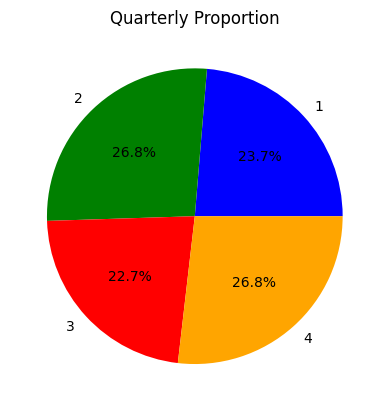

In [167]:
plt.pie(df_proportion['Proportion'], labels=df_proportion['Quarter'], autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange'])
plt.title("Quarterly Proportion")
plt.show()

> <span style="color: blue;">From the above we can see that revenue is **almost equally sagregated between all 4 Quarters**, but still **Q2 and Q4 are having slightly more revenue**.</span>

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

#### <span style="color: blue;">Relationship between trip_distance and fare_amount</span>

In [168]:
# Show how trip fare is affected by distance

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

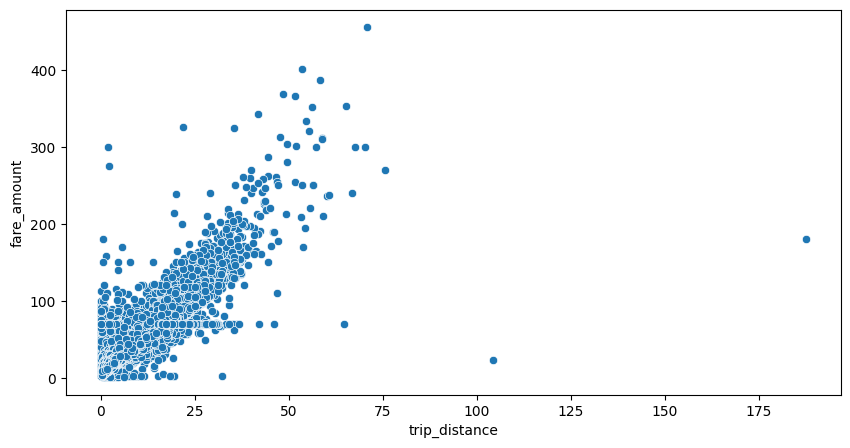

In [169]:
#plot to show relationship between trip_distance and fare_amount
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_nyc_taxi_new, x="trip_distance", y="fare_amount")

In [170]:
#Finding correlation value between trip_distance and fare_amount
print("Correlation value between trip_distance and fare_amount is: ", df_nyc_taxi_new['trip_distance'].corr(df_nyc_taxi_new['fare_amount']))

Correlation value between trip_distance and fare_amount is:  0.9448303048426372


> <span style="color: blue;">A correlation value of 0.94483 means there is a **strong positive correlation** between **trip_distance and fare_amount**. </span>

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

#### <span style="color: blue;">Relationship between trip_duration and fare_amount</span>

In [171]:
# Show relationship between fare and trip duration

In [172]:
#Calculating trip_duration
df_nyc_taxi_new['trip_duration'] = (df_nyc_taxi_new['tpep_dropoff_datetime'] - df_nyc_taxi_new['tpep_pickup_datetime']).dt.seconds/60

<Axes: xlabel='trip_duration', ylabel='fare_amount'>

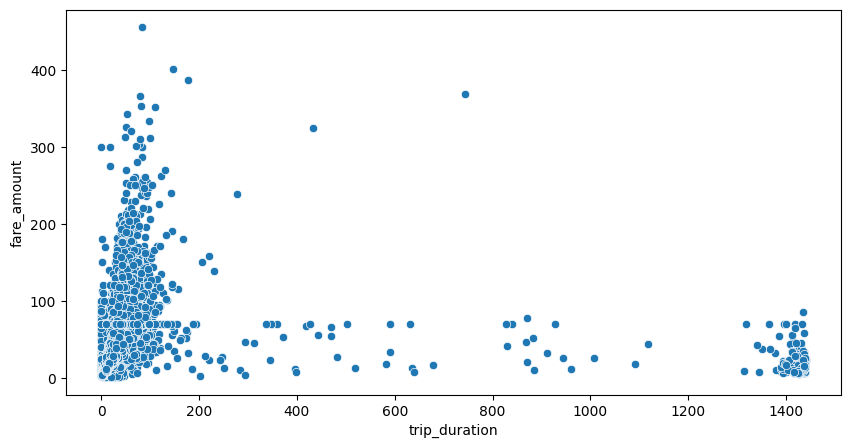

In [173]:
#plot to show relationship between trip_distance and fare_amount
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_nyc_taxi_new, x="trip_duration", y="fare_amount")

In [174]:
#Finding correlation value between trip_duration and fare_amount
print("Correlation value between trip_duration and fare_amount is: ", df_nyc_taxi_new['trip_duration'].corr(df_nyc_taxi_new['fare_amount']))

Correlation value between trip_duration and fare_amount is:  0.29050568534034493


> <span style="color: blue;">A correlation value of 0.2905 means there is a **very weak correlation** between **trip_duration and fare_amount**. Trip duration is more but still the fare amount is less, this may be due to traffic the trip duration is more. </span>

#### <span style="color: blue;">Relationship between number of passengers and fare_amount</span>

In [175]:
# Show relationship between fare and number of passengers

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

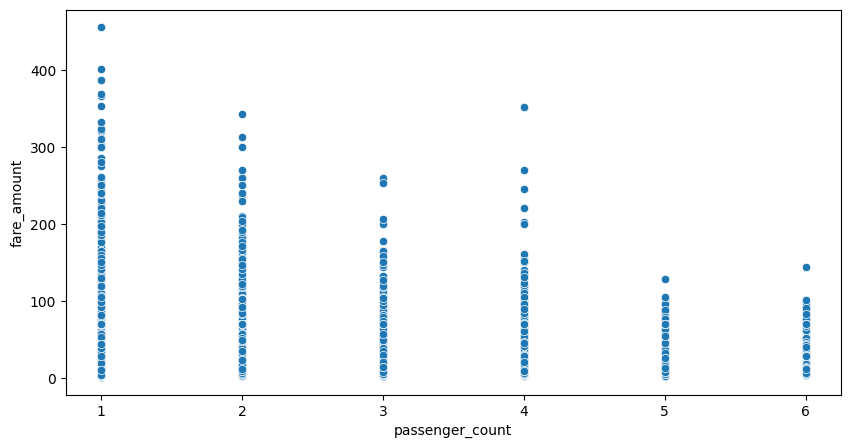

In [176]:
#plot to show relationship between passenger_count and fare_amount
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_nyc_taxi_new, x="passenger_count", y="fare_amount")

In [177]:
#Finding correlation value between passenger_count and fare_amount
print("Correlation value between passenger_count and fare_amount is: ", df_nyc_taxi_new['passenger_count'].corr(df_nyc_taxi_new['fare_amount']))

Correlation value between passenger_count and fare_amount is:  0.039748613587335176


> <span style="color: blue;">A correlation value of 0.0397 which is almost 0 means there is a **No correlation** between **passenger_count and fare_amount**, as taxi fares are typically calculated based on distance, time, surcharges, and other factors, not just the number of passengers. </span>

#### <span style="color: blue;">Relationship between trip_distance and tip_amount</span>

In [178]:
# Show relationship between tip and trip distance

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

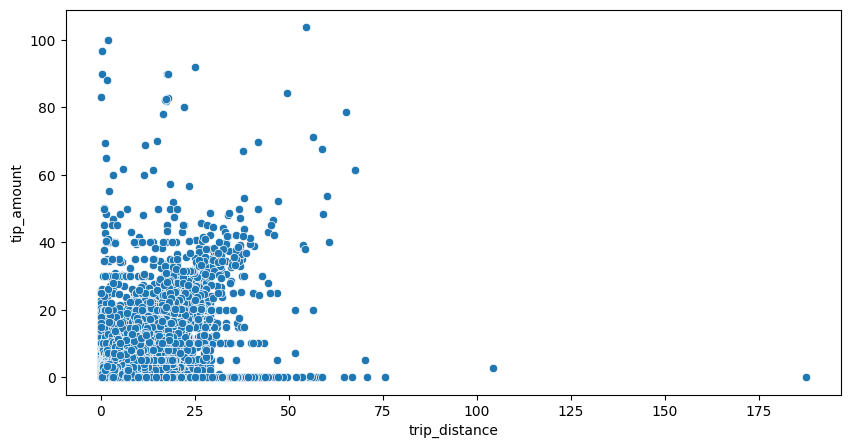

In [179]:
#plot to show relationship between trip_distance and tip_amount
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_nyc_taxi_new, x="trip_distance", y="tip_amount")

In [180]:
#Finding correlation value between trip_distance and tip_amount
print("Correlation value between trip_distance and tip_amount is: ", df_nyc_taxi_new['trip_distance'].corr(df_nyc_taxi_new['tip_amount']))

Correlation value between trip_distance and tip_amount is:  0.5925638720592957


> <span style="color: blue;">A correlation value of 0.59256 means there is a **Moderate positive correlation** between **trip_distance and tip_amount**. </span>

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

#### <span style="color: blue;">Analysis by Payment type</span>

In [181]:
# Analyse the distribution of different payment types (payment_type).

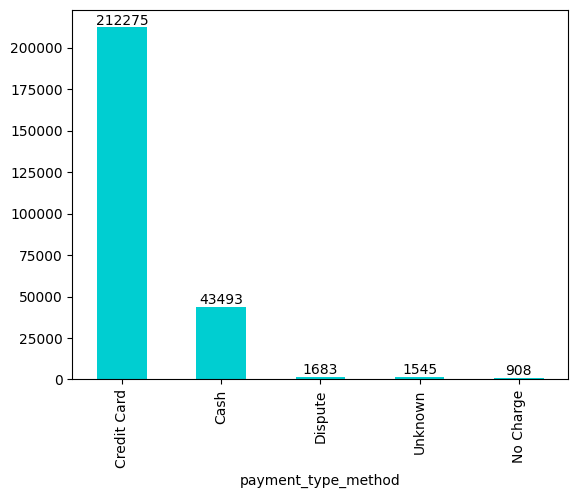

In [182]:
# Define labels to payment type
payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown'
}

df_nyc_taxi_new['payment_type_method']=df_nyc_taxi_new['payment_type'].map(payment_type_labels)
#Plotting bar chart of trip count by payment type
payment_type_barplot = df_nyc_taxi_new['payment_type_method'].value_counts().plot(kind='bar', color=['#00CED1'])

for i in payment_type_barplot.containers:
    payment_type_barplot.bar_label(i,)

<span style="color: blue;">Payment types are:</span>

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown



<span style="color: blue;">**Credit card** are most preferred payment options when using taxi services.</span>

> <span style="color: blue;">It could be recommended that taxi companies could leverage this by partnering with credit card companies, and reward their customers for using taxi services.</span>

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [183]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [184]:
import geopandas as gpd

In [185]:
# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

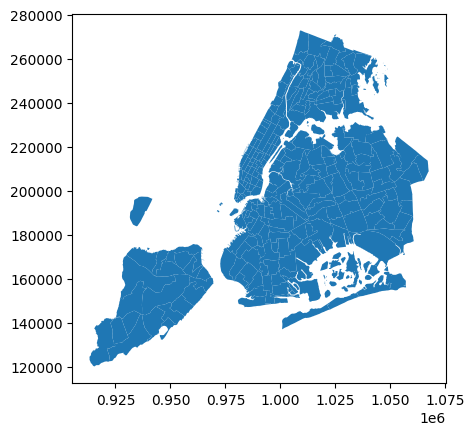

In [186]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

#### <span style="color: blue;">Merge zones and trip records using PULocationID and LocationID</span>

In [187]:
# Merge zones and trip records using locationID and PULocationID

In [188]:
#Join 'PickUpLocation' 
df_nyc_taxi_new = df_nyc_taxi_new.merge(zones[['borough', 'zone']], left_on=df_nyc_taxi_new['PULocationID'], right_on=zones['LocationID'], how='inner')

#Renaming PickUp Zone Columns
df_nyc_taxi_new.rename(columns={'borough':'PU_borough', 'zone':'PU_zone'}, inplace=True)

In [189]:
df_nyc_taxi_new.head()

key_0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    138         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1    161         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2    237         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3    143         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4     66         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                1           7.74           1                  N   
1                2           1.24           1                  N   
2                3           1.44           1                  N   
3                1           0.54           1                  N   
4                1          19.24           1                  Y   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           138           256             2        32.40    6.0      0.5   
1           161           237             1         7.90    1.0      0.5   
2           237           141             2        11.40    1.0      0.5   
3           143           142             2         6.50    1.0      0.5   
4            66           107             1        25.64    0.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    1.0         41.15   
1        2.58           0.0                    1.0         15.48   
2        0.00           0.0                    1.0         16.40   
3        0.00           0.0                    1.0         11.50   
4        5.93           0.0                    1.0         35.57   

   congestion_surcharge  airport_fee pickup_date  pickup_hour pickup_periods  \
0                   0.0         1.25  2023-01-01            0     Late Night   
1                   2.5         0.00  2023-01-01            0     Late Night   
2                   2.5         0.00  2023-01-01            0     Late Night   
3                   2.5         0.00  2023-01-01            0     Late Night   
4                   0.0         0.00  2023-01-01            0     Late Night   

  pickup_day dropoff_day  pickup_month  dropoff_month  pickup_quarter  \
0     Sunday      Sunday             1              1               1   
1     Sunday      Sunday             1              1               1   
2     Sunday      Sunday             1              1               1   
3     Sunday      Sunday             1              1               1   
4     Sunday      Sunday             1              1               1   

   trip_duration payment_type_method PU_borough                PU_zone  
0      15.950000                Cash     Queens      LaGuardia Airport  
1       5.083333         Credit Card  Manhattan         Midtown Center  
2      10.550000                Cash  Manhattan  Upper East Side South  
3       5.416667                Cash  Manhattan    Lincoln Square West  
4      18.000000         Credit Card   Brooklyn     DUMBO/Vinegar Hill

In [190]:
#Rearange columns so new zone column are next to PULocationID
df_merged = df_nyc_taxi_new[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance', 'PULocationID', 'PU_borough', 'PU_zone', 'DOLocationID', 'payment_type', 
        'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge','airport_fee']]

In [191]:
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                  N   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                  N   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                  N   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                  N   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                  Y   

   RatecodeID  passenger_count  trip_distance  PULocationID PU_borough  \
0           1                1           7.74           138     Queens   
1           1                2           1.24           161  Manhattan   
2           1                3           1.44           237  Manhattan   
3           1                1           0.54           143  Manhattan   
4           1                1          19.24            66   Brooklyn   

                 PU_zone  DOLocationID  payment_type  fare_amount  extra  \
0      LaGuardia Airport           256             2        32.40    6.0   
1         Midtown Center           237             1         7.90    1.0   
2  Upper East Side South           141             2        11.40    1.0   
3    Lincoln Square West           142             2         6.50    1.0   
4     DUMBO/Vinegar Hill           107             1        25.64    0.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0      0.5        0.00           0.0                    1.0         41.15   
1      0.5        2.58           0.0                    1.0         15.48   
2      0.5        0.00           0.0                    1.0         16.40   
3      0.5        0.00           0.0                    1.0         11.50   
4      0.5        5.93           0.0                    1.0         35.57   

   congestion_surcharge  airport_fee  
0                   0.0         1.25  
1                   2.5         0.00  
2                   2.5         0.00  
3                   2.5         0.00  
4                   0.0         0.00

#### <span style="color: blue;">Merge zones and trip records using  DOLocationID and LocationID</span>

In [192]:
# Merge zones and trip records using locationID and DOLocationID

In [193]:
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                  N   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                  N   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                  N   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                  N   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                  Y   

   RatecodeID  passenger_count  trip_distance  PULocationID PU_borough  \
0           1                1           7.74           138     Queens   
1           1                2           1.24           161  Manhattan   
2           1                3           1.44           237  Manhattan   
3           1                1           0.54           143  Manhattan   
4           1                1          19.24            66   Brooklyn   

                 PU_zone  DOLocationID  payment_type  fare_amount  extra  \
0      LaGuardia Airport           256             2        32.40    6.0   
1         Midtown Center           237             1         7.90    1.0   
2  Upper East Side South           141             2        11.40    1.0   
3    Lincoln Square West           142             2         6.50    1.0   
4     DUMBO/Vinegar Hill           107             1        25.64    0.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0      0.5        0.00           0.0                    1.0         41.15   
1      0.5        2.58           0.0                    1.0         15.48   
2      0.5        0.00           0.0                    1.0         16.40   
3      0.5        0.00           0.0                    1.0         11.50   
4      0.5        5.93           0.0                    1.0         35.57   

   congestion_surcharge  airport_fee  
0                   0.0         1.25  
1                   2.5         0.00  
2                   2.5         0.00  
3                   2.5         0.00  
4                   0.0         0.00

In [194]:
#Join 'DropLocation' 
df_merged = df_merged.merge(zones[['borough', 'zone']], left_on=df_merged['DOLocationID'], right_on=zones['LocationID'], how='inner')

#Renaming Drop Zone Columns
df_merged.rename(columns={'borough':'DO_borough', 'zone':'DO_zone'}, inplace=True)

In [195]:
#Rearange columns so new zone column are next to DOLocationID
df_merged = df_merged[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance', 'PULocationID', 'PU_borough', 'PU_zone', 'DOLocationID',  'DO_borough', 'DO_zone', 'payment_type', 
        'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge','airport_fee']]

In [196]:
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                  N   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                  N   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                  N   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                  N   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                  Y   

   RatecodeID  passenger_count  trip_distance  PULocationID PU_borough  \
0           1                1           7.74           138     Queens   
1           1                2           1.24           161  Manhattan   
2           1                3           1.44           237  Manhattan   
3           1                1           0.54           143  Manhattan   
4           1                1          19.24            66   Brooklyn   

                 PU_zone  DOLocationID DO_borough                    DO_zone  \
0      LaGuardia Airport           256   Brooklyn  Williamsburg (South Side)   
1         Midtown Center           237  Manhattan      Upper East Side South   
2  Upper East Side South           141  Manhattan            Lenox Hill West   
3    Lincoln Square West           142  Manhattan        Lincoln Square East   
4     DUMBO/Vinegar Hill           107  Manhattan                   Gramercy   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
4                    1.0         35.57                   0.0         0.00

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

#### <span style="color: blue;">Number of trips per Location</span>

In [197]:
# Group data by location and calculate the number of trips

In [198]:
df_merged['PULocationID'].value_counts().reset_index()

PULocationID  count
0             132  12856
1             237  12217
2             161  12091
3             236  10941
4             162   9296
..            ...    ...
227           207      1
228            44      1
229           128      1
230           178      1
231            64      1

[232 rows x 2 columns]

> <span style="color: blue;">Most of the trips are from Location 132 followed by location 237 and 161. </span>

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [199]:
# Merge trip counts back to the zones GeoDataFrame

In [200]:
#Join count of Pickups
zones = zones.merge(df_merged['PULocationID'].value_counts().reset_index()['count'], left_on=zones['LocationID'], right_on=df_merged['PULocationID'].value_counts().reset_index()['PULocationID'], how='left')

In [201]:
#Renaming count Columns
zones.rename(columns={'count':'PU_counts'}, inplace=True)

In [202]:
zones.head()

key_0  OBJECTID  Shape_Leng  Shape_Area                     zone  \
0      1         1    0.116357    0.000782           Newark Airport   
1      2         2    0.433470    0.004866              Jamaica Bay   
2      3         3    0.084341    0.000314  Allerton/Pelham Gardens   
3      4         4    0.043567    0.000112            Alphabet City   
4      5         5    0.092146    0.000498            Arden Heights   

   LocationID        borough  \
0           1            EWR   
1           2         Queens   
2           3          Bronx   
3           4      Manhattan   
4           5  Staten Island   

                                            geometry  PU_counts  
0  POLYGON ((933100.918 192536.086, 933091.011 19...        2.0  
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...        NaN  
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...        7.0  
3  POLYGON ((992073.467 203714.076, 992068.667 20...      288.0  
4  POLYGON ((935843.31 144283.336, 936046.565 144...        1.0

In [203]:
# Filling null values with 0 trip counts

In [204]:
zones.PU_counts.fillna(0, inplace=True)

In [205]:
#Rearange columns
zones = zones[['OBJECTID','Shape_Leng','Shape_Area','zone','LocationID','borough','PU_counts','geometry']]

In [206]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough  PU_counts                                           geometry  
0            EWR        2.0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens        0.0  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx        7.0  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan      288.0  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island        1.0  POLYGON ((935843.31 144283.336, 936046.565 144...

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

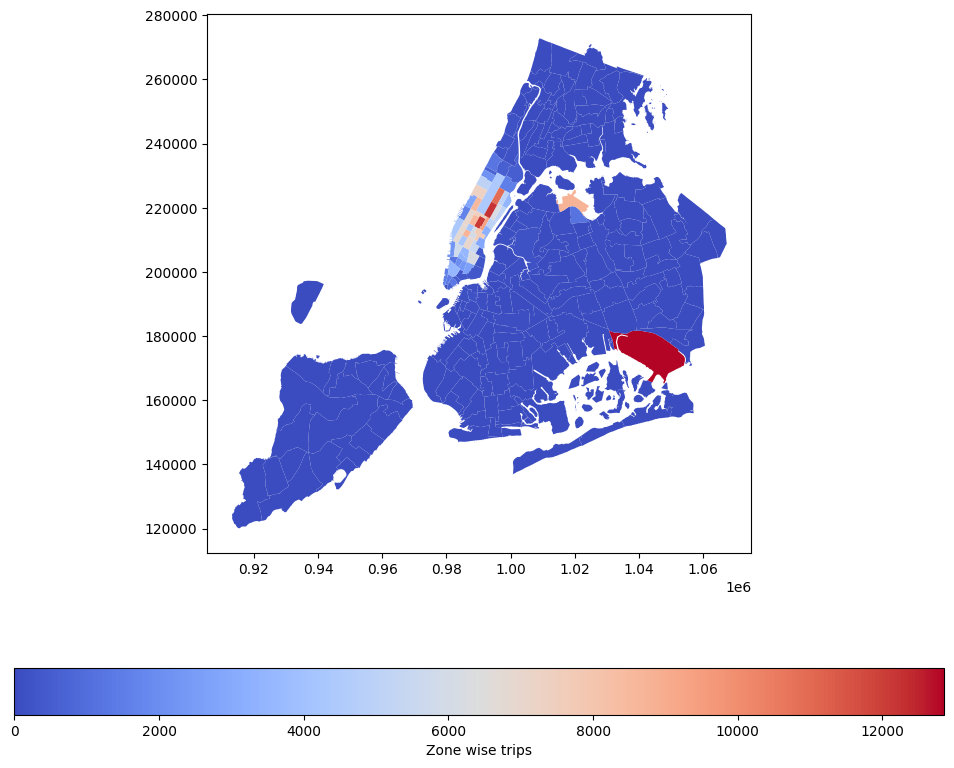

In [207]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'PU_counts',
ax = ax,
legend = True,
cmap="coolwarm",
legend_kwds = {'label': "Zone wise trips", 'orientation': "horizontal"})
plt.show()

In [208]:
# can you try displaying the zones DF sorted by the number of trips?

In [209]:
zones_sorted = zones.sort_values(by='PU_counts', ascending=False)

In [210]:
zones_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough  PU_counts                                           geometry  
131     Queens    12856.0  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
236  Manhattan    12217.0  POLYGON ((993633.442 216961.016, 993507.232 21...  
160  Manhattan    12091.0  POLYGON ((991081.026 214453.698, 990952.644 21...  
235  Manhattan    10941.0  POLYGON ((995940.048 221122.92, 995812.322 220...  
161  Manhattan     9296.0  POLYGON ((992224.354 214415.293, 992096.999 21...

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

> 1. **Temporal Trends**
>> - <span style="color: blue;">The number of trips are peaked between **5 PM - 7 PM**, it could be assumed that people are using taxi for commuting from office to home. It can be the base of recommendation for taxi companies to **dispatch higher number of taxis during peak hours (5PM - 7PM)**.</span>
>> - <span style="color: blue;">The number of trips are more for **evening and morning**, it is clear that people are using taxi for **commuting from home to office and vice-versa**. Taxi companies must **dispatch higher number of taxies for Evening and Morning**. </span>
>> - <span style="color: blue;">Taxi trips are **peaked on Thursday** and distributed almost **evenly on other weekdays except Monday**, and also lower on **Monday and Sunday**. It's understandable that people are **commuting less on Monday and Sunday** and primarily use taxi for commuting to/from offices.</span>
>> - <span style="color: blue;">From the number of trips over month, we can see that the total trips are **fluctuating monthly**. But still we can see that **more demand is there in month of May followed by October**, possibly due to the holiday & festival season.</span>
>
> 2. **Financial Trends**
>> - <span style="color: blue;">From the Monthly revenue trend, we can see that the **total revenue is fluctuating monthly**. But still we can see that **more revenue is generated in October month followed by May** when there are more number of trips.</span>
>> - <span style="color: blue;">From the Quarterly revenue trend, we can see that revenue is **almost equally segregated between all 4 Quarters**, but still **Q2 and Q4 are having slightly more revenue**.</span>
>
> 3. **Fare vs Trip**
>> - <span style="color: blue;">**trip_distance and fare_amount** - A correlation value of 0.94483 means there is a **strong positive correlation** between **trip_distance and fare_amount**. </span>
>> - <span style="color: blue;">**trip_duration and fare_amount** - A correlation value of 0.2905 means there is a **very weak correlation** between **trip_duration and fare_amount**. Trip duration is more but still the fare amount is less, this may be due to traffic the trip duration is more. </span>
>> - <span style="color: blue;">**passenger_count and fare_amount** - A correlation value of 0.0397 which is almost 0 means there is a **No correlation** between **passenger_count and fare_amount**, as taxi fares are typically calculated based on distance, time, surcharges, and other factors, not just the number of passengers. </span>
>> - <span style="color: blue;">**trip_distance and tip_amount** - A correlation value of 0.59256 means there is a **Moderate positive correlation** between **trip_distance and tip_amount**. </span>
>
> 4. **Payment Type**
>> - <span style="color: blue;">**Credit card** are most preferred payment options when using taxi services. It could be recommended that taxi companies could leverage this by partnering with credit card companies, and reward their customers for using taxi services.</span>
>
> 5. **Busiest Zones**
>> - <span style="color: blue;">The top pickup or busiest zones are **JFK Airport, Upper East Side South, Midtown Center, Upper East Side North, Midtown East**.</span>

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

#### <span style="color: blue;">Slow routes to get from one zone to another</span>

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [211]:
# Find routes which have the slowest speeds at different times of the day

In [212]:
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                  N   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                  N   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                  N   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                  N   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                  Y   

   RatecodeID  passenger_count  trip_distance  PULocationID PU_borough  \
0           1                1           7.74           138     Queens   
1           1                2           1.24           161  Manhattan   
2           1                3           1.44           237  Manhattan   
3           1                1           0.54           143  Manhattan   
4           1                1          19.24            66   Brooklyn   

                 PU_zone  DOLocationID DO_borough                    DO_zone  \
0      LaGuardia Airport           256   Brooklyn  Williamsburg (South Side)   
1         Midtown Center           237  Manhattan      Upper East Side South   
2  Upper East Side South           141  Manhattan            Lenox Hill West   
3    Lincoln Square West           142  Manhattan        Lincoln Square East   
4     DUMBO/Vinegar Hill           107  Manhattan                   Gramercy   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
4                    1.0         35.57                   0.0         0.00

In [213]:
#finding trip_duration in mins
df_merged['trip_duration'] = (df_merged['tpep_dropoff_datetime'] - df_merged['tpep_pickup_datetime']).dt.seconds/60

In [214]:
#finding pickup hour 
df_merged['pickup_hour']=df_merged['tpep_pickup_datetime'].dt.hour

In [215]:
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                  N   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                  N   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                  N   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                  N   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00                  Y   

   RatecodeID  passenger_count  trip_distance  PULocationID PU_borough  \
0           1                1           7.74           138     Queens   
1           1                2           1.24           161  Manhattan   
2           1                3           1.44           237  Manhattan   
3           1                1           0.54           143  Manhattan   
4           1                1          19.24            66   Brooklyn   

                 PU_zone  DOLocationID DO_borough                    DO_zone  \
0      LaGuardia Airport           256   Brooklyn  Williamsburg (South Side)   
1         Midtown Center           237  Manhattan      Upper East Side South   
2  Upper East Side South           141  Manhattan            Lenox Hill West   
3    Lincoln Square West           142  Manhattan        Lincoln Square East   
4     DUMBO/Vinegar Hill           107  Manhattan                   Gramercy   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             1        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   0.0         0.00   

   trip_duration  pickup_hour  
0      15.950000            0  
1       5.083333            0  
2      10.550000            0  
3       5.416667            0  
4      18.000000            0

In [216]:
# Group by picup and drop route and hour, and calculate average trip duration
route_by_hours = df_merged.groupby(['PU_zone', 'DO_zone', 'pickup_hour']).agg(avg_trip_duration=('trip_duration', 'mean'), route_distance=('trip_distance', 'mean')).reset_index()

In [217]:
route_by_hours.head()

PU_zone                            DO_zone  pickup_hour  \
0  Allerton/Pelham Gardens            Allerton/Pelham Gardens           19   
1  Allerton/Pelham Gardens  East New York/Pennsylvania Avenue           16   
2  Allerton/Pelham Gardens                           Longwood           13   
3  Allerton/Pelham Gardens                 Morrisania/Melrose           13   
4  Allerton/Pelham Gardens       Penn Station/Madison Sq West           10   

   avg_trip_duration  route_distance  
0          22.683333             0.2  
1          71.383333            17.4  
2          21.200000             5.2  
3          51.516667             3.9  
4          51.500000            15.3

In [218]:
#Converting pickup duration in hours
route_by_hours['avg_trip_duration'] = route_by_hours['avg_trip_duration']/60

In [219]:
route_by_hours.head()

PU_zone                            DO_zone  pickup_hour  \
0  Allerton/Pelham Gardens            Allerton/Pelham Gardens           19   
1  Allerton/Pelham Gardens  East New York/Pennsylvania Avenue           16   
2  Allerton/Pelham Gardens                           Longwood           13   
3  Allerton/Pelham Gardens                 Morrisania/Melrose           13   
4  Allerton/Pelham Gardens       Penn Station/Madison Sq West           10   

   avg_trip_duration  route_distance  
0           0.378056             0.2  
1           1.189722            17.4  
2           0.353333             5.2  
3           0.858611             3.9  
4           0.858333            15.3

In [220]:
#Calculating speed miles per hour
route_by_hours['speed_mph'] = route_by_hours['route_distance']/route_by_hours['avg_trip_duration']

In [221]:
route_by_hours.head()

PU_zone                            DO_zone  pickup_hour  \
0  Allerton/Pelham Gardens            Allerton/Pelham Gardens           19   
1  Allerton/Pelham Gardens  East New York/Pennsylvania Avenue           16   
2  Allerton/Pelham Gardens                           Longwood           13   
3  Allerton/Pelham Gardens                 Morrisania/Melrose           13   
4  Allerton/Pelham Gardens       Penn Station/Madison Sq West           10   

   avg_trip_duration  route_distance  speed_mph  
0           0.378056             0.2   0.529023  
1           1.189722            17.4  14.625263  
2           0.353333             5.2  14.716981  
3           0.858611             3.9   4.542219  
4           0.858333            15.3  17.825243

In [222]:
#finding slow routes for one zone to another zone
route_by_hours[route_by_hours['PU_zone'] != route_by_hours['DO_zone']].sort_values(by='speed_mph').head(20)

PU_zone                            DO_zone  \
58287                       Woodside                    Jackson Heights   
43338                        Seaport            Two Bridges/Seward Park   
16993        Greenwich Village North  University Heights/Morris Heights   
5282                    Clinton West                       Central Park   
38268                  Midtown South                   Garment District   
12016       Financial District South                Little Italy/NoLiTa   
45307  Sutton Place/Turtle Bay North                           Kips Bay   
44428     Spuyten Duyvil/Kingsbridge              Upper East Side North   
35765                   Midtown East            Greenwich Village South   
44855                      Sunnyside     Long Island City/Hunters Point   
51096                       Union Sq          Williamsburg (South Side)   
48508           TriBeCa/Civic Center                     West Concourse   
15485                       Gramercy      Meatpacking/West Village West   
44028                           SoHo      Sutton Place/Turtle Bay North   
15286                       Gramercy                           Kips Bay   
4481                    Clinton East     Long Island City/Hunters Point   
44998  Sutton Place/Turtle Bay North                     Central Harlem   
57101                   West Village                  East Williamsburg   
2463            Central Harlem North               Flatbush/Ditmas Park   
40066                    Murray Hill           Financial District North   

       pickup_hour  avg_trip_duration  route_distance  speed_mph  
58287           17          23.560556            0.96   0.040746  
43338           13          23.864722            1.04   0.043579  
16993           22           5.820556            0.28   0.048105  
5282             8          23.855556            1.42   0.059525  
38268           21          11.647222            0.79   0.067827  
12016            0          23.757778            1.78   0.074923  
45307            2          23.904167            1.94   0.081157  
44428           11           1.032222            0.10   0.096878  
35765           11          23.300556            2.91   0.124890  
44855           18           9.165000            1.20   0.130933  
51096           18          23.754167            3.22   0.135555  
48508           15           0.979167            0.14   0.142979  
15485           19          12.013194            1.74   0.144841  
44028            0          23.987500            3.76   0.156748  
15286            0           4.042685            0.66   0.163258  
4481            16          23.938889            4.05   0.169181  
44998           17          23.801389            4.16   0.174780  
57101           20          23.710556            4.64   0.195693  
2463            17           0.921667            0.20   0.216998  
40066            0          23.908611            5.24   0.219168

How does identifying high-traffic, high-demand routes help us?

> <span style="color: blue;">Identifying high-traffic, high-demand routes help us as below:</span>
> - Taxi companies can allocate **more vehicles** to these routes during **peak hours**.
> - Planning the traffic and **avoid congestion** on road.
> - Transport department can **increase public transport in high-demand routes** to avoid traffic.
> - People can **take alternative route if it is a high demand route** in peak hour.
> - High-demand routes can be targeted for **dynamic pricing strategies**, where fares are adjusted based on demand.
> - Drivers can be posted in high-demand areas instead of waiting in low-traffic areas.
> - In high demand areas, more focus can be given on **sharing rides**.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

#### <span style="color: blue;">Busiest hour and number of trips for that hour</span>

In [223]:
# Visualise the number of trips per hour and find the busiest hour

In [224]:
trip_per_hour = df_merged.groupby(df_merged['pickup_hour']).size()

In [225]:
trip_per_hour.reset_index()

pickup_hour      0
0             0   7154
1             1   4807
2             2   3122
3             3   2069
4             4   1374
5             5   1458
6             6   3496
7             7   6997
8             8   9704
9             9  11003
10           10  11928
11           11  12924
12           12  14054
13           13  14495
14           14  15539
15           15  15898
16           16  15920
17           17  17266
18           18  18104
19           19  16209
20           20  14467
21           21  14406
22           22  13330
23           23  10507

<Axes: xlabel='pickup_hour', ylabel='count'>

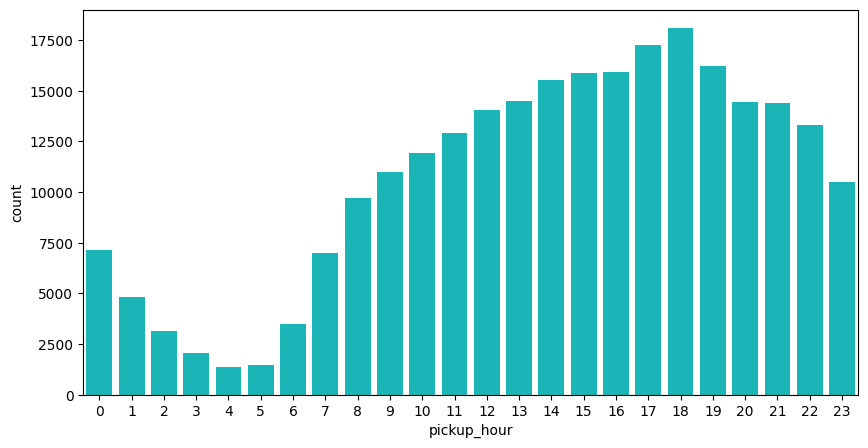

In [226]:
# creating plot to visualise number of trips per hour
plt.figure(figsize=(10,5))
sns.countplot(data=df_merged, x='pickup_hour', palette=['#00CED1'])

In [227]:
#finding busiest hour
busiest_hour=trip_per_hour.idxmax()
busiest_hour

18

In [228]:
#Finding the count of trips for busiest hour
busiest_hour_count = trip_per_hour.max()
busiest_hour_count

18104

In [229]:
print(f"Busiest Hour: {busiest_hour} with {busiest_hour_count} trips.")

Busiest Hour: 18 with 18104 trips.


> <span style="color: blue;">The **busiest hour is 18 with 18104 trips**. </span>

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [230]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.007

In [231]:
# Count trips per hour
hourly_counts = df_merged["pickup_hour"].value_counts().reset_index()
hourly_counts.columns = ["hour", "sampled_trips"]

In [232]:
# Find the top 5 busiest hours
top_hours = hourly_counts.nlargest(5, "sampled_trips")

In [233]:
# Scale up the trip counts using the sampling fraction
top_hours["actual_trips"] = top_hours["sampled_trips"] / sample_fraction

In [234]:
top_hours["actual_trips"] = top_hours["actual_trips"].astype(int)

In [235]:
top_hours

hour  sampled_trips  actual_trips
0    18          18104       2586285
1    17          17266       2466571
2    19          16209       2315571
3    16          15920       2274285
4    15          15898       2271142

In [236]:
# Print the results
print("Top 5 Busiest Hours with Scaled-Up Trip Counts:")
print(top_hours.sort_values("hour"))

Top 5 Busiest Hours with Scaled-Up Trip Counts:
   hour  sampled_trips  actual_trips
4    15          15898       2271142
3    16          15920       2274285
1    17          17266       2466571
0    18          18104       2586285
2    19          16209       2315571


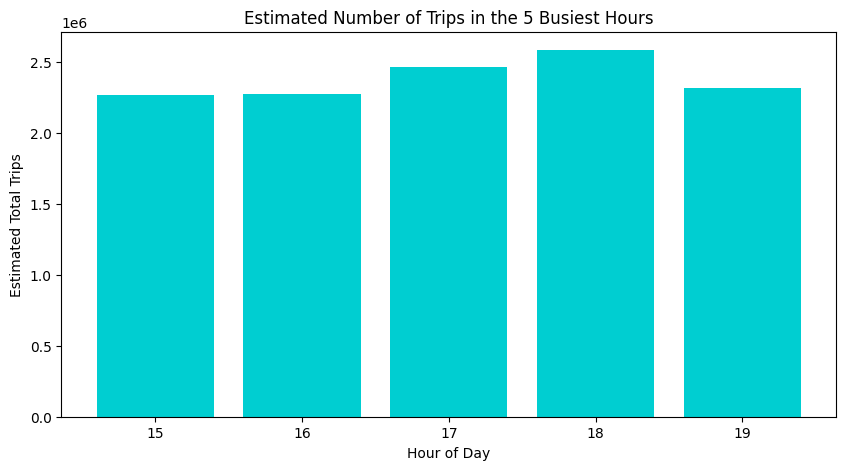

In [237]:
# Plot results
plt.figure(figsize=(10, 5))
plt.bar(top_hours["hour"], top_hours["actual_trips"], color="#00CED1")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Total Trips")
plt.title("Estimated Number of Trips in the 5 Busiest Hours")
plt.xticks(top_hours["hour"])
plt.show()

> <span style="color: blue;">Above representation shows **actual trips for 5 busiest hours** i.e. evening peak hours. The most **busiest hour 6 PM** has **approximately 2586286 actual trips** for year 2023.</span>

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

#### <span style="color: blue;">Hourly traffic pattern on weekdays and weekend</span>

In [238]:
# Compare traffic trends for the week days and weekends
df_merged['weekday'] = df_merged['tpep_pickup_datetime'].dt.weekday

In [239]:
df_merged

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00   
...          ...                  ...                   ...   
256226         2  2023-09-30 23:09:50   2023-09-30 23:25:31   
256227         1  2023-09-30 23:02:41   2023-09-30 23:19:28   
256228         1  2023-09-30 23:04:38   2023-09-30 23:15:39   
256229         2  2023-09-30 23:59:52   2023-10-01 00:45:20   
256230         2  2023-09-30 23:23:30   2023-09-30 23:33:41   

       store_and_fwd_flag  RatecodeID  passenger_count  trip_distance  \
0                       N           1                1           7.74   
1                       N           1                2           1.24   
2                       N           1                3           1.44   
3                       N           1                1           0.54   
4                       Y           1                1          19.24   
...                   ...         ...              ...            ...   
256226                  N           1                1           3.05   
256227                  N           1                1           3.40   
256228                  N           1                1           1.20   
256229                  N           1                1           7.06   
256230                  N           1                2           1.57   

        PULocationID PU_borough                    PU_zone  DOLocationID  \
0                138     Queens          LaGuardia Airport           256   
1                161  Manhattan             Midtown Center           237   
2                237  Manhattan      Upper East Side South           141   
3                143  Manhattan        Lincoln Square West           142   
4                 66   Brooklyn         DUMBO/Vinegar Hill           107   
...              ...        ...                        ...           ...   
256226           255   Brooklyn  Williamsburg (North Side)           148   
256227           107  Manhattan                   Gramercy           141   
256228           137  Manhattan                   Kips Bay           170   
256229            68  Manhattan               East Chelsea           129   
256230           148  Manhattan            Lower East Side            90   

       DO_borough                    DO_zone  payment_type  fare_amount  \
0        Brooklyn  Williamsburg (South Side)             2        32.40   
1       Manhattan      Upper East Side South             1         7.90   
2       Manhattan            Lenox Hill West             2        11.40   
3       Manhattan        Lincoln Square East             2         6.50   
4       Manhattan                   Gramercy             1        25.64   
...           ...                        ...           ...          ...   
256226  Manhattan            Lower East Side             1        18.40   
256227  Manhattan            Lenox Hill West             1        19.10   
256228  Manhattan                Murray Hill             1        10.00   
256229     Queens            Jackson Heights             1        44.30   
256230  Manhattan                   Flatiron             1        11.40   

        extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0         6.0      0.5        0.00           0.0                    1.0   
1         1.0      0.5        2.58           0.0                    1.0   
2         1.0      0.5        0.00           0.0                    1.0   
3         1.0      0.5        0.00           0.0                    1.0   
4         0.0      0.5        5.93           0.0                    1.0   
...       ...      ...         ...           ...                    ...   
256226    1.0      0.5        3.00 

In [240]:
#Dividing data in weekday and weekend
weekday_data = df_merged[df_merged['weekday'] < 5]
weekend_data = df_merged[df_merged['weekday'] >= 5]

In [241]:
trip_per_hour_weekday = weekday_data.groupby(weekday_data['pickup_hour']).size()

In [242]:
# Trips per hour on weekdays
trip_per_hour_weekday = trip_per_hour_weekday.reset_index(name='trip_count')

In [243]:
trip_per_hour_weekend = weekend_data.groupby(weekend_data['pickup_hour']).size()

In [244]:
# Trips per hour on weekend
trip_per_hour_weekend = trip_per_hour_weekend.reset_index(name='trip_count')

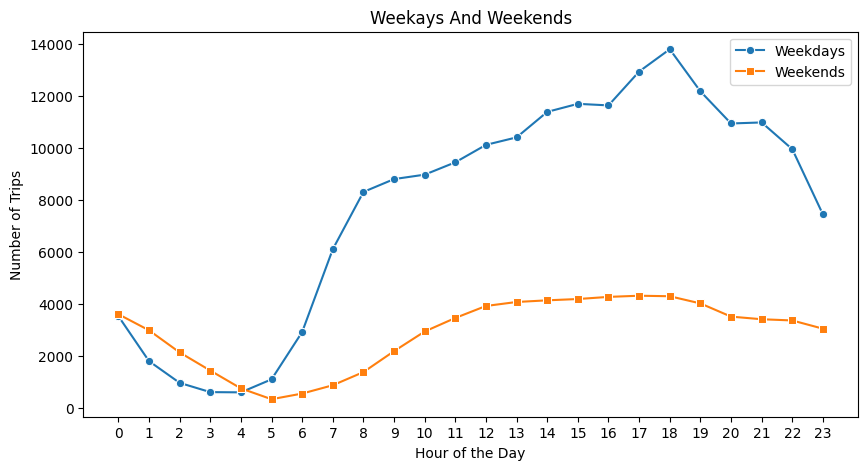

In [245]:
# creating plot to visualise number of trips per hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=trip_per_hour_weekday["pickup_hour"], y=trip_per_hour_weekday["trip_count"], label='Weekdays', marker='o')
sns.lineplot(x=trip_per_hour_weekend["pickup_hour"], y=trip_per_hour_weekend["trip_count"], label='Weekends', marker='s')
plt.title("Weekays And Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.legend()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

> <span style="color: blue;">From above patterns we can understand that:</span>
> - Whether it is **weekday or weekend** the **busiest hours for NYC taxis** are evening **5 PM to 6 PM**.
> - But if we see the **quiet hours for weekdays** they are from **2 AM to 5 AM** whereas the **quiet hours on weekend** are from **4 AM to 7 AM**.
> - **More drivers/taxis can be posted during peak hours** to handle the increased demand.
> - Which means on **weekday people start early from home might be to reach office** on time, whereas on **weekend** when there is no office people **start little late from homes**.
> - Also on **weekend** we can see that the taxis are used **till late night like till 2 AM**. So might be the reason of some weekend late night parties.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

#### <span style="color: blue;">Hourly trend for top 10 Pickup and Drop locations</span>

In [248]:
# Find top 10 pickup and dropoff zones

In [249]:
PU_counts = df_merged.groupby(['PU_zone', 'pickup_hour']).size().reset_index(name='pickup_count')

In [250]:
PU_counts

PU_zone  pickup_hour  pickup_count
0     Allerton/Pelham Gardens            4             1
1     Allerton/Pelham Gardens           10             1
2     Allerton/Pelham Gardens           13             2
3     Allerton/Pelham Gardens           14             1
4     Allerton/Pelham Gardens           16             1
...                       ...          ...           ...
3015           Yorkville West           19           314
3016           Yorkville West           20           274
3017           Yorkville West           21           271
3018           Yorkville West           22           225
3019           Yorkville West           23           158

[3020 rows x 3 columns]

In [251]:
top10_PU_zones = PU_counts.groupby('PU_zone')['pickup_count'].sum().nlargest(10)

<span style="color: blue;">Top 10 pick up zones</span>

In [252]:
top10_PU_zones

PU_zone
JFK Airport                     12856
Upper East Side South           12217
Midtown Center                  12091
Upper East Side North           10941
Midtown East                     9296
LaGuardia Airport                8778
Penn Station/Madison Sq West     8735
Times Sq/Theatre District        8565
Lincoln Square East              8496
Murray Hill                      7641
Name: pickup_count, dtype: int64

In [253]:
df_merged['drop_hour']=df_merged['tpep_dropoff_datetime'].dt.hour

In [254]:
DO_counts = df_merged.groupby(['DO_zone', 'drop_hour']).size().reset_index(name='drop_count')

In [255]:
DO_counts

DO_zone  drop_hour  drop_count
0     Allerton/Pelham Gardens          0           2
1     Allerton/Pelham Gardens          1           1
2     Allerton/Pelham Gardens          2           1
3     Allerton/Pelham Gardens          8           1
4     Allerton/Pelham Gardens         10           1
...                       ...        ...         ...
4665           Yorkville West         19         413
4666           Yorkville West         20         386
4667           Yorkville West         21         351
4668           Yorkville West         22         385
4669           Yorkville West         23         286

[4670 rows x 3 columns]

In [256]:
top10_DO_zones = DO_counts.groupby('DO_zone')['drop_count'].sum().nlargest(10)

<span style="color: blue;">Top 10 drop off zones</span>

In [257]:
top10_DO_zones

DO_zone
Upper East Side North        11657
Upper East Side South        10886
Midtown Center               10152
Times Sq/Theatre District     7884
Murray Hill                   7695
Midtown East                  7400
Lincoln Square East           7371
Upper West Side South         7277
Lenox Hill West               6748
East Chelsea                  6655
Name: drop_count, dtype: int64

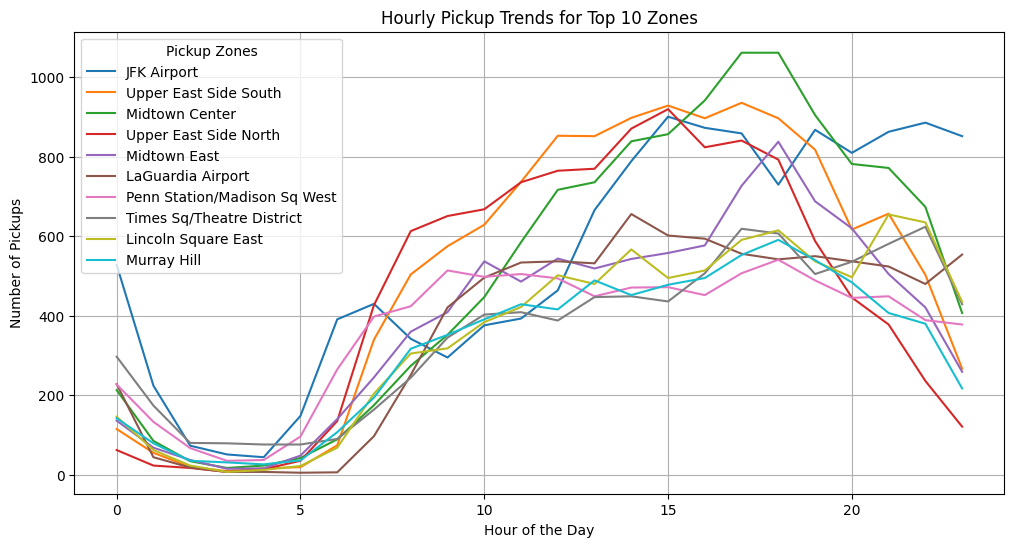

In [258]:
# Plot pickup trends for top 10 zones
plt.figure(figsize=(12, 6))
for zone in top10_PU_zones.index:
    df_PU_zone = PU_counts[PU_counts['PU_zone'] == zone]
    plt.plot(df_PU_zone['pickup_hour'], df_PU_zone['pickup_count'], label=zone)

plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zones')
plt.grid(True)
plt.show()

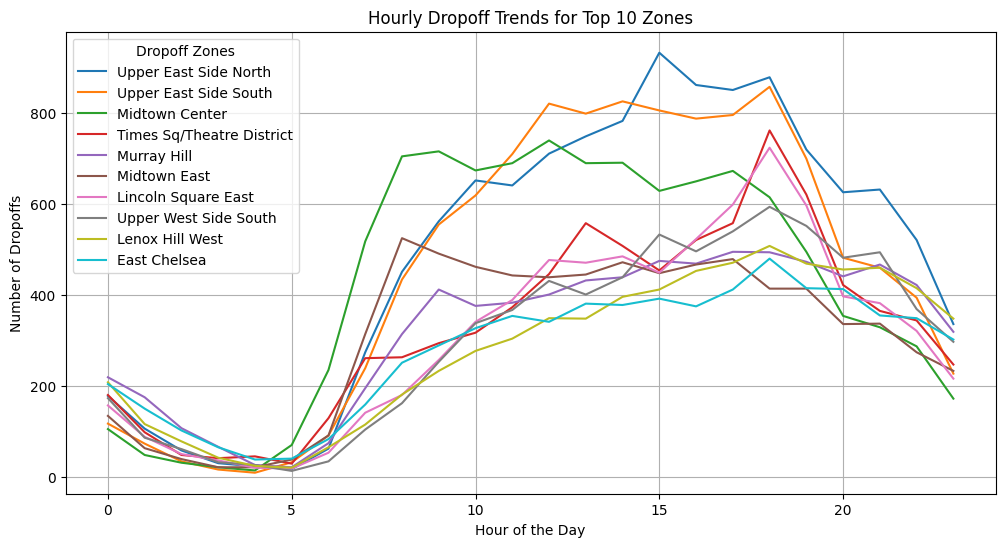

In [259]:
# Plot dropoff trends for top 10 zones
plt.figure(figsize=(12, 6))
for zone in top10_DO_zones.index:
    df_DO_zone = DO_counts[DO_counts['DO_zone'] == zone]
    plt.plot(df_DO_zone['drop_hour'], df_DO_zone['drop_count'], label=zone)

plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zones')
plt.grid(True)
plt.show()

<span style="color: blue;">From above representation, it is clear that in top 10 pickup/drop zones as well the **more number of trips are in the evening around 4 PM to 7 PM**.</span>

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

#### <span style="color: blue;">Finding top 10 and bottom 10 pickup/dropoff ratios</span>

In [260]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

In [261]:
# Calculate pickups and dropoffs per zone
pickup_counts = df_merged['PU_zone'].value_counts()
dropoff_counts = df_merged['DO_zone'].value_counts()

In [262]:
# Compute pickup/dropoff ratio
pickup_dropoff_ratio = pickup_counts / dropoff_counts

In [263]:
# Display the 10 highest and 10 lowest ratios
highest_ratios = pickup_dropoff_ratio.nlargest(10)
lowest_ratios = pickup_dropoff_ratio.nsmallest(10)

In [264]:
print("Top 10 Pickup/Dropoff Ratios:")
print(highest_ratios)
print("\nBottom 10 Pickup/Dropoff Ratios:")
print(lowest_ratios)

Top 10 Pickup/Dropoff Ratios:
East Elmhurst                   8.772727
JFK Airport                     4.463889
LaGuardia Airport               2.651964
Penn Station/Madison Sq West    1.495463
Central Park                    1.382012
West Village                    1.370292
Greenwich Village South         1.345684
Midtown East                    1.256216
Midtown Center                  1.190997
Garment District                1.185185
Name: count, dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
Newark Airport                         0.002674
Douglaston                             0.034483
Windsor Terrace                        0.035088
Whitestone                             0.037037
Queensboro Hill                        0.043478
Riverdale/North Riverdale/Fieldston    0.046512
Glen Oaks                              0.047619
Ridgewood                              0.052239
Ocean Parkway South                    0.052632
Glendale                               0.054545
Name: count, dtype

In [265]:
df_top = highest_ratios.reset_index()

In [266]:
gdf = zones.merge(df_top, left_on="zone", right_on="index", how="right")

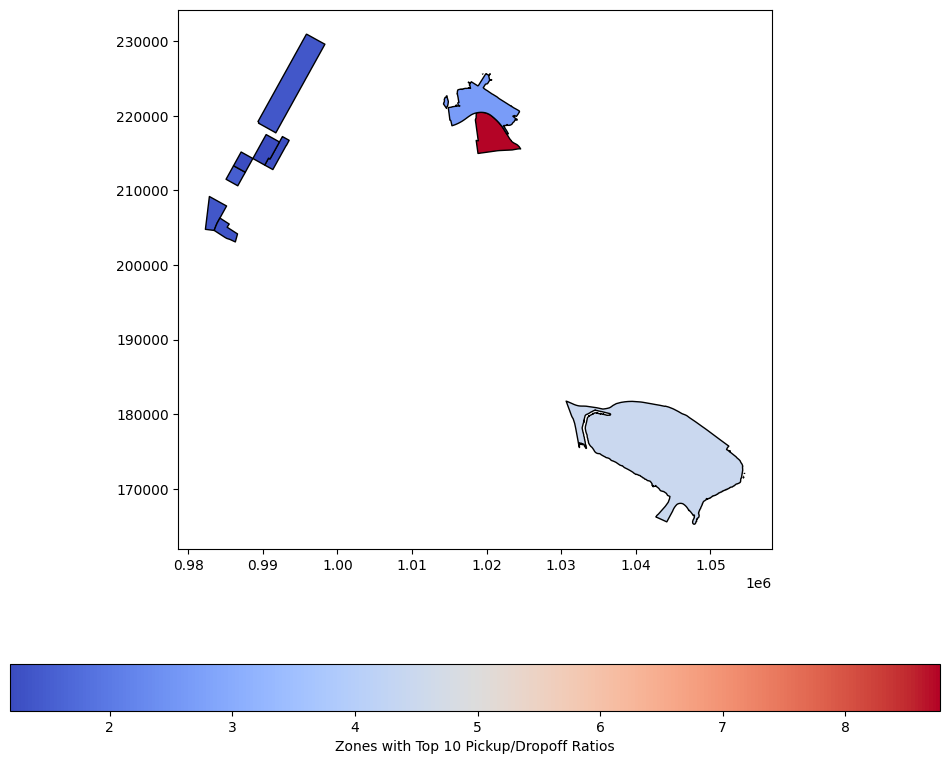

In [267]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map to display zones with Top 10 Pickup/Dropoff Ratios
gdf.plot(column = 'count',
ax = ax,
legend = True,
edgecolor="black",
cmap="coolwarm",
legend_kwds = {'label': "Zones with Top 10 Pickup/Dropoff Ratios", 'orientation': "horizontal"})
plt.show()

In [268]:
df_bottom = lowest_ratios.reset_index(name='bottom_count')

In [269]:
gdfb = zones.merge(df_bottom, left_on="zone", right_on="index", how="right")

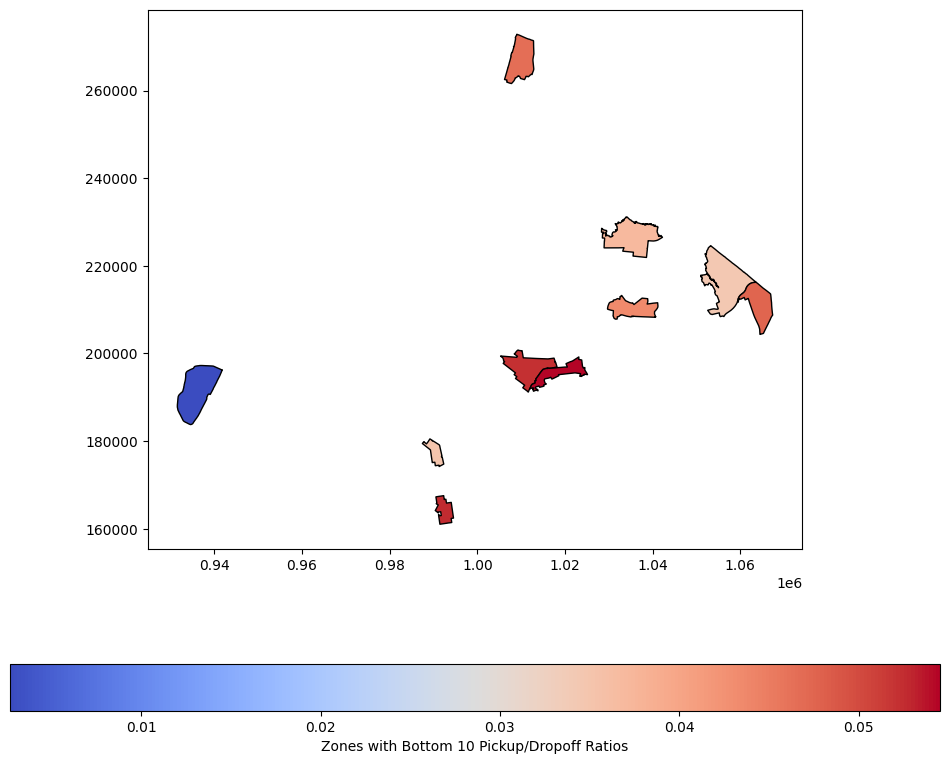

In [270]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map to display zones with Top 10 Pickup/Dropoff Ratios
gdfb.plot(column = 'bottom_count',
ax = ax,
legend = True,
edgecolor="black",
cmap="coolwarm",
legend_kwds = {'label': "Zones with Bottom 10 Pickup/Dropoff Ratios", 'orientation': "horizontal"})
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

#### <span style="color: blue;">Finding zones with high pickup and dropoff traffic during night hours (11PM to 5AM)</span>

In [271]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

In [272]:
# Creating Dataframe for night pickup hours (11pm to 5am)
df_night = df_merged[((df_merged['pickup_hour'] >=23) | (df_merged['pickup_hour'] <=5))]

In [273]:
# Finding top 10 night pickup zones
top10_night_PU_zones = df_night.groupby('PU_zone').size().nlargest(10)

In [274]:
# Finding top 10 night dropoff zones
top10_night_DO_zones = df_night.groupby('DO_zone').size().nlargest(10)

In [275]:
print("Top 10 Pickup zones during night hours:")
print(top10_night_PU_zones)
print("\nTop 10 Dropoff zones during night hours:")
print(top10_night_DO_zones)

Top 10 Pickup zones during night hours:
PU_zone
East Village                    2248
JFK Airport                     1920
West Village                    1815
Clinton East                    1453
Lower East Side                 1405
Times Sq/Theatre District       1211
Greenwich Village South         1203
Penn Station/Madison Sq West     973
Midtown South                    869
LaGuardia Airport                863
dtype: int64

Top 10 Dropoff zones during night hours:
DO_zone
East Village             1195
Clinton East             1003
Murray Hill               879
East Chelsea              844
Gramercy                  825
Lenox Hill West           770
Yorkville West            746
West Village              675
Upper East Side North     661
Flatiron                  641
dtype: int64


In [276]:
df_top_PU_zones_night = top10_night_PU_zones.reset_index(name='count_pickups')

In [277]:
gdf_top_PU_zones_night = zones.merge(df_top_PU_zones_night, left_on="zone", right_on="PU_zone", how="right")

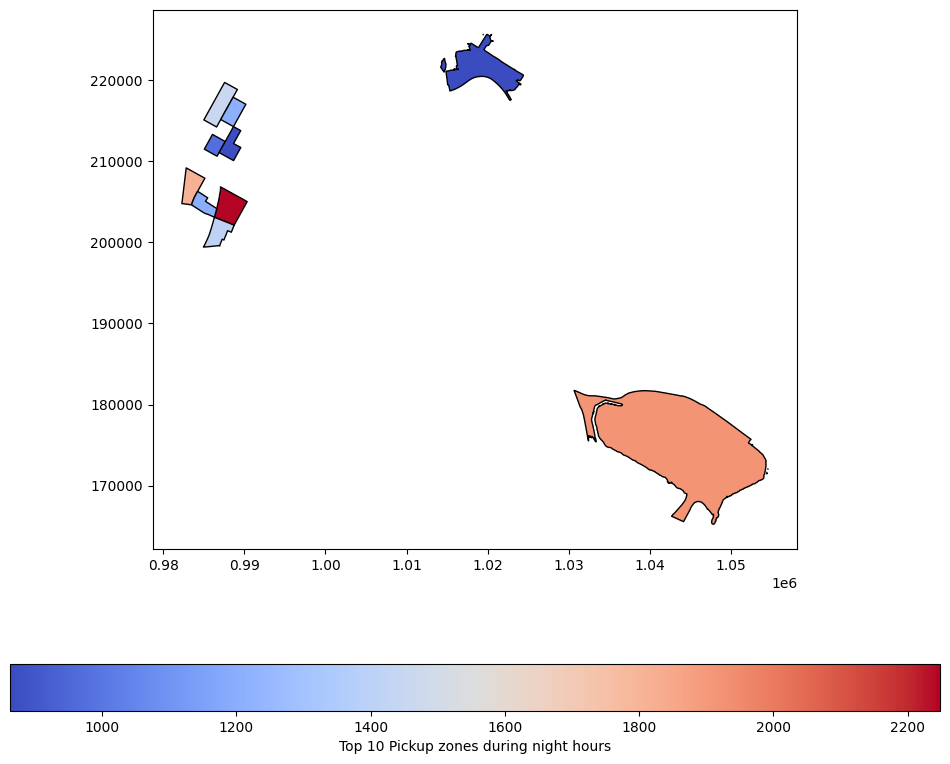

In [278]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map to display Top 10 Pickup zones during night hours
gdf_top_PU_zones_night.plot(column = 'count_pickups',
ax = ax,
legend = True,
edgecolor="black",
cmap="coolwarm",
legend_kwds = {'label': "Top 10 Pickup zones during night hours", 'orientation': "horizontal"})
plt.show()

In [279]:
df_top_DO_zones_night = top10_night_DO_zones.reset_index(name='count_dropoff')

In [280]:
gdf_top_DO_zones_night = zones.merge(df_top_DO_zones_night, left_on="zone", right_on="DO_zone", how="right")

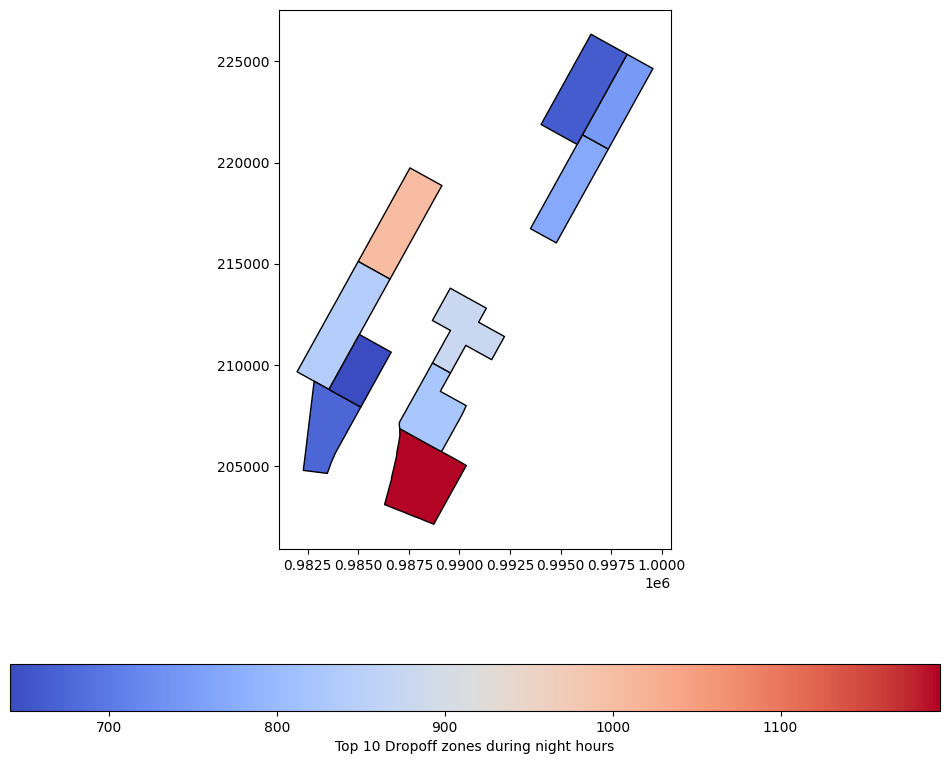

In [281]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map to display Top 10 Dropoff zones during night hours
gdf_top_DO_zones_night.plot(column = 'count_dropoff',
ax = ax,
legend = True,
edgecolor="black",
cmap="coolwarm",
legend_kwds = {'label': "Top 10 Dropoff zones during night hours", 'orientation': "horizontal"})
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

#### <span style="color: blue;">Revenue share for nighttime and daytime hours.</span>

In [282]:
# Filter for night hours (11 PM to 5 AM)

In [283]:
# Adding column as Daytime/Nighttime
df_merged['time_period'] = df_merged['pickup_hour'].apply(lambda x : 'Night' if x>=23 or x<5 else 'Day')

In [284]:
# Calculate total revenue for each period
revenue_share = df_merged.groupby('time_period')['fare_amount'].sum().reset_index(name='total_revenue')

In [285]:
revenue_share

time_period  total_revenue
0         Day     4398710.91
1       Night      562631.73

In [286]:
# Calculate percentage share
revenue_share['revenue_per'] = (revenue_share['total_revenue']/revenue_share['total_revenue'].sum())*100

In [287]:
revenue_share = revenue_share[['time_period','revenue_per']]

In [288]:
# Display results
print("Revenue Share by Time Period:\n" , revenue_share)

Revenue Share by Time Period:
   time_period  revenue_per
0         Day    88.659688
1       Night    11.340312


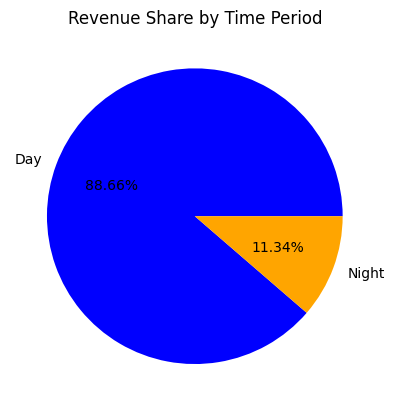

In [289]:
plt.pie(revenue_share['revenue_per'], labels=revenue_share['time_period'], autopct='%1.2f%%', colors=['blue', 'orange'])
plt.title("Revenue Share by Time Period")
plt.show()

> <span style="color: blue;">88.66% of the total revenue comes from daytime rides.</span>
>
> <span style="color: blue;">11.34% of the total revenue comes from daytime rides.</span>

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

#### <span style="color: blue;">Finding fare per mile per passenger for different passenger counts</span>

In [290]:
# Analyse the fare per mile per passenger for different passenger counts

In [291]:
#Adding new column to calculate fare per mile

In [292]:
df_merged['fare_per_mile'] = df_merged['fare_amount']/df_merged['trip_distance']

In [293]:
#finding fare per mile by passangers
fare_per_mile_by_passenger = df_merged.groupby('passenger_count')['fare_per_mile'].mean()

In [294]:
fare_per_mile_by_passenger

passenger_count
1     9.821283
2    11.969216
3    11.545260
4    15.832804
5     7.807987
6     7.694677
Name: fare_per_mile, dtype: float64

In [295]:
#finding fare per mile per pessanger
fare_per_mile_per_passenger = fare_per_mile_by_passenger / fare_per_mile_by_passenger.index

In [296]:
fare_per_mile_per_passenger

passenger_count
1    9.821283
2    5.984608
3    3.848420
4    3.958201
5    1.561597
6    1.282446
dtype: float64

In [297]:
# Display the results
result = pd.DataFrame({'Avg Fare per Mile': fare_per_mile_by_passenger, 'Fare per Mile per Passenger': fare_per_mile_per_passenger})

In [298]:
print("Average Fare per Mile per Passenger Count:")
print(result)

Average Fare per Mile per Passenger Count:
                 Avg Fare per Mile  Fare per Mile per Passenger
passenger_count                                                
1                         9.821283                     9.821283
2                        11.969216                     5.984608
3                        11.545260                     3.848420
4                        15.832804                     3.958201
5                         7.807987                     1.561597
6                         7.694677                     1.282446


In [299]:
df_result = result.reset_index()

In [300]:
df_result

passenger_count  Avg Fare per Mile  Fare per Mile per Passenger
0                1           9.821283                     9.821283
1                2          11.969216                     5.984608
2                3          11.545260                     3.848420
3                4          15.832804                     3.958201
4                5           7.807987                     1.561597
5                6           7.694677                     1.282446

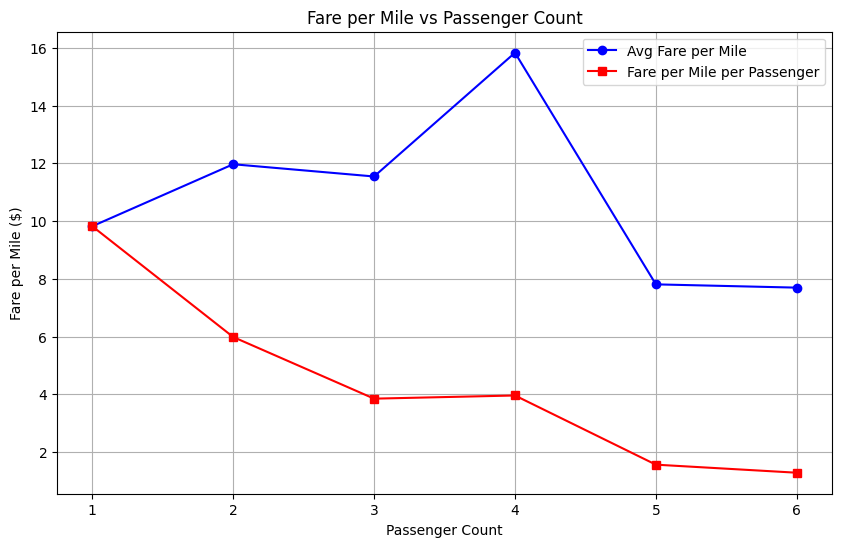

In [301]:
# Plot Average Fare per Mile per Passenger Count
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_result["passenger_count"], df_result["Avg Fare per Mile"], marker="o", label="Avg Fare per Mile", color="blue")
ax.plot(df_result["passenger_count"], df_result["Fare per Mile per Passenger"], marker="s", label="Fare per Mile per Passenger", color="red")

# Labels and title
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile ($)")
plt.title("Fare per Mile vs Passenger Count")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

> <span style="color: blue;">Higher passenger counts tend to reduce fare per mile per passenger since the cost is shared.</span>
>
> <span style="color: blue;">Larger groups may pay a higher total fare but have lower per-passenger costs.</span>

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

#### <span style="color: blue;">Average fare per mile by hours of the day and by days of the week</span>

In [302]:
# Compare the average fare per mile for different days and for different times of the day

In [303]:
#finding fare per mile by day 
fare_per_mile_by_day = df_merged.groupby('weekday')['fare_per_mile'].mean().reset_index()

In [304]:
fare_per_mile_by_day['weekday'] = fare_per_mile_by_day['weekday'].astype(int)

In [305]:
# Adding new column Weekday name

In [306]:
fare_per_mile_by_day['weekday_name'] = fare_per_mile_by_day['weekday'].apply(lambda x: calendar.day_name[x])

In [307]:
# Resetting DF to keep only day name and fare per mile
fare_per_mile_by_day = fare_per_mile_by_day[['weekday_name','fare_per_mile']]

In [308]:
fare_per_mile_by_day

weekday_name  fare_per_mile
0       Monday       9.792145
1      Tuesday      10.113649
2    Wednesday      10.672283
3     Thursday      11.698982
4       Friday       9.478369
5     Saturday       9.924759
6       Sunday      10.035010

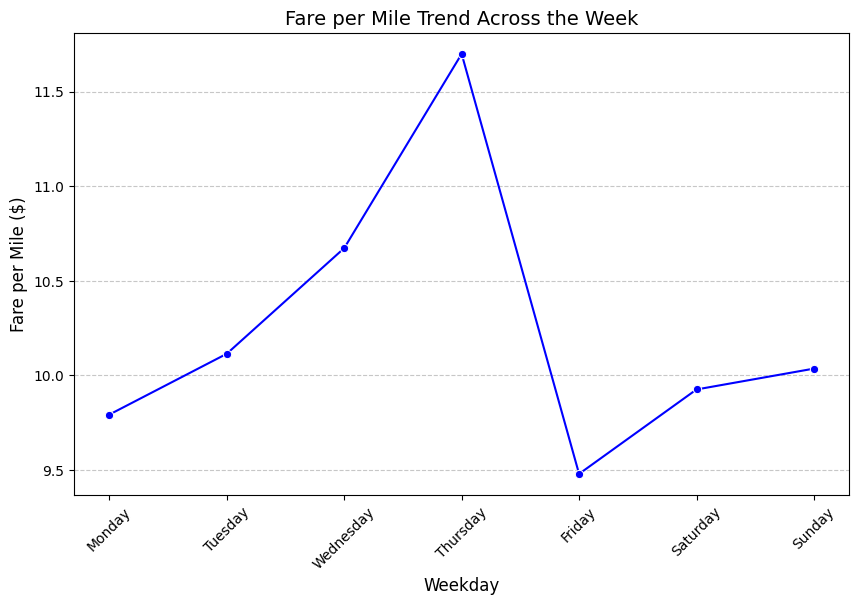

In [309]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="weekday_name", y="fare_per_mile", data=fare_per_mile_by_day, marker="o", color="blue")

plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Fare per Mile ($)", fontsize=12)
plt.title("Fare per Mile Trend Across the Week", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [310]:
#finding fare per mile by hours 
fare_per_mile_by_hours = df_merged.groupby('pickup_hour')['fare_per_mile'].mean()

In [311]:
fare_per_mile_by_hours

pickup_hour
0     11.873945
1     11.700330
2      8.339370
3      8.813538
4      6.401521
5     10.632823
6      8.198518
7      8.654244
8      9.497686
9      9.618096
10    10.153223
11     9.559078
12    11.408901
13    12.703466
14    10.947986
15    10.033705
16    12.465779
17    10.963274
18     9.737388
19    10.551533
20     8.403515
21     8.652583
22    10.044858
23     9.732797
Name: fare_per_mile, dtype: float64

In [312]:
fare_per_mile_by_hours = fare_per_mile_by_hours.reset_index()

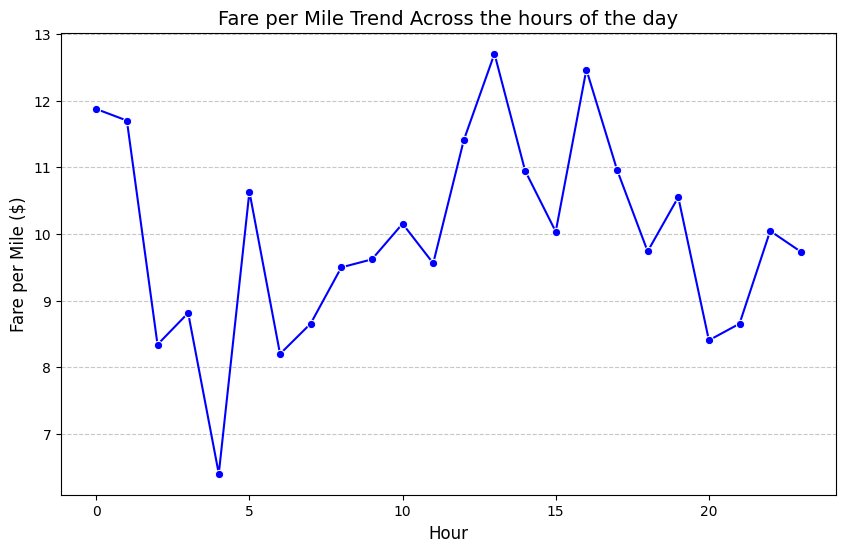

In [313]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="pickup_hour", y="fare_per_mile", data=fare_per_mile_by_hours, marker="o", color="blue")

plt.xlabel("Hour", fontsize=12)
plt.ylabel("Fare per Mile ($)", fontsize=12)
plt.title("Fare per Mile Trend Across the hours of the day", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [314]:
print("Average fare per mile by hours of the day : ")
print(fare_per_mile_by_hours)
print("\nAverage fare per mile by days of the week")
print(fare_per_mile_by_day)

Average fare per mile by hours of the day : 
    pickup_hour  fare_per_mile
0             0      11.873945
1             1      11.700330
2             2       8.339370
3             3       8.813538
4             4       6.401521
5             5      10.632823
6             6       8.198518
7             7       8.654244
8             8       9.497686
9             9       9.618096
10           10      10.153223
11           11       9.559078
12           12      11.408901
13           13      12.703466
14           14      10.947986
15           15      10.033705
16           16      12.465779
17           17      10.963274
18           18       9.737388
19           19      10.551533
20           20       8.403515
21           21       8.652583
22           22      10.044858
23           23       9.732797

Average fare per mile by days of the week
  weekday_name  fare_per_mile
0       Monday       9.792145
1      Tuesday      10.113649
2    Wednesday      10.672283
3     Thursday   

> <span style="color: blue;">**Hourly Trends:** The fare per mile varies based on demand and time of day.</span>
>
> <span style="color: blue;">**Weekday Trends:** Different days may have different pricing trends due to demand changes.</span>
>
> <span style="color: blue;">**Peak Pricing:** Higher fare per mile may indicate peak-hour pricing or lower trip distances.</span>

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

#### <span style="color: blue;">Average fare per mile for the different vendors for different hours of the day</span>

In [315]:
# Compare fare per mile for different vendors

In [316]:
fare_per_mile_by_vendor_per_hour = df_merged.groupby(['VendorID','pickup_hour'])['fare_per_mile'].mean()

In [317]:
fare_per_mile_by_vendor_per_hour

VendorID  pickup_hour
1         0               6.619569
          1               7.192365
          2               7.194927
          3               6.343477
          4               6.095796
          5               6.785279
          6               6.547373
          7               7.250449
          8               8.216948
          9               8.110949
          10              8.132626
          11              8.591834
          12              8.770507
          13              8.461315
          14              8.687514
          15              8.640742
          16              8.736436
          17              8.585565
          18              8.378821
          19              8.136856
          20              7.338936
          21              7.145201
          22              6.952427
          23              6.741121
2         0              13.391286
          1              12.913006
          2               8.671963
          3               9.52168

In [318]:
#getting the above output vendor wise
df_vendor1 = fare_per_mile_by_vendor_per_hour.xs(1, level='VendorID')
df_vendor2 = fare_per_mile_by_vendor_per_hour.xs(2, level='VendorID')

In [319]:
print("Average fare per mile for Vendor 1= Creative Mobile Technologies, LLC. by different hours of the day : ")
print(df_vendor1)
print("\nAverage fare per mile for Vendor 2= VeriFone Inc. by different hours of the day :")
print(df_vendor2)

Average fare per mile for Vendor 1= Creative Mobile Technologies, LLC. by different hours of the day : 
pickup_hour
0     6.619569
1     7.192365
2     7.194927
3     6.343477
4     6.095796
5     6.785279
6     6.547373
7     7.250449
8     8.216948
9     8.110949
10    8.132626
11    8.591834
12    8.770507
13    8.461315
14    8.687514
15    8.640742
16    8.736436
17    8.585565
18    8.378821
19    8.136856
20    7.338936
21    7.145201
22    6.952427
23    6.741121
Name: fare_per_mile, dtype: float64

Average fare per mile for Vendor 2= VeriFone Inc. by different hours of the day :
pickup_hour
0     13.391286
1     12.913006
2      8.671963
3      9.521684
4      6.489854
5     12.174058
6      8.857259
7      9.246862
8     10.001082
9     10.195567
10    10.959139
11     9.933683
12    12.391599
13    14.379504
14    11.789101
15    10.543098
16    13.857286
17    11.834498
18    10.206259
19    11.347906
20     8.748276
21     9.120939
22    10.953408
23    10.611293
Name: far

In [320]:
df_vendor1 = df_vendor1.reset_index()

In [321]:
df_vendor2 = df_vendor2.reset_index()

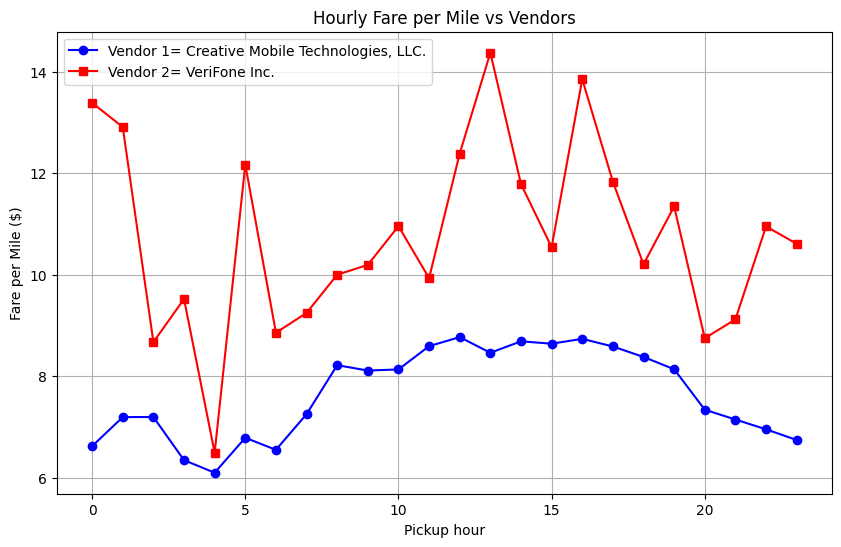

In [322]:
# Plot hourly Fare per Mile per vendor
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vendor1["pickup_hour"], df_vendor1["fare_per_mile"], marker="o", label="Vendor 1= Creative Mobile Technologies, LLC.", color="blue")
ax.plot(df_vendor2["pickup_hour"], df_vendor2["fare_per_mile"], marker="s", label="Vendor 2= VeriFone Inc.", color="red")

# Labels and title
plt.xlabel("Pickup hour")
plt.ylabel("Fare per Mile ($)")
plt.title("Hourly Fare per Mile vs Vendors")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

> <span style="color: blue;">Hourly fares seem to be fairly stable for Vendor 1 but fluctuating for Vendor 2.</span>
>
> <span style="color: blue;">Vendor 1 has cheaper fares compared to Vendor 2.</span>

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


#### <span style="color: blue;">Fare rates of the different vendors in a tiered fashion</span>

In [323]:
# Defining distance tiers

In [324]:
def f_dist(x):
    if x<=2:
        return 'upto 2 miles'
    elif (x > 2) and (x <= 5):
        return '2 to 5 miles'
    else:
        return'more than 5 miles'

In [325]:
#Adding dist_tier Column
df_merged['dist_tier'] = df_merged['trip_distance'].apply(f_dist)

In [326]:
fare_per_mile_by_vendor_per_dist_tier = df_merged.groupby(['VendorID','dist_tier'])['fare_per_mile'].mean()

In [327]:
fare_per_mile_by_vendor_per_dist_tier

VendorID  dist_tier        
1         2 to 5 miles          6.381453
          more than 5 miles     4.397061
          upto 2 miles          9.744970
2         2 to 5 miles          6.525907
          more than 5 miles     4.470033
          upto 2 miles         15.615561
Name: fare_per_mile, dtype: float64

In [328]:
#getting the above output vendor wise
df_vendor1_dist_tier = fare_per_mile_by_vendor_per_dist_tier.xs(1, level='VendorID')
df_vendor2_dist_tier = fare_per_mile_by_vendor_per_dist_tier.xs(2, level='VendorID')

In [329]:
print("Average fare per mile for Vendor 1= Creative Mobile Technologies, LLC. by different distance tiers : ")
print(df_vendor1_dist_tier)
print("\nAverage fare per mile for Vendor 2= VeriFone Inc. by different distance tiers :")
print(df_vendor2_dist_tier)

Average fare per mile for Vendor 1= Creative Mobile Technologies, LLC. by different distance tiers : 
dist_tier
2 to 5 miles         6.381453
more than 5 miles    4.397061
upto 2 miles         9.744970
Name: fare_per_mile, dtype: float64

Average fare per mile for Vendor 2= VeriFone Inc. by different distance tiers :
dist_tier
2 to 5 miles          6.525907
more than 5 miles     4.470033
upto 2 miles         15.615561
Name: fare_per_mile, dtype: float64


In [330]:
df_vendor1_dist_tier = df_vendor1_dist_tier.reset_index()

In [331]:
df_vendor2_dist_tier = df_vendor2_dist_tier.reset_index()

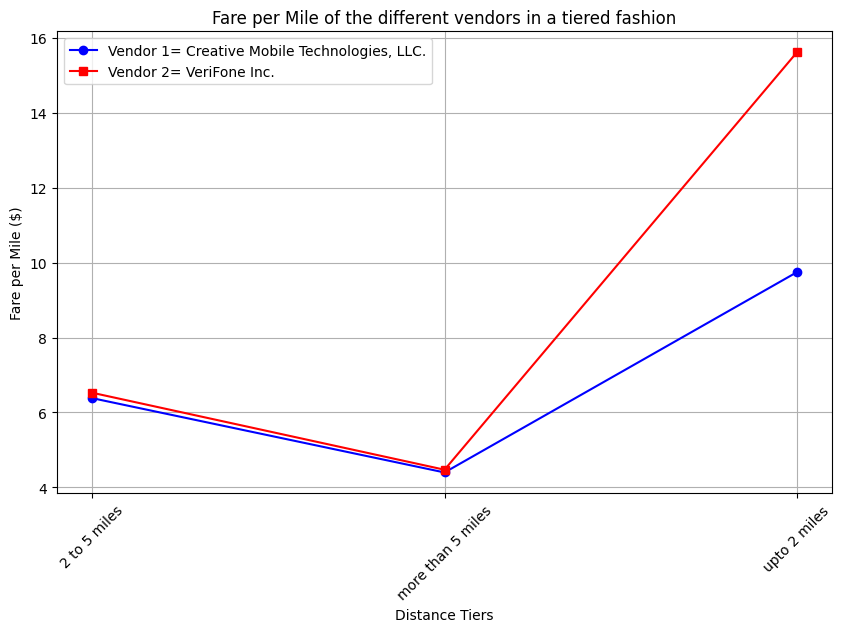

In [332]:
# Plot Fare per Mile of the different vendors in a tiered fashion
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vendor1_dist_tier["dist_tier"], df_vendor1_dist_tier["fare_per_mile"], marker="o", label="Vendor 1= Creative Mobile Technologies, LLC.", color="blue")
ax.plot(df_vendor2_dist_tier["dist_tier"], df_vendor2_dist_tier["fare_per_mile"], marker="s", label="Vendor 2= VeriFone Inc.", color="red")

# Labels and title
plt.xlabel("Distance Tiers")
plt.ylabel("Fare per Mile ($)")
plt.title("Fare per Mile of the different vendors in a tiered fashion")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

> <span style="color: blue;">Vendor 2 is expensive than Vendor 1 for short distance trip.</span>
>
> <span style="color: blue;">Both vendors charge higher rates for short (upto 2 miles) trips, with Vendor 2 more expensive.</span>

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

#### <span style="color: blue;">Average tip percentages based on trip distances, passenger counts and time of pickup. </span>

In [333]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

In [334]:
df_merged['tip_percentage'] = (df_merged['tip_amount'] / df_merged['fare_amount']) * 100

In [335]:
# Group by distance category to get average tip percentage
tip_by_distance = df_merged.groupby('dist_tier')['tip_percentage'].mean()

In [336]:
# Group by passenger count to get average tip percentage
tip_by_passengers = df_merged.groupby('passenger_count')['tip_percentage'].mean()

In [337]:
# Group by hour to get average tip percentage
tip_by_hour = df_merged.groupby('pickup_hour')['tip_percentage'].mean()

In [338]:
# Display results
print("Average Tip Percentage by Trip Distance:")
print(tip_by_distance)

print("\nAverage Tip Percentage by Passenger Count:")
print(tip_by_passengers)

print("\nAverage Tip Percentage by Time of Pickup (Hourly):")
print(tip_by_hour)

Average Tip Percentage by Trip Distance:
dist_tier
2 to 5 miles         18.597467
more than 5 miles    16.600789
upto 2 miles         22.437233
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_count
1    20.605253
2    19.767680
3    19.049197
4    17.559352
5    20.874505
6    20.792898
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup (Hourly):
pickup_hour
0     20.473947
1     21.120121
2     20.179663
3     20.473790
4     17.655922
5     17.130345
6     19.160918
7     19.429753
8     19.794579
9     19.525100
10    19.241637
11    19.099320
12    19.228356
13    18.918053
14    19.193875
15    18.879259
16    21.110299
17    21.625086
18    22.122929
19    22.084859
20    21.293574
21    21.481028
22    21.589758
23    20.400210
Name: tip_percentage, dtype: float64


In [339]:
tip_by_distance = tip_by_distance.reset_index()

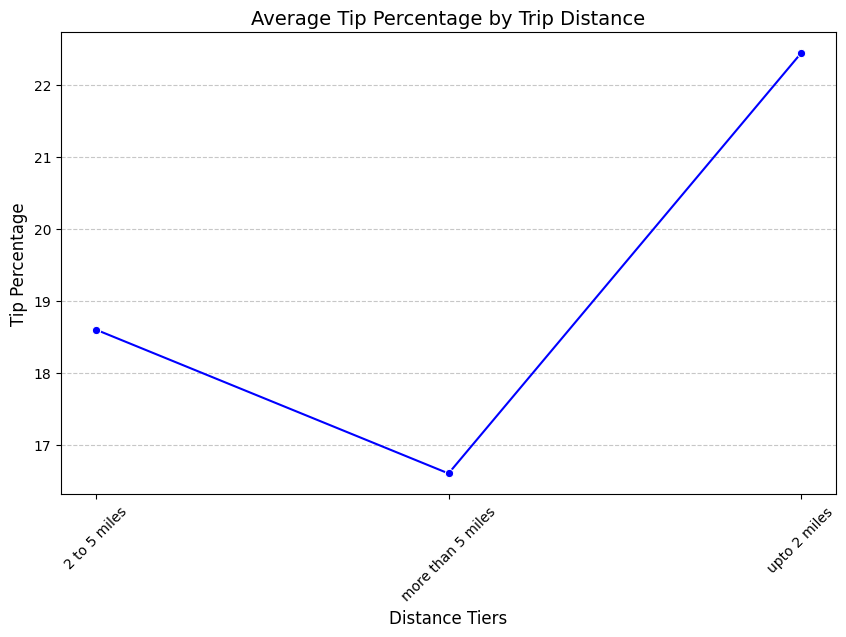

In [340]:
# Plot Average Tip Percentage by Trip Distance
plt.figure(figsize=(10, 6))
sns.lineplot(x="dist_tier", y="tip_percentage", data=tip_by_distance, marker="o", color="blue")

plt.xlabel("Distance Tiers", fontsize=12)
plt.ylabel("Tip Percentage", fontsize=12)
plt.title("Average Tip Percentage by Trip Distance", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [341]:
tip_by_passengers = tip_by_passengers.reset_index()

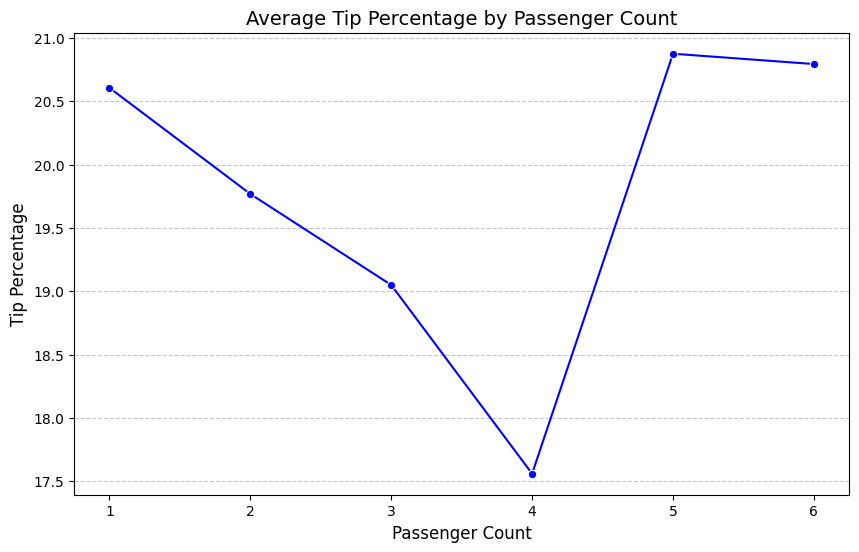

In [342]:
# Plot Average Tip Percentage by Passenger Count
plt.figure(figsize=(10, 6))
sns.lineplot(x="passenger_count", y="tip_percentage", data=tip_by_passengers, marker="o", color="blue")

plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Tip Percentage", fontsize=12)
plt.title("Average Tip Percentage by Passenger Count", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [343]:
tip_by_hour = tip_by_hour.reset_index()

In [344]:
tip_by_hour

pickup_hour  tip_percentage
0             0       20.473947
1             1       21.120121
2             2       20.179663
3             3       20.473790
4             4       17.655922
5             5       17.130345
6             6       19.160918
7             7       19.429753
8             8       19.794579
9             9       19.525100
10           10       19.241637
11           11       19.099320
12           12       19.228356
13           13       18.918053
14           14       19.193875
15           15       18.879259
16           16       21.110299
17           17       21.625086
18           18       22.122929
19           19       22.084859
20           20       21.293574
21           21       21.481028
22           22       21.589758
23           23       20.400210

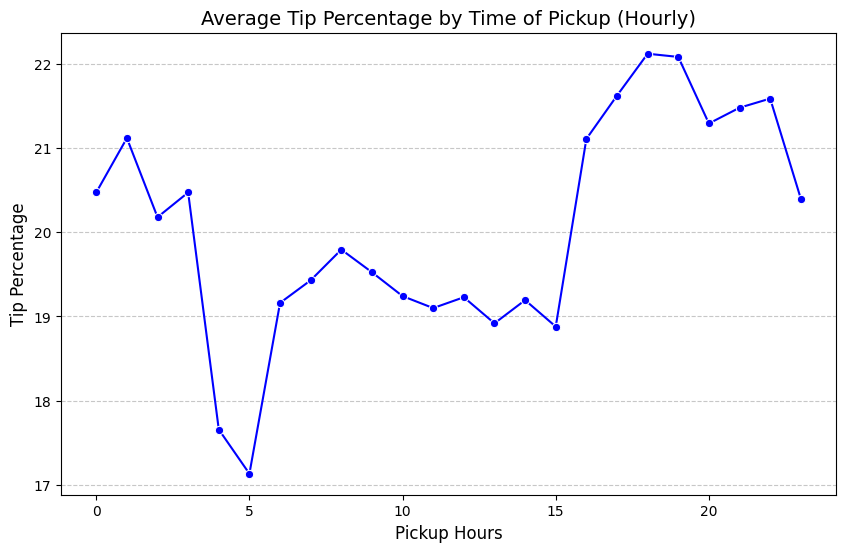

In [345]:
# Plot Average Tip Percentage by Time of Pickup (Hourly)
plt.figure(figsize=(10, 6))
sns.lineplot(x="pickup_hour", y="tip_percentage", data=tip_by_hour, marker="o", color="blue")

plt.xlabel("Pickup Hours", fontsize=12)
plt.ylabel("Tip Percentage", fontsize=12)
plt.title("Average Tip Percentage by Time of Pickup (Hourly)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

> <span style="color: blue;">Trip Distance and Tipping</span>
> - **Short Trips** (upto 2 miles) have higher tip percentage (~22%).
> - **Longer Trips** (more than 5 miles) have lower tip percentage (~17%)
> - **Possible reason**: Long trips have higher fares, so passengers may feel they are tipping enough even at a lower percentage.

> <span style="color: blue;">Passenger Count and Tipping</span>
> - More passengers tip the most because groups often split costs, so it won't be much tip for per person.

> <span style="color: blue;">Pickup hours and tipping</span>
> - Peak hours 6 PM to 7 PM sees better tips (~22%)
> - Early morning trips 4 AM to 5 AM have lower tips (~17%)

> <span style="color: blue;">What factors lead to low tip percentages?</span>
> - **Longer Trips**: Higher total fare means riders tip a lower percentage.
> - More passengers tip the most because groups often split costs.
> - Tips are more in peak hours, as to drop in time to home though it is rush hours.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

#### <span style="color: blue;">Comparing low tips with high tips</span>

In [346]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

In [347]:
# Define Low-Tip (<10%) & High-Tip (>20%) percentage
low_tips = df_merged[df_merged['tip_percentage'] < 10]
high_tips = df_merged[df_merged['tip_percentage'] > 20]

In [348]:
# Compare tip average across multiple factors
comparison = pd.DataFrame({
    'Metric': ['Average Distance', 'Average Passengers', 'Average Fare', 'Average Hour', 'Payment type'],
    'Low Tip': [
        low_tips['trip_distance'].mean(),
        low_tips['passenger_count'].mean(),
        low_tips['fare_amount'].mean(),
        low_tips['pickup_hour'].mean(),
        (low_tips['payment_type'] == 1).mean() * 100
    ],
    'High Tip': [
        high_tips['trip_distance'].mean(),
        high_tips['passenger_count'].mean(),
        high_tips['fare_amount'].mean(),
        high_tips['pickup_hour'].mean(),
        (high_tips['payment_type'] == 1).mean() * 100
    ]
})

In [349]:
comparison

Metric    Low Tip   High Tip
0    Average Distance   3.792895   3.242614
1  Average Passengers   1.412358   1.364839
2        Average Fare  20.927476  18.467266
3        Average Hour  13.916790  14.453498
4        Payment type  29.715786  99.997437

> <span style="color: blue;">Findings from comparison</span>
> - Shorter distance trip gets high tip.
> - Less passenger counts give more tip.
> - Expensive Rides Get Lower Tips.
> - High tips ride normally occurs between 2:30 PM to 3 PM.
> - More credit card payments means high tips.

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

#### <span style="color: blue;">Variation of passenger count across hours and days of the week</span>

In [350]:
# See how passenger count varies across hours and days

In [351]:
df_merged['weekday'] = df_merged['tpep_pickup_datetime'].dt.day_name()

In [352]:
avg_passengers = df_merged.groupby(['weekday', 'pickup_hour'])['passenger_count'].mean().reset_index()

In [353]:
# Create a pivot table with days and hours
passenger_pivot = avg_passengers.pivot(index='weekday', columns='pickup_hour', values='passenger_count')

In [354]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_pivot = passenger_pivot.reindex(days_order)

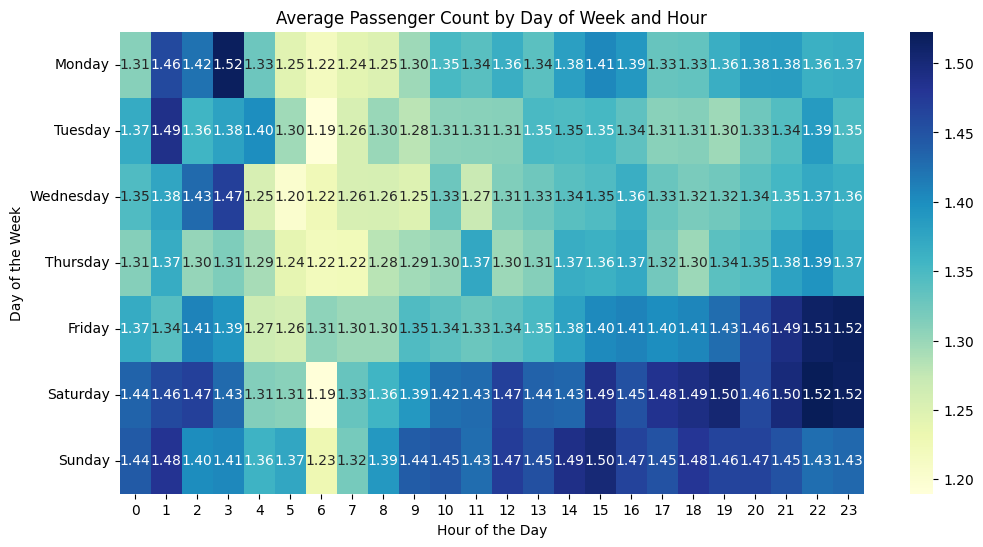

In [355]:
# Visualize the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Passenger Count by Day of Week and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

> <span style="color: blue;">**Hourly Trend**: Mostly solo riders or 2 passengers (commuters).</span>
> 
> <span style="color: blue;">**Day of the week Trend**: Mostly solo rides or small groups (1-2 passengers).</span>

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

#### <span style="color: blue;">Variation of passenger counts across zones</span>

In [356]:
# How does passenger count vary across zones

In [357]:
#Group by zone to calculate passenger count 
zone_passenger_counts = df_merged.groupby('PU_zone')['passenger_count'].sum().reset_index()

In [358]:
#renaming column from PU_zone to zone
zone_passenger_counts.rename(columns={"PU_zone": "zone"}, inplace=True)

In [359]:
# Display results
print("Total passengers per zone:")
print(zone_passenger_counts)

Total passengers per zone:
                        zone  passenger_count
0    Allerton/Pelham Gardens                7
1              Alphabet City              378
2              Arden Heights                1
3    Arrochar/Fort Wadsworth                6
4                    Astoria              142
..                       ...              ...
227       Woodlawn/Wakefield                4
228                 Woodside               51
229       World Trade Center             2109
230           Yorkville East             4446
231           Yorkville West             6612

[232 rows x 2 columns]


In [360]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

In [361]:
#merging passenger counts to zone dataframe 
zones = zones.merge(zone_passenger_counts, on="zone", how="left")

In [362]:
#filling null values with 0
zones.passenger_count = zones.passenger_count.fillna(0)

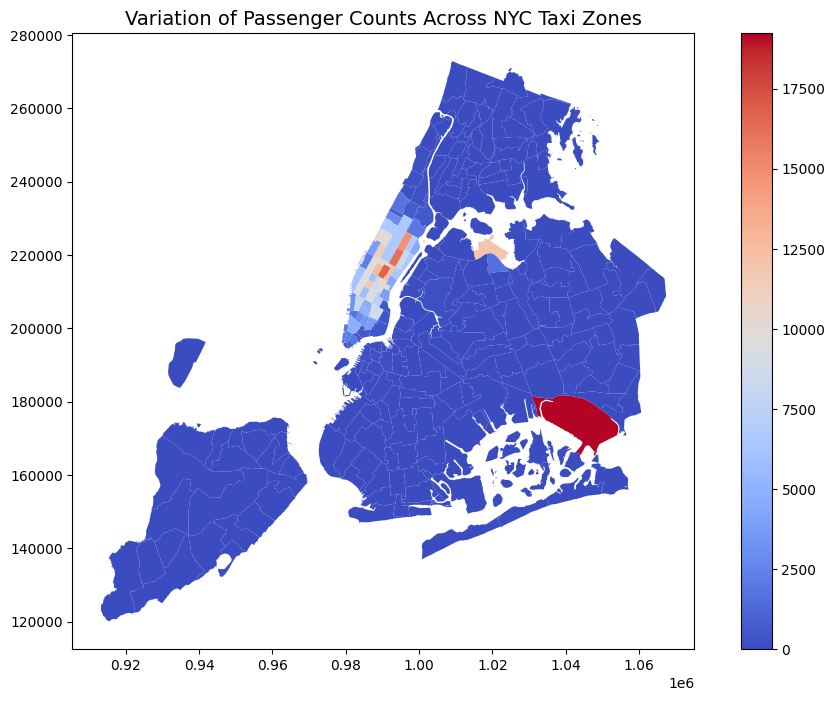

In [363]:
# Plot heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones.plot(column="passenger_count", cmap="coolwarm", legend=True, ax=ax)
ax.set_title("Variation of Passenger Counts Across NYC Taxi Zones", fontsize=14)
plt.show()

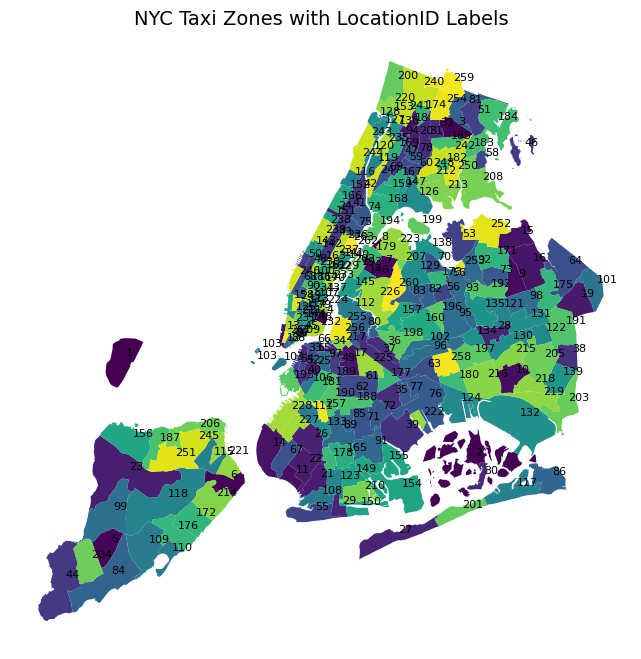

In [364]:
# Plot the NYC Taxi Zones using LocationID
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones.plot(column="LocationID", cmap="viridis", ax=ax)
# Add LocationID labels at the centroid of each zone
for _, row in zones.iterrows():
    centroid = row.geometry.centroid  # Get the centroid of the polygon
    ax.annotate(text=row["LocationID"], xy=(centroid.x, centroid.y),
                xytext=(3, 3), textcoords="offset points", fontsize=8, color="black")
ax.set_title("NYC Taxi Zones with LocationID Labels", fontsize=14)
plt.axis("off")  # Hide axis for a cleaner look
plt.show()

> <span style="color: blue;">From above two maps, we can see that locationID 132 is having higher passenger counts.</span>

In [365]:
# Find out the zone with location ID as 132
zones[zones['LocationID']==132]

OBJECTID  Shape_Leng  Shape_Area         zone  LocationID borough  \
131       132    0.245479    0.002038  JFK Airport         132  Queens   

     PU_counts                                           geometry  \
131    12856.0  MULTIPOLYGON (((1032791.001 181085.006, 103283...   

     passenger_count  
131          19234.0

> <span style="color: blue;">Zone like **JFK Airport** has higher number of passenger counts i.e. **19234**. </span>
>
> <span style="color: blue;">It is because people are taking higher taxies from/to **JFK Airport** for vacation, business trips etc.</span>

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

#### <span style="color: blue;">Finding pickup/dropoff zones or times when extra charges are applied more frequently</span>

<span style="color: blue;">How often extra charges are applied</span>

In [366]:
# How often is extra charge applied?

In [367]:
extra_charge_trips = df_merged[df_merged["extra"] > 0]

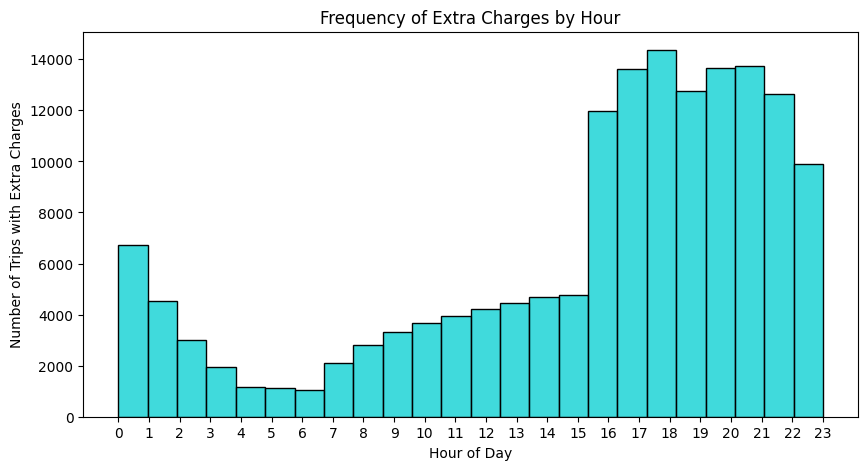

In [368]:
# 1️ **Analysis by Time: Extra Charge Frequency by Hour**
plt.figure(figsize=(10, 5))
sns.histplot(extra_charge_trips["pickup_hour"], bins=24, color="#00CED1")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips with Extra Charges")
plt.title("Frequency of Extra Charges by Hour")
plt.xticks(range(0, 24))
plt.show()

> <span style="color: blue;">From the above hourly analysis it is clear that the **extra charges are more during peak hours 5 PM - 9 PM**.</span>

In [369]:
# 2️ **Analysis by Zone: Extra Charge Frequency by zone**
extra_by_zone = extra_charge_trips.groupby("PU_zone")["extra"].count().reset_index()
extra_by_zone.rename(columns={"PU_zone": "zone", "extra": "extra_count"}, inplace=True)

# Merge extra charge data with taxi zones
zones = zones.merge(extra_by_zone, on="zone", how="left").fillna(0)

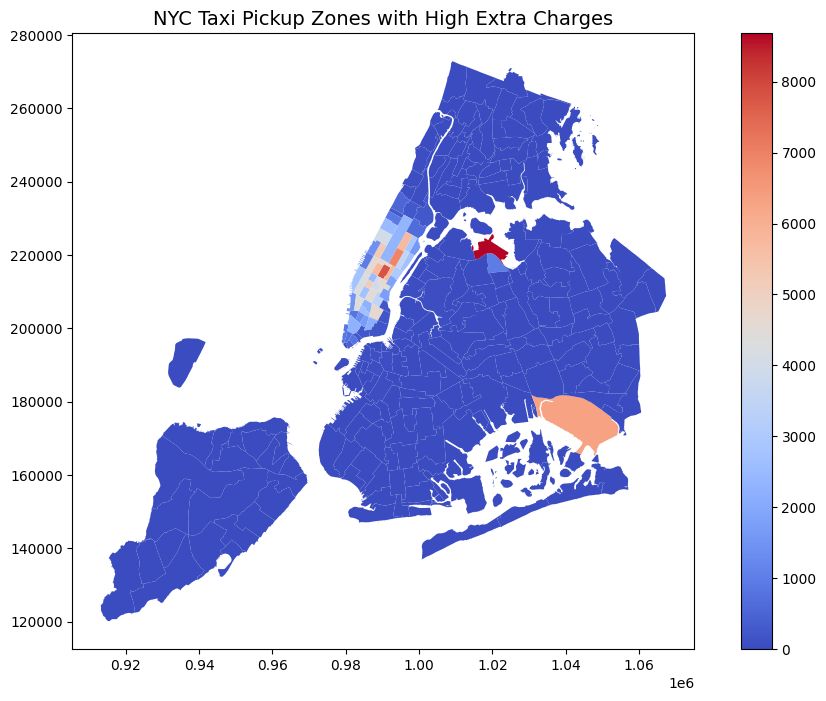

In [370]:
# Plot heatmap of extra charge frequency across NYC taxi zones
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones.plot(column="extra_count", cmap="coolwarm", legend=True, ax=ax)
ax.set_title("NYC Taxi Pickup Zones with High Extra Charges", fontsize=14)
plt.show()

> <span style="color: blue;">From above map of location IDs we can see that location 138 is having high extra charges.</span>

In [371]:
# Find out the zone with location ID as 138
zones[zones['LocationID']==138]

OBJECTID  Shape_Leng  Shape_Area               zone  LocationID borough  \
137       138    0.107467    0.000537  LaGuardia Airport         138  Queens   

     PU_counts                                           geometry  \
137     8778.0  MULTIPOLYGON (((1019904.219 225677.983, 102031...   

     passenger_count  extra_count  
137          11994.0       8684.0

> <span style="color: blue;">Zone like **LaGuardia Airport has higher extra amount**.</span>
> 
> <span style="color: blue;">It is because of many other charges which taxis have to pay at LaGuardia Airport.</span>

<span style="color: blue;">How often each surcharge are applied</span>

In [372]:
# How often is each surcharge applied?

In [373]:
# Identify surcharge types
df_merged["night_surcharge"] = (df_merged["extra"] == 1.00) & (df_merged["pickup_hour"] >= 20) | (df_merged["pickup_hour"] < 6)
df_merged["peak_surcharge"] = (df_merged["extra"] == 0.50) & (df_merged["pickup_hour"] >= 16) & (df_merged["pickup_hour"] < 20)
df_merged["mta_tax_applied"] = df_merged["mta_tax"] > 0
df_merged["improvement_fee_applied"] = df_merged["improvement_surcharge"] > 0
df_merged["congestion_surcharge_applied"] = df_merged["congestion_surcharge"] > 0

In [374]:
# Count occurrences of each surcharge type
surcharge_counts = {
    "Night Surcharge": df_merged["night_surcharge"].sum(),
    "Peak Hour Surcharge": df_merged["peak_surcharge"].sum(),
    "MTA Tax": df_merged["mta_tax_applied"].sum(),
    "Improvement Surcharge": df_merged["improvement_fee_applied"].sum(),
    "Congestion Surcharge": df_merged["congestion_surcharge_applied"].sum()
}

In [375]:
# Convert to DataFrame
surcharge_df = pd.DataFrame.from_dict(surcharge_counts, orient="index", columns=["Count"])

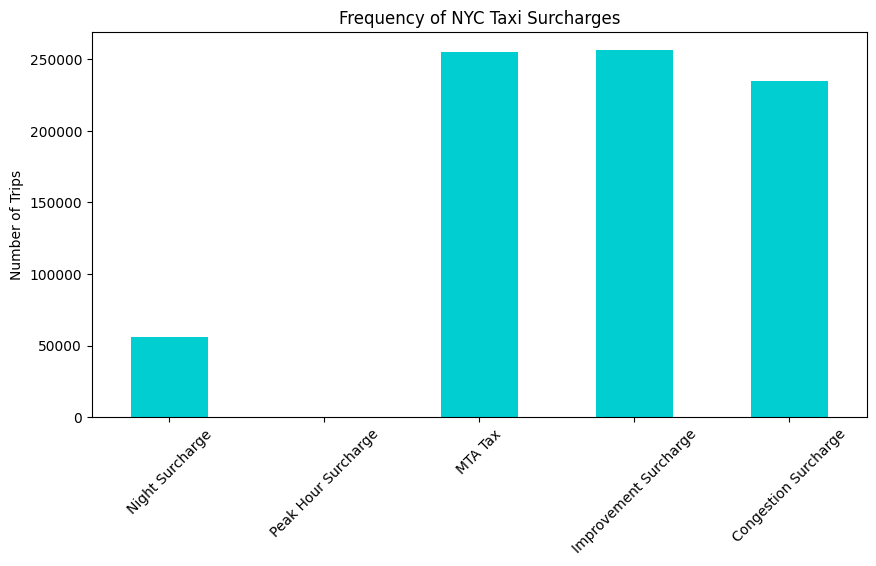

In [376]:
# Plot bar chart
surcharge_df.plot(kind="bar", legend=False, color="#00CED1", figsize=(10, 5))
plt.ylabel("Number of Trips")
plt.title("Frequency of NYC Taxi Surcharges")
plt.xticks(rotation=45)
plt.show()

> <span style="color: blue;"> **Night Surcharge**: Applied frequently between 8 PM - 6 AM.</span>
>
> <span style="color: blue;"> **MTA Tax (0.50 per trip)**: Applied to almost every ride.</span>
>
> <span style="color: blue;"> **Congestion Surcharge (2.50 per trip** in Manhattan below 96th St.): Very common for trips in central NYC.</span>
>
> <span style="color: blue;"> **Improvement Surcharge (0.30 per trip)**: Applied to nearly all trips.</span>

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

> <span style="color: blue;">**Trip Counts by Time Period**</span>
>> o	**Hourly**: The number of trips are peaked between 5 PM - 7 PM. recommendation for taxi companies to dispatch higher number of taxis during peak hours (5PM - 7PM).
>> 
>> o	**Period of the day**: The number of trips are more for evening and morning.
>> 
>> o	**Weekly**: Taxi trips are peaked on Thursday and distributed almost evenly on other weekdays except Monday, and also lower on Monday and Sunday.
>> 
>> o	**Monthly**: Total trips are fluctuating monthly. But still we can see that more demand is there in month of May followed by October.
>
>
> <span style="color: blue;">**Trip by Financial Analysis**</span>
>> o	**Monthly**: total revenue is fluctuating monthly. But still we can see that more revenue is generated in October month followed by May.
>> 
>> o	**Quarterly**: Revenue is almost equally segregated between all 4 Quarters, but still Q2 and Q4 are having slightly more revenue.
>
>
> <span style="color: blue;">**Trip Fare Analysis**</span>
>> o	**By Trip Distance**: Fare amount is strongly based on Trip distance.
>> 
>> o	**By Trip Duration**: Due to traffic we can’t assume that trip duration suppress the trip amount.
>> 
>> o	**By Number of passengers**: No correlation as charges are based on the distance and other facts not by the Number of people.
>
>
> <span style="color: blue;">**Passenger Behavior**</span>
>> o	Majority of people are travelling solo when using taxi service.
>> 
>> o	Credit Card are the most popular Type of payment.
>> 
>> o	People generally tips 16-22% of the total fare.
>> 
>> o	JFK Airport has highest passenger count.
>
>
> <span style="color: blue;">**Tip Analysis**</span>
>> o	Shorter distance trip gets high tip.
>> 
>> o	Less passenger counts give more tip.
>> 
>> o	Expensive Rides Get Lower Tips.
>> 
>> o	High tips ride normally occurs between 2:30 PM to 3 PM.
>> 
>> o	More credit card payments means high tips.
>
>
> <span style="color: blue;">**Taxi Trip Activities by Area**</span>
>> o	Taxi trips with the highest trip counts are in JFK Airport.
>
>
> <span style="color: blue;">**Traffic Analysis**</span>
>> o	Planning the traffic and avoid congestion on road.
>> 
>> o	Transport department can increase public transport in high-demand routes to avoid traffic.
>>
>> o	People can take alternative route if it is a high demand route in peak hour.
>
> 
> <span style="color: blue;">**Other analysis**</span>
>> o	Slowest route – Woodside to Jackson heights.'
>> 
>> o	Top pickup & Drop location – JFK Airport, Upper East Side North.
>> 
>> o	Busiest Zones in Night – East village, JFK Airport etc.
>> 
>> o	Revenue share – Day (88.66%) & Night (11.34%).
>> 
>> o	Per person per mile charge (USD 9.82). If 6 passenger travel in same taxi, per person charge (USD 1.28)
>> 
>> o	Vendor analysis – Vendor 1 is cheaper than Vendor 2.


### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

> <span style="color: blue;">**Anticipating Peak Hours** by dispatching more taxi units 1-2 hours before peak hours (5PM - 7PM) to anticipate rapid increasing demand. The same applies to weekend for late night hours.</span>
> 
> <span style="color: blue;">**Enhance Weekend Service**, Since weekends show lower trip counts, taxi companies can focus on marketing efforts to increase weekend ridership. This could involve special promotions or partnerships with event venues or restaurants to encourage weekend travel.</span>
> 
> <span style="color: blue;">**Route Optimization**: We have calculated slow routes based on average speed and high demands. Use this data to understand real time traffic and transport department can do route adjustments from low traffic zone.</span>
> 
> <span style="color: blue;">**Load Balancing**: We have also identified the top pickups and drop-offs zones based on number of trips and passenger count, taxi company can use this information to prioritize high-demand routes for dispatching more taxis to ensure quick pickups and drop-offs.</span>
> 
> <span style="color: blue;">**Vehicle Assignment**: Deploy more taxis in high demand zones like JFK Airport, Upper East Side South, Midtown Center, Upper East Side North, Midtown East.</span>
> 
> <span style="color: blue;">**Two-Way Communication**: Taxis should be pre-positioned at LaGuardia and JFK Airports based on incoming flight schedules. Since there are many pickup and drop offs for Airports, Taxi company can tie up with Airport to add some offers for customers.</span>
> 
> <span style="color: blue;">**Driver Meter Connection**: Provide drivers meter with real-time navigation, network connection, and trip details, so that the trip data no need to store and forward and it can be uploaded to server automatically over network connection.</span>
> 
> <span style="color: blue;">**Smart Scheduling**: Based upon the past and real-time data, need to ensure taxis are readily available in high-demand zones and during peak hours to reduce passenger wait times and improve customer satisfaction.</span>
> 
> <span style="color: blue;">**Customer Feedback Loops**: Adjust routing based on customer satisfaction and complaints.</span>


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

> <span style="color: blue;">**Peak vs. Off-Peak Hours**: Based on the hourly analysis Identified demand hotspots by analyzing time-based trends (peak evening hours, late-night surges, high demand zones etc.).
> 
> <span style="color: blue;">**Day-of-Week Variations**: Based on weekday and weekend trend, it is clear that Weekday commute demand differs from weekend leisure travel.
> 
> <span style="color: blue;">**Monthly & Seasonal Trends**: Adjust for seasonal fluctuations, major events like festivals, or weather-based demand shifts. On weekends, usually evening & late-night hours have high demands, positioning cabs in shopping districts, entertainment areas, and tourist attractions to cater to weekend activities. Also, On seasonal trends, we increase in demand in summer (May, June) and holiday season (October - December), so adding more special cabs during this season, can meet higher demand.
> 
> <span style="color: blue;">**High-Demand Zones**: Based on the analysis performed place the more taxis in airports, business districts, transit hubs, and nightlife areas during peak times.
> 
> <span style="color: blue;">**Event-Triggered Deployment**: Allocate extra taxis near stadiums, concerts, or festival locations when events end.
> 
> <span style="color: blue;">**Demand Forecasting**: Use historical data to predict future demands which zones will need more taxis.
> 
> <span style="color: blue;">**Geo-Fencing Hotspots**: Set up virtual zones to automatically direct idle taxis to likely high-demand areas.
> 
> <span style="color: blue;">**Proximity-Based Optimization**: Minimize wait times by assigning taxis closest to anticipated demand spikes.
> 
> <span style="color: blue;">**Demand-Based Pricing**: Adjust fare rates during peak and congestion periods, considering higher surcharges during rush hours and in high-demand zones.
> 
> <span style="color: blue;">**Promotional Incentives**: Offer promotions during off-peak hours (e.g., 4–7 AM, mid-afternoon) to encourage more balanced demand and improve driver utilization.
> 
> <span style="color: blue;">**Driver Bonuses**: Reward drivers for pre-positioning in historically high-demand areas.
> 
> <span style="color: blue;">**Traffic Alerts**: Provide drivers with real-time demand and traffic alerts via mobile apps.
> 
> <span style="color: blue;">**Rebalancing Supply**: Shift taxis dynamically across zones using real-time trip data.
> 
> <span style="color: blue;">**Cross-Zone Redistribution**: Move taxis from low-traffic to high-traffic zones based on live trends.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

> <span style="color: blue;">**Partners with Credit Card issuers** and create a loyalty program to reward the customers and prolong customer lifetime value.</span>
> 
> <span style="color: blue;">**Time-Based Dynamic Pricing** - Increase fares during peak rush hours (7 AM – 9 AM & 5 PM – 7 PM) when demand is high and implement late-night surge pricing (10 PM – 2 AM) for entertainment districts.
> 
> <span style="color: blue;">**Zone-Based Pricing Adjustments** - Introduce higher base fares for airport trips, peak hour trips and offer discounts or promotions for off-peak hours rides to encourage more rides.
> 
> <span style="color: blue;">**Identify optimal price points** where revenue and demand balance.
>
> <span style="color: blue;">**Price based on customer value** rather than cost, emphasizing unique selling points.
> 
> <span style="color: blue;">**Create subscription-based pricing models** for trips with regular pickup and drop.
> 
> <span style="color: blue;">**Analyze historical promotion** effectiveness to determine discount sweet spots.
> 
> <span style="color: blue;">**Personalize discounts for high-intent customers** rather than blanket reductions.
> 
> <span style="color: blue;">**Offer targeted discounts for price-sensitive segments** while maintaining premium pricing for high-value customers.
> 
> <span style="color: blue;">**Implement loyalty-based or tiered pricing** Offer loyalty programs or incentives for frequent riders to encourage repeat business and improve customer retention.
